In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
#load datasets
X_train = pd.read_csv("X_train.csv", sep=';', parse_dates=['date'], index_col=('key','date'), decimal=',')
Y_train = pd.read_csv("Y_train.csv", sep=';', parse_dates=['date'], index_col=('key','date'), decimal=',')
X_test = pd.read_csv("X_test.csv", sep=';', parse_dates=['date'], index_col=('key','date'),  decimal=',')
Y_test = pd.read_csv("Y_test.csv", sep=';',parse_dates=['date'], index_col=('key','date'), decimal=',')

In [8]:
Y_train.isnull().count()

y    8437
dtype: int64

In [91]:
#verify the values of the 
dates_tst = Y_test.index.levels[1].to_frame()

In [92]:
Y_train.index.levels[1]

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [93]:
#start point for the product
Y_train_ni = Y_train.reset_index()
start_dates_unique = Y_train_ni.groupby("key").date.min().unique()
Y_start_dates = Y_train_ni.groupby("key").date.min().reset_index(name='min_date')

Y_train_ni = Y_train_ni.set_index('key').join(Y_start_dates.set_index('key'))
Y_train_ni.reset_index().min_date.unique()

array(['2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [94]:
#count the number of product with start date 
Y_train_ni.reset_index().groupby("min_date").key.nunique() 

min_date
2012-01-01    77
2013-01-01    28
2013-11-01     2
2015-01-01     9
2015-09-01     1
2016-01-01     1
2016-02-01     1
Name: key, dtype: int64

In [95]:
Y_test.index.get_level_values('key').nunique()

119

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8437 entries, (683, Timestamp('2012-01-01 00:00:00')) to (99444, Timestamp('2018-06-01 00:00:00'))
Columns: 112 entries, x1 to x112
dtypes: float64(112)
memory usage: 7.2 MB


In [97]:
X_train.head(3)

x1        x2        x3        x4          x5  x6  \
key date                                                                 
683 2012-01-01  0.793085  0.000000  0.690346  0.000000         NaN NaN   
    2012-02-01  0.000000  0.000686  0.590133  0.000000  362.021309 NaN   
    2012-03-01  0.000000  0.000000  0.000000  0.672651         NaN NaN   

                        x7            x8           x9          x10  x11  \
key date                                                                  
683 2012-01-01  502.893893  10235.637780  1221.445737  3190.003651  NaN   
    2012-02-01   72.833160     88.793012    31.360328  2650.403762  NaN   
    2012-03-01  880.917406    553.998042   518.008231  2737.479632  NaN   

                      x12          x13         x14           x15          x16  \
key date                                                                        
683 2012-01-01 -28.651684  1980.637239  136.621699    299.643323   133.973307   
    2012-02-01   0.000000    15.162247    0.000000  11722.413830  1440.290962   
    2012-03-01  -6.347258   290.256466    2.617234   7676.235559  2442.891474   

                x17         x18        x19          x20        x21  \
key date                                                             
683 2012-01-01  NaN         NaN   4.369916   265.896065   0.000000   
    2012-02-01  NaN  674.974996  -0.402117  2791.911439  36.794284   
    2012-03-01  NaN         NaN -57.303368   252.747505  25.679593   

                       x22         x23       x24        x25         x26  \
key date                                                                  
683 2012-01-01   -7.009597  196.752932  0.000000        NaN    4.434880   
    2012-02-01  182.522388   94.165604  0.000000  91.252133    0.000000   
    2012-03-01   71.534699  517.492658  1.587617        NaN  309.109919   

                       x27        x28           x29          x30  x31  \
key date                                                                
683 2012-01-01  144.889458  58.435359           NaN          NaN  NaN   
    2012-02-01   30.849195   1.320652    138.650804   267.946614  0.0   
    2012-03-01  138.394545   9.481479  11213.037290  2880.581924  0.0   

                        x32       x33          x34        x35        x36  \
key date                                                                   
683 2012-01-01          NaN       NaN          NaN        NaN  56.519402   
    2012-02-01          NaN  3.807971   214.180266   0.000000  37.871432   
    2012-03-01  1349.949992 -0.804235  5583.822878  73.588569        NaN   

                      x37  x38  x39       x40        x41       x42  \
key date                                                             
683 2012-01-01  13.202909  0.0  NaN  0.964511  33.965746 -0.437056   
    2012-02-01  57.424344  0.0  NaN  3.337018  12.381752 -5.633266   
    2012-03-01        NaN  NaN  NaN       NaN        NaN       NaN   

                        x43         x44  x45  x46         x47         x48  \
key date                                                                    
683 2012-01-01  1126.332080  784.342254  0.0  NaN   89.606255  368.466345   
    2012-02-01   453.129492  228.284868  0.0  NaN  148.537185   61.140724   
    2012-03-01   438.294127   12.302882  0.0  NaN    3.246027  162.464467   

                     x49          x50         x51       x52  x53         x54  \
key date                                                                       
683 2012-01-01  2.251405   182.856183  219.078932  0.000343  NaN  136.025774   
    2012-02-01 -1.695959  1073.159349  154.555209  0.000000  NaN  219.944395   
    2012-03-01  0.000000    80.163922   67.347609  0.000000  NaN   -2.257121   

                      x55       x56         x57         x58  x59         x60  \
key date                                                                       
683 2012-01-01  77.068025  2.922881         NaN         NaN  NaN         NaN   
    2012-02-01   

In [98]:
pd.set_option('display.max_columns', X_train.shape[0]+1)
X_train.describe()

x1           x2           x3           x4            x5  \
count  7800.000000  7793.000000  7797.000000  7795.000000   2876.000000   
mean      0.347830     0.354310     0.319932     0.336695    372.786005   
std       1.936792     1.965066     1.829656     2.027163   1241.064389   
min     -33.228353   -52.023791   -61.645734   -66.456706     -0.218961   
25%       0.000000     0.000000     0.000000     0.000000      1.809152   
50%       0.000000     0.000000     0.000000     0.000000     19.944190   
75%       0.000000     0.000000     0.000000     0.000000    136.762118   
max      65.134739    51.636600    53.112209    58.471756  17036.688540   

                 x6            x7            x8            x9           x10  \
count   2906.000000   7780.000000   7780.000000   7800.000000   7787.000000   
mean     382.011899    951.109916    924.281006    676.835635   1859.080333   
std     1326.111969   2825.566845   2643.918400   1984.928078   4542.140925   
min       -0.175169    -80.348046    -26.782682   -174.883211   -196.067620   
25%        1.753411     11.499549     12.351966      9.102475     33.701285   
50%       20.159825     83.294584     84.247536     63.515596    220.101934   
75%      135.828419    455.481914    471.741556    369.282624   1079.320922   
max    19046.124220  38518.234870  39314.030240  40010.669150  43112.658610   

                x11          x12           x13          x14           x15  \
count   2868.000000  7802.000000   7800.000000  7802.000000   7777.000000   
mean     391.863598    49.396617    458.384910    13.188648    956.989661   
std     1280.963286   250.838823   1225.287956    46.484148   2760.255466   
min        0.000000  -156.022704   -230.077970  -289.145431    -73.923909   
25%        1.859392     0.000000      5.220710     0.000000     11.304962   
50%       19.584348     1.758035     36.762377     0.318565     82.523348   
75%      128.662754    18.492535    251.694600     5.465804    442.886260   
max    15982.127480  5875.803750  17997.019340  1562.129803  38916.132550   

                x16           x17           x18          x19           x20  \
count   7795.000000   2045.000000   2883.000000  7797.000000   7795.000000   
mean     663.417082    741.667971    394.812927    43.896360    449.362109   
std     1994.227006   2181.637873   1393.182760   227.235172   1237.720237   
min     -156.452562      0.000000     -0.176392  -209.069326   -291.728573   
25%        8.870005      5.488735      1.642856     0.000000      5.201652   
50%       64.326905     55.497324     18.444585     1.672178     37.212605   
75%      363.441735    364.052340    125.299720    17.321408    227.225628   
max    39888.370230  21083.263700  16595.771090  7979.064180  16663.732830   

               x21          x22           x23          x24           x25  \
count  7796.000000  7804.000000   7800.000000  7800.000000   2918.000000   
mean     13.035138    23.465966    693.304724     0.326744    374.905423   
std      45.527917    67.432640   2101.121324     1.759926   1243.892413   
min    -192.874914  -446.651301   -173.053574   -30.822867     -0.164570   
25%       0.000000     0.000000      8.781930     0.000000      1.814327   
50%       0.293218     0.836387     61.970778     0.000000     18.397088   
75%       5.444193    12.808690    364.910415     0.000000    129.088489   
max     911.339045   847.453675  44848.493790    51.808774  16053.470040   

               x26           x27          x28           x29           x30  \
count  7802.000000   7800.000000  7802.000000   7785.000000   7804.000000   
mean     47.550484    454.496624    12.767340    938.209397    671.485557   
std     239.618094   1233.477830    51.633695   2720.196459   2031.019592   
min    -468.068112   -214.758578  -420.784993   -107.130728   -119.591262   
25%       0.000000      5.044295     0.000000     11.962642      9.071438   
50%       1.702678     36.232904     0.314220     83.085964     62.198883   
75%    

In [99]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8437 entries, (683, Timestamp('2012-01-01 00:00:00')) to (99444, Timestamp('2018-06-01 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       8396 non-null   float64
dtypes: float64(1)
memory usage: 91.5 KB


In [100]:
#modification for x1-x112 variables - if value lt 0 then fill 0  
#there is no impact 
#i=1
#while i<113:
#    var="x"+str(i)
#    X_train.loc[X_train[var]<0, var] = 0
#    X_test.loc[X_test[var]<0, var] = 0
#    i+=1
    
#X_train.describe()

In [101]:
Y_train.head()

y
key date                   
683 2012-01-01  1430.314968
    2012-02-01     0.000000
    2012-03-01  5088.531900
    2012-04-01  2837.756051
    2012-05-01    51.311689

In [102]:
X_train.index.levels[0]

Int64Index([  683,   894,  2831,  2835,  4361,  6846,  8200,  8284,  8507,
             8992,
            ...
            87586, 88848, 90929, 93876, 95121, 96037, 97021, 97392, 98721,
            99444],
           dtype='int64', name='key', length=119)

In [103]:
#X_train.index.levels[1]
X_train.index.get_level_values('date').nunique()

78

In [104]:
print("CNT of unique values for product key in X_train: ", X_train.index.get_level_values('key').nunique())
print("CNT of unique values for product key in Y_train: ", Y_train.index.get_level_values('key').nunique())
print("CNT of unique values for product date in X_train: ", X_train.index.get_level_values('date').nunique())
print("CNT of unique values for product date in Y_train: ", Y_train.index.get_level_values('date').nunique())

CNT of unique values for product key in X_train:  119
CNT of unique values for product key in Y_train:  119
CNT of unique values for product date in X_train:  78
CNT of unique values for product date in Y_train:  78


In [105]:
X_Y_train = pd.merge(X_train, Y_train, how='left', on=['key', 'date'] )
X_Y_train.head()

x1        x2        x3        x4          x5        x6  \
key date                                                                       
683 2012-01-01  0.793085  0.000000  0.690346  0.000000         NaN       NaN   
    2012-02-01  0.000000  0.000686  0.590133  0.000000  362.021309       NaN   
    2012-03-01  0.000000  0.000000  0.000000  0.672651         NaN       NaN   
    2012-04-01  0.000000  0.000000  0.000000  0.022906         NaN  6.711943   
    2012-05-01  0.000000  0.000000  0.000000  0.000000         NaN       NaN   

                         x7            x8           x9          x10  x11  \
key date                                                                   
683 2012-01-01   502.893893  10235.637780  1221.445737  3190.003651  NaN   
    2012-02-01    72.833160     88.793012    31.360328  2650.403762  NaN   
    2012-03-01   880.917406    553.998042   518.008231  2737.479632  NaN   
    2012-04-01   150.778812     11.951856    11.360498  3492.642102  0.0   
    2012-05-01  5116.833341    114.048014    49.435797  2591.599732  NaN   

                       x12          x13         x14           x15  \
key date                                                            
683 2012-01-01  -28.651684  1980.637239  136.621699    299.643323   
    2012-02-01    0.000000    15.162247    0.000000  11722.413830   
    2012-03-01   -6.347258   290.256466    2.617234   7676.235559   
    2012-04-01    2.353750     2.272131    0.000000      1.760293   
    2012-05-01  303.912998    12.975439   41.586061     45.244724   

                        x16  x17         x18        x19          x20  \
key date                                                               
683 2012-01-01   133.973307  NaN         NaN   4.369916   265.896065   
    2012-02-01  1440.290962  NaN  674.974996  -0.402117  2791.911439   
    2012-03-01  2442.891474  NaN         NaN -57.303368   252.747505   
    2012-04-01     0.429605  NaN         NaN   9.421156     7.498595   
    2012-05-01     8.442525  NaN         NaN   0.000000    30.324494   

                      x21         x22          x23       x24        x25  \
key date                                                                  
683 2012-01-01   0.000000   -7.009597   196.752932  0.000000        NaN   
    2012-02-01  36.794284  182.522388    94.165604  0.000000  91.252133   
    2012-03-01  25.679593   71.534699   517.492658  1.587617        NaN   
    2012-04-01   0.000000   82.488252     7.487167  0.000000        NaN   
    2012-05-01   0.000000   74.886927  3664.337211  0.552216        NaN   

                       x26          x27         x28           x29  \
key date                                                            
683 2012-01-01    4.434880   144.889458   58.435359           NaN   
    2012-02-01    0.000000    30.849195    1.320652    138.650804   
    2012-03-01  309.109919   138.394545    9.481479  11213.037290   
    2012-04-01    1.305207    66.564346    0.000000           NaN   
    2012-05-01  -85.955052  2233.384744  162.301292    216.939475   

                        x30  x31          x32       x33          x34  \
key date                                                               
683 2012-01-01          NaN  NaN          NaN       NaN          NaN   
    2012-02-01   267.946614  0.0          NaN  3.807971   214.180266   
    2012-03-01  2880.581924  0.0  1349.949992 -0.804235  5583.822878   
    2012-04-01          NaN  NaN          NaN       NaN          NaN   
    2012-05-01   142.173671  0.0          NaN  0.574922   187.914636   

                      x35         x36         x37  x38        x39       x40  \
key date                                                                      
683 2012-01-01        NaN   56.519402   13.202909  0.0        NaN  0.964511   
    2012-02-01   0.000000   37.871432   57.424344  0.0        NaN  3.337018   
    2012-03-01  73.588569         NaN         NaN  NaN        NaN       NaN   
    2012-04-01        NaN  11

In [106]:
X_Y_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8437 entries, (683, Timestamp('2012-01-01 00:00:00')) to (99444, Timestamp('2018-06-01 00:00:00'))
Columns: 113 entries, x1 to y
dtypes: float64(113)
memory usage: 7.3 MB


In [107]:
column_list = list(X_train)
column_list

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109',
 'x110',
 'x111',
 'x112']

In [108]:
#Create new variables based on dates
X_train['expenditure_sum']=X_train[column_list].sum(axis=1) 
#X_train['day'] = X_train.index.get_level_values('date').day
X_train['month'] = X_train.index.get_level_values('date').month
#X_train['year'] = X_train.index.get_level_values('date').year
X_train['nan_val_cnt'] = X_train.isnull().sum(axis=1)
i=1
while i<113:
    var="x"+str(i)
    var_n=var+"_nan_flg"
    X_train[var_n] = pd.isnull(X_train[var]).astype(int)
    i+=1
    
X_train_imp_m = X_train.fillna(X_train.mean())


X_train.head(10)

x1        x2        x3        x4          x5  \
key date                                                             
683 2012-01-01  0.793085  0.000000  0.690346  0.000000         NaN   
    2012-02-01  0.000000  0.000686  0.590133  0.000000  362.021309   
    2012-03-01  0.000000  0.000000  0.000000  0.672651         NaN   
    2012-04-01  0.000000  0.000000  0.000000  0.022906         NaN   
    2012-05-01  0.000000  0.000000  0.000000  0.000000         NaN   
    2012-06-01  0.000000  0.000000  0.000000  0.312674         NaN   
    2012-07-01       NaN  0.000000  3.175234  1.466005         NaN   
    2012-08-01  0.501176  0.000000  1.340302  0.000000         NaN   
    2012-09-01       NaN  0.000000  0.000000  0.000000    8.782704   
    2012-10-01  0.000000  0.000000  0.000000  0.000000         NaN   

                        x6           x7            x8           x9  \
key date                                                             
683 2012-01-01         NaN   502.893893  10235.637780  1221.445737   
    2012-02-01         NaN    72.833160     88.793012    31.360328   
    2012-03-01         NaN   880.917406    553.998042   518.008231   
    2012-04-01    6.711943   150.778812     11.951856    11.360498   
    2012-05-01         NaN  5116.833341    114.048014    49.435797   
    2012-06-01         NaN   399.965641    729.314528   231.697847   
    2012-07-01         NaN     1.696436           NaN          NaN   
    2012-08-01         NaN   233.187124   1087.077794   811.378439   
    2012-09-01  812.877491     7.933381           NaN          NaN   
    2012-10-01  138.566843  3761.637756   1057.169684  1109.484109   

                        x10         x11         x12          x13         x14  \
key date                                                                       
683 2012-01-01  3190.003651         NaN  -28.651684  1980.637239  136.621699   
    2012-02-01  2650.403762         NaN    0.000000    15.162247    0.000000   
    2012-03-01  2737.479632         NaN   -6.347258   290.256466    2.617234   
    2012-04-01  3492.642102    0.000000    2.353750     2.272131    0.000000   
    2012-05-01  2591.599732         NaN  303.912998    12.975439   41.586061   
    2012-06-01  3897.955145  950.161879    3.777526  3273.496709   97.315628   
    2012-07-01  2762.228593         NaN         NaN          NaN         NaN   
    2012-08-01  2283.016164   46.989765  422.147044   298.033180    0.000000   
    2012-09-01  2452.323633         NaN         NaN          NaN         NaN   
    2012-10-01  3276.460572  179.104677    3.831601   209.593427    6.017650   

                         x15          x16  x17         x18         x19  \
key date                                                                 
683 2012-01-01    299.643323   133.973307  NaN         NaN    4.369916   
    2012-02-01  11722.413830  1440.290962  NaN  674.974996   -0.402117   
    2012-03-01   7676.235559  2442.891474  NaN         NaN  -57.303368   
    2012-04-01      1.760293     0.429605  NaN         NaN    9.421156   
    2012-05-01     45.244724     8.442525  NaN         NaN    0.000000   
    2012-06-01     42.214034    23.031822  NaN    0.000000   13.615316   
    2012-07-01    410.494339   437.273063  NaN    0.000000  224.576802   
    2012-08-01    295.318001   454.669242  NaN   28.850242   13.107170   
    2012-09-01     62.784933   314.536376  NaN         NaN   -3.769600   
    2012-10-01     11.074434     6.684398  NaN    0.000000    4.707501   

                        x20        x21         x22          x23       x24  \
key date                                                                    
683 2012-01-01   265.896065   0.000000   -7.009597   196.752932  0.000000   
    2012-02-01  2791.911439  36.794284  182.522388    94.165604  0.000000   
    2012-03-01   252.747505  25.679593   71.534699   517.492658  1.587617   
    2012-04-01     7.498595   0.000000   82.488252     7.487167  0.000000   
    2012-05-01    30.324494 

In [109]:
X_test['expenditure_sum']=X_test[column_list].sum(axis=1) 
#X_test['day'] = X_test.index.get_level_values('date').day
X_test['month'] = X_test.index.get_level_values('date').month
#X_train['year'] = X_train.index.get_level_values('date').year
X_test['nan_val_cnt'] = X_test.isnull().sum(axis=1)
i=1
while i<113:
    var="x"+str(i)
    var_n=var+"_nan_flg"
    X_test[var_n] = pd.isnull(X_test[var]).astype(int)
    i+=1
    
X_test = X_test.fillna(0)

In [110]:
X_test.head()

x1        x2        x3        x4         x5         x6  \
key date                                                                       
683 2018-07-01  0.000000  0.000000  0.397238  0.000000   0.000000   0.000000   
    2018-08-01  0.000000  0.000000  0.000000  0.000000  74.832787   0.000000   
    2018-09-01  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
    2018-10-01  1.532104  0.576041  0.000000  0.000000  52.540417  21.890773   
    2018-11-01  0.000000  0.000000  0.000000  2.412814  19.021239  42.032333   

                         x7          x8          x9          x10        x11  \
key date                                                                      
683 2018-07-01   119.936184  114.063630  183.479525  7599.854339  69.619165   
    2018-08-01   593.803092    0.000000    0.000000  7129.983016   0.000000   
    2018-09-01   222.106715    7.926074    2.365509  3678.029954   0.000000   
    2018-10-01    59.588630  361.870894   20.197739  5274.149878  33.457377   
    2018-11-01  1970.406869    6.444104    4.975536  4552.412721   0.000000   

                     x12        x13       x14           x15          x16  \
key date                                                                   
683 2018-07-01  0.462340  70.016970  6.499243   2080.584709   629.610635   
    2018-08-01  0.000000   0.000000  0.000000     95.954914    14.390141   
    2018-09-01  1.158072   4.069820  0.000000    525.092910    67.252777   
    2018-10-01  2.838254  54.867813  2.142438    286.376808   340.997027   
    2018-11-01  0.102331   0.759610  0.000000  20625.351220  7100.112077   

                        x17          x18          x19          x20        x21  \
key date                                                                        
683 2018-07-01   798.069372     0.000000    19.786062  5918.616119  35.902012   
    2018-08-01   961.357287     0.000000    33.494129    20.048256   1.727713   
    2018-09-01   841.656146   224.161702     1.246150    76.995750   3.896790   
    2018-10-01   922.234490   108.356664    55.417867   666.833871   0.000000   
    2018-11-01  1105.512624  3229.309195  1302.158618  7848.897467  10.466621   

                       x22          x23       x24          x25        x26  \
key date                                                                    
683 2018-07-01   25.079849   218.895556  0.433570     0.000000  49.771054   
    2018-08-01   40.379627   278.568592  0.000000   379.824359   0.000000   
    2018-09-01   32.560699   146.722536  0.154986     0.000000  56.266567   
    2018-10-01   44.605913   176.300592  0.000000     0.000000   2.342705   
    2018-11-01  256.098225  2565.327323  0.000000  1991.389016  38.048774   

                        x27        x28         x29        x30       x31  \
key date                                                                  
683 2018-07-01   141.541094   3.972149    1.717963   0.249813  0.000000   
    2018-08-01    26.391928   1.084692   14.514143   3.707842  0.026478   
    2018-09-01    96.698951   1.333487    3.499335   5.630862  0.000000   
    2018-10-01    36.281700   0.000000    0.364562   3.608975  0.000000   
    2018-11-01  1117.778353  22.644475  123.799645  78.358941  0.000000   

                      x32       x33        x34       x35          x36  \
key date                                                                
683 2018-07-01   0.000000  0.000000   1.386168  0.000000     0.000000   
    2018-08-01   0.000000  2.122955  11.934203  0.038924   574.525316   
    2018-09-01   0.008676  0.235928   4.930272  0.537284     1.745145   
    2018-10-01   0.000000  0.000000   2.957670  0.000000    58.611143   
    2018-11-01  18.094593  3.803094  10.294551  0.000000  1933.862467   

                        x37       x38          x39       x40         x41  \
key date                                                                   
683 2018-07-01     0.000000  0.000000     0.000000  0.000000    0.000000   


In [111]:
X_train.quantile([.01, .05, .1, .15,.25, .5, .75, .90, .95, .99]).T

0.01         0.05          0.10          0.15  \
x1                  0.000000     0.000000      0.000000      0.000000   
x2                  0.000000     0.000000      0.000000      0.000000   
x3                  0.000000     0.000000      0.000000      0.000000   
x4                  0.000000     0.000000      0.000000      0.000000   
x5                  0.000000     0.000000      0.027923      0.292781   
x6                  0.000000     0.000000      0.053716      0.298781   
x7                  0.000000     0.648163      1.933935      4.308105   
x8                  0.000000     0.668250      1.972033      4.240253   
x9                 -0.390366     0.415739      1.431637      3.159555   
x10                 0.261528     2.527005      7.273175     12.936394   
x11                 0.000000     0.000000      0.026319      0.316650   
x12               -12.886355    -0.577985      0.000000      0.000000   
x13                -1.525476     0.193042      0.825888      1.791434   
x14               -11.124171    -0.413860      0.000000      0.000000   
x15                 0.000000     0.628153      1.956831      4.034418   
x16                -0.238596     0.374686      1.332715      2.904569   
x17                 0.000000     0.000000      0.215324      1.057976   
x18                 0.000000     0.000000      0.016825      0.324844   
x19               -12.846245    -0.500289      0.000000      0.000000   
x20                -1.758192     0.172130      0.750653      1.693837   
x21               -12.487261    -0.430056      0.000000      0.000000   
x22               -27.735641    -0.903441      0.000000      0.000000   
x23                -0.230552     0.388597      1.373930      2.930357   
x24                 0.000000     0.000000      0.000000      0.000000   
x25                 0.000000     0.000000      0.036293      0.353866   
x26               -12.692443    -0.499094      0.000000      0.000000   
x27                -1.921748     0.202081      0.758127      1.678418   
x28               -11.364199    -0.331363      0.000000      0.000000   
x29                 0.000000     0.690589      1.945907      4.336133   
x30                -0.212871     0.465162      1.483209      3.064069   
x31                 0.000000     0.000000      0.000000      0.000000   
x32                 0.000000     0.000000      0.026324      0.321504   
x33               -12.419819    -0.561561      0.000000      0.000000   
x34                -1.886854     0.183775      0.771332      1.652577   
x35               -11.408540    -0.348261      0.000000      0.000000   
x36                 0.000000     0.718291      2.091535      4.185133   
x37                -0.190528     0.449211      1.438685      3.066946   
x38                 0.000000     0.000000      0.000000      0.000000   
x39                 0.000000     0.000000      0.034192      0.335058   
x40               -13.560583    -0.557363      0.000000      0.000000   
x41                -2.154077     0.192368      0.792005      1.721713   
x42                -9.176045    -0.372818      0.000000      0.000000   
x43                 0.000000     0.632612      1.853566      4.026163   
x44                -0.431000     0.368722      1.303507      2.804428   
x45                 0.000000     0.000000      0.000000      0.000000   
x46                 0.000000     0.000000      0.036037      0.270844   
x47               -11.914428    -0.516879      0.000000      0.000000   
x48                -2.375485     0.179232      0.802772      1.730311   
x49               -10.409816    -0.435438      0.000000      0.000000   
x50                 0.000000     0.639134      2.027497      4.424101   
x51                -0.195450     0.382927      1.262215      2.984985   
x52                 0.000000     0.000000      0.000000      0.000000   
x53                 0.000000     0.000000      0.053131      0.355182   
x54               -13.441974    -0.522792      0.000000      0.000000   
x55      

In [112]:
CNT_missing_values = X_train.isnull().sum().to_frame(name='cnt_missing')
cnt = X_train.sum()
pd.set_option('display.max_rows', CNT_missing_values.shape[0]+1)
CNT_missing_values["rate_missing"] = CNT_missing_values['cnt_missing']/cnt
CNT_missing_values.sort_values(by="rate_missing", ascending=False)

cnt_missing  rate_missing
x3                       640      0.256564
x108                     620      0.251222
x59                      633      0.250124
x24                      637      0.249941
x31                      633      0.246252
x66                      627      0.245715
x4                       642      0.244614
x87                      642      0.241841
x38                      640      0.241576
x1                       637      0.234789
x2                       644      0.233237
x80                      623      0.232242
x94                      637      0.230710
x73                      626      0.230687
x52                      631      0.228269
x45                      634      0.118275
x56                      633      0.006657
x35                      633      0.006654
x105                     641      0.006471
x28                      635      0.006375
x63                      632      0.006341
x91                      641      0.006336
x49                      638      0.006330
x21                      641      0.006308
x70                      627      0.006260
x77                      625      0.006185
x14                      635      0.006171
x42                      638      0.006126
x98                      636      0.006106
x112                     619      0.006086
x84                      623      0.005776
x74                     5568      0.005208
x60                     5550      0.005203
x5                      5561      0.005187
x46                     5553      0.005181
x67                     5569      0.005065
x25                     5519      0.005045
x32                     5553      0.005012
x6                      5531      0.004982
x39                     5541      0.004982
x11                     5569      0.004955
x53                     5568      0.004948
x81                     5575      0.004947
x95                     5566      0.004934
x18                     5554      0.004879
x102                    5599      0.004768
x17                     6392      0.004214
x22                      633      0.003457
x33                      632      0.001890
x19                      640      0.001870
x103                     640      0.001838
x89                      640      0.001805
x47                      636      0.001771
x54                      633      0.001757
x68                      628      0.001751
x61                      629      0.001733
x82                      622      0.001730
x96                      635      0.001728
x110                     617      0.001727
x26                      635      0.001712
x40                      638      0.001690
x75                      624      0.001655
x12                      635      0.001648
x109                     632      0.000976
x20                      642      0.000183
x34                      633      0.000183
x69                      627      0.000180
x27                      637      0.000180
x62                      633      0.000180
x90                      642      0.000179
x13                      637      0.000178
x104                     644      0.000178
x48                      640      0.000177
x41                      640      0.000177
x76                      626      0.000177
x97                      637      0.000176
x83                      623      0.000174
x111                     620      0.000174
x55                      631      0.000168
x16                      642      0.000124
x86                      642      0.000124
x30                      633      0.000121
x9                       637      0.000121
x44                      640      0.000120
x65                      627      0.000120
x100                     644      0.000120
x37                      640      0.000119
x23                      637      0.000118
x58                      633      0.000118
x72                      626      0.000118
x107                     620      0.000117
x51                      631      0.000116
x93               

In [113]:
X_train_0 = X_train.fillna(0)

In [114]:
X_train_0.head()

x1        x2        x3        x4          x5        x6  \
key date                                                                       
683 2012-01-01  0.793085  0.000000  0.690346  0.000000    0.000000  0.000000   
    2012-02-01  0.000000  0.000686  0.590133  0.000000  362.021309  0.000000   
    2012-03-01  0.000000  0.000000  0.000000  0.672651    0.000000  0.000000   
    2012-04-01  0.000000  0.000000  0.000000  0.022906    0.000000  6.711943   
    2012-05-01  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   

                         x7            x8           x9          x10  x11  \
key date                                                                   
683 2012-01-01   502.893893  10235.637780  1221.445737  3190.003651  0.0   
    2012-02-01    72.833160     88.793012    31.360328  2650.403762  0.0   
    2012-03-01   880.917406    553.998042   518.008231  2737.479632  0.0   
    2012-04-01   150.778812     11.951856    11.360498  3492.642102  0.0   
    2012-05-01  5116.833341    114.048014    49.435797  2591.599732  0.0   

                       x12          x13         x14           x15  \
key date                                                            
683 2012-01-01  -28.651684  1980.637239  136.621699    299.643323   
    2012-02-01    0.000000    15.162247    0.000000  11722.413830   
    2012-03-01   -6.347258   290.256466    2.617234   7676.235559   
    2012-04-01    2.353750     2.272131    0.000000      1.760293   
    2012-05-01  303.912998    12.975439   41.586061     45.244724   

                        x16  x17         x18        x19          x20  \
key date                                                               
683 2012-01-01   133.973307  0.0    0.000000   4.369916   265.896065   
    2012-02-01  1440.290962  0.0  674.974996  -0.402117  2791.911439   
    2012-03-01  2442.891474  0.0    0.000000 -57.303368   252.747505   
    2012-04-01     0.429605  0.0    0.000000   9.421156     7.498595   
    2012-05-01     8.442525  0.0    0.000000   0.000000    30.324494   

                      x21         x22          x23       x24        x25  \
key date                                                                  
683 2012-01-01   0.000000   -7.009597   196.752932  0.000000   0.000000   
    2012-02-01  36.794284  182.522388    94.165604  0.000000  91.252133   
    2012-03-01  25.679593   71.534699   517.492658  1.587617   0.000000   
    2012-04-01   0.000000   82.488252     7.487167  0.000000   0.000000   
    2012-05-01   0.000000   74.886927  3664.337211  0.552216   0.000000   

                       x26          x27         x28           x29  \
key date                                                            
683 2012-01-01    4.434880   144.889458   58.435359      0.000000   
    2012-02-01    0.000000    30.849195    1.320652    138.650804   
    2012-03-01  309.109919   138.394545    9.481479  11213.037290   
    2012-04-01    1.305207    66.564346    0.000000      0.000000   
    2012-05-01  -85.955052  2233.384744  162.301292    216.939475   

                        x30  x31          x32       x33          x34  \
key date                                                               
683 2012-01-01     0.000000  0.0     0.000000  0.000000     0.000000   
    2012-02-01   267.946614  0.0     0.000000  3.807971   214.180266   
    2012-03-01  2880.581924  0.0  1349.949992 -0.804235  5583.822878   
    2012-04-01     0.000000  0.0     0.000000  0.000000     0.000000   
    2012-05-01   142.173671  0.0     0.000000  0.574922   187.914636   

                      x35         x36         x37  x38        x39       x40  \
key date                                                                      
683 2012-01-01   0.000000   56.519402   13.202909  0.0   0.000000  0.964511   
    2012-02-01   0.000000   37.871432   57.424344  0.0   0.000000  3.337018   
    2012-03-01  73.588569    0.000000    0.000000  0.0   0.000000  0.000000   
    2012-04-01   0.000000  11

<AxesSubplot:>

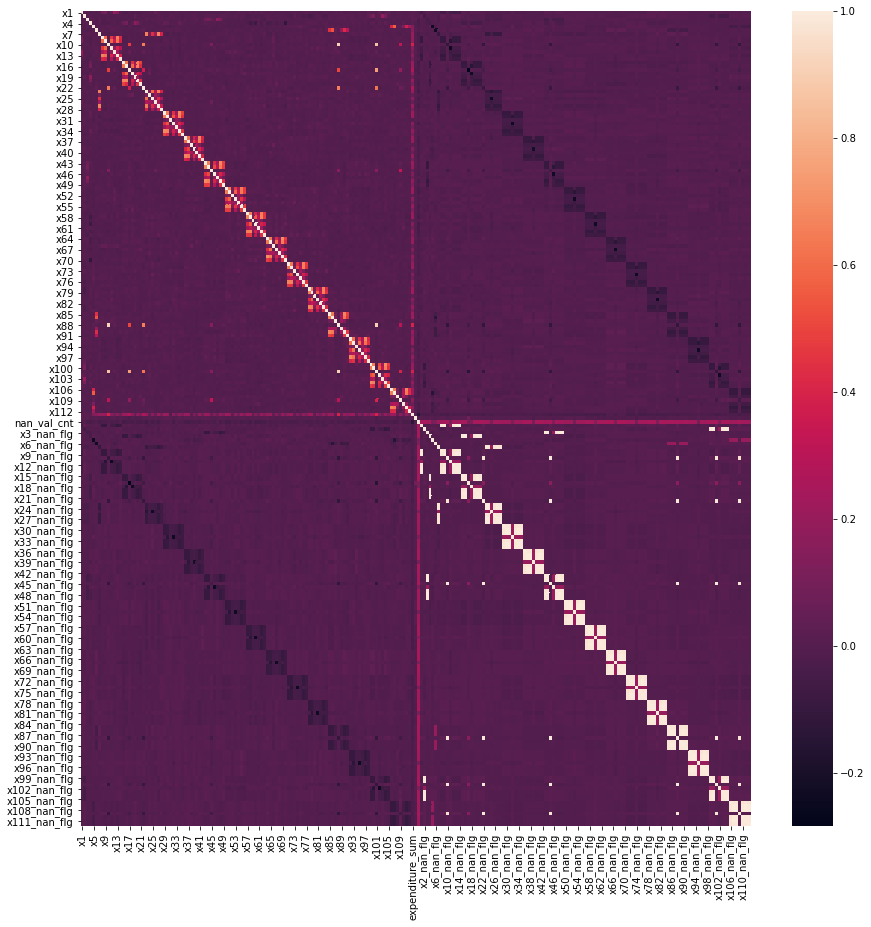

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_0.corr())

In [116]:
#Calculate correlations
correlation = X_train_0.corr().abs()


In [117]:
# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop90 = [column for column in upper.columns if any(upper[column] > 0.90)]
print('The list of variables with correlation more than 0.9: ',to_drop90)
to_drop85 = [column for column in upper.columns if any(upper[column] > 0.85)]
print('The list of variables with correlation more than 0.85: ',to_drop85)
to_drop80 = [column for column in upper.columns if any(upper[column] > 0.80)]
print('The list of variables with correlation more than 0.80: ',to_drop80)
to_drop70 = [column for column in upper.columns if any(upper[column] > 0.70)]
print('The list of variables with correlation more than 0.70: ',to_drop70)
to_drop60 = [column for column in upper.columns if any(upper[column] > 0.60)]
print('The list of variables with correlation more than 0.60: ',to_drop60)


The list of variables with correlation more than 0.9:  ['x88', 'x101', 'x8_nan_flg', 'x9_nan_flg', 'x12_nan_flg', 'x13_nan_flg', 'x14_nan_flg', 'x15_nan_flg', 'x16_nan_flg', 'x19_nan_flg', 'x20_nan_flg', 'x21_nan_flg', 'x22_nan_flg', 'x23_nan_flg', 'x24_nan_flg', 'x26_nan_flg', 'x27_nan_flg', 'x28_nan_flg', 'x30_nan_flg', 'x31_nan_flg', 'x33_nan_flg', 'x34_nan_flg', 'x35_nan_flg', 'x37_nan_flg', 'x38_nan_flg', 'x40_nan_flg', 'x41_nan_flg', 'x42_nan_flg', 'x43_nan_flg', 'x44_nan_flg', 'x45_nan_flg', 'x47_nan_flg', 'x48_nan_flg', 'x49_nan_flg', 'x51_nan_flg', 'x52_nan_flg', 'x54_nan_flg', 'x55_nan_flg', 'x56_nan_flg', 'x58_nan_flg', 'x59_nan_flg', 'x61_nan_flg', 'x62_nan_flg', 'x63_nan_flg', 'x65_nan_flg', 'x66_nan_flg', 'x68_nan_flg', 'x69_nan_flg', 'x70_nan_flg', 'x72_nan_flg', 'x73_nan_flg', 'x75_nan_flg', 'x76_nan_flg', 'x77_nan_flg', 'x79_nan_flg', 'x80_nan_flg', 'x82_nan_flg', 'x83_nan_flg', 'x84_nan_flg', 'x86_nan_flg', 'x87_nan_flg', 'x88_nan_flg', 'x89_nan_flg', 'x90_nan_flg', '

In [118]:
#Drop features with correlation higher than 0.6
X_train_0.drop(to_drop60, axis=1, inplace=True)

In [119]:
X_train_0.head(3)

x1        x2        x3        x4          x5   x6  \
key date                                                                  
683 2012-01-01  0.793085  0.000000  0.690346  0.000000    0.000000  0.0   
    2012-02-01  0.000000  0.000686  0.590133  0.000000  362.021309  0.0   
    2012-03-01  0.000000  0.000000  0.000000  0.672651    0.000000  0.0   

                        x7            x8          x10  x11        x12  \
key date                                                                
683 2012-01-01  502.893893  10235.637780  3190.003651  0.0 -28.651684   
    2012-02-01   72.833160     88.793012  2650.403762  0.0   0.000000   
    2012-03-01  880.917406    553.998042  2737.479632  0.0  -6.347258   

                       x14           x15  x17         x18        x19  \
key date                                                               
683 2012-01-01  136.621699    299.643323  0.0    0.000000   4.369916   
    2012-02-01    0.000000  11722.413830  0.0  674.974996  -0.402117   
    2012-03-01    2.617234   7676.235559  0.0    0.000000 -57.303368   

                      x21       x24         x26        x28           x29  x31  \
key date                                                                        
683 2012-01-01   0.000000  0.000000    4.434880  58.435359      0.000000  0.0   
    2012-02-01  36.794284  0.000000    0.000000   1.320652    138.650804  0.0   
    2012-03-01  25.679593  1.587617  309.109919   9.481479  11213.037290  0.0   

                        x32       x33        x35        x36  x38  x39  \
key date                                                                
683 2012-01-01     0.000000  0.000000   0.000000  56.519402  0.0  0.0   
    2012-02-01     0.000000  3.807971   0.000000  37.871432  0.0  0.0   
    2012-03-01  1349.949992 -0.804235  73.588569   0.000000  0.0  0.0   

                     x40       x42          x43  x45  x46         x47  \
key date                                                                
683 2012-01-01  0.964511 -0.437056  1126.332080  0.0  0.0   89.606255   
    2012-02-01  3.337018 -5.633266   453.129492  0.0  0.0  148.537185   
    2012-03-01  0.000000  0.000000   438.294127  0.0  0.0    3.246027   

                     x49          x50       x52  x53         x54       x56  \
key date                                                                     
683 2012-01-01  2.251405   182.856183  0.000343  0.0  136.025774  2.922881   
    2012-02-01 -1.695959  1073.159349  0.000000  0.0  219.944395 -0.394251   
    2012-03-01  0.000000    80.163922  0.000000  0.0   -2.257121  0.000000   

                       x57  x59         x60         x61       x63  \
key date                                                            
683 2012-01-01    0.000000  0.0    0.000000    0.000000  0.000000   
    2012-02-01   18.451382  0.0  107.838667  111.140346  0.951787   
    2012-03-01  277.301608  0.0    0.000000    2.684082  0.000000   

                         x64  x66        x68        x70         x71       x73  \
key date                                                                        
683 2012-01-01  13263.652160  0.0 -71.552862  -5.239458  156.984530  0.621375   
    2012-02-01    243.624051  0.0   6.083077  57.287633  116.309090  0.000000   
    2012-03-01      1.847339  0.0   1.102266   0.000000   46.862762  0.000000   

                x74        x75        x77        x78  x80       x81       x82  \
key date                                                                        
683 2012-01-01  0.0  15.623353  34.305793   0.000000  0.0  0.000000  0.000000   
    2012-02-01  0.0   2.122137   0.000000  43.852976  0.0  0.000000  0.000000   
    2012-03-01  0.0   0.955845  -0.874112  80.014693  0.0  0.254988  3.202027   

                     x84         x85       x87         x89       x91  \
key date                                                               
683 2012-01-01  0.000000    0.000000  0.000000    0.000000  0.000000   
    2012-02-01  

In [120]:
X_train_0.sort_index(level=1, inplace=True)
Y_train.sort_index(level=1, inplace=True)

In [121]:
X_Y_train = pd.merge(X_train_0, Y_train, how='left', on=['key', 'date'] )
X_Y_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8437 entries, (683, Timestamp('2012-01-01 00:00:00')) to (99444, Timestamp('2018-06-01 00:00:00'))
Columns: 112 entries, x1 to y
dtypes: float64(78), int32(32), int64(2)
memory usage: 6.2 MB


In [122]:
y = X_Y_train.dropna().y
X = X_Y_train.dropna().drop(['y'], axis=1)

In [123]:
X_Y_test = pd.merge(X_test, Y_test, how='left', on=['key', 'date'] )
X_Y_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (683, Timestamp('2018-07-01 00:00:00')) to (99444, Timestamp('2019-06-01 00:00:00'))
Columns: 228 entries, x1 to y
dtypes: float64(114), int32(112), int64(2)
memory usage: 1.9 MB


In [124]:
y_tst = X_Y_test.dropna().y
X_tst = X_Y_test.dropna().drop(['y'], axis=1)

In [125]:
y_tst

Series([], Name: y, dtype: float64)

In [126]:

from sklearn.linear_model import LinearRegression

In [127]:
#Split X_train into train and test set for training the model 
#Test set has history of 1 year
X_t_train = X[X.index.get_level_values('date')<='2017-06-01']
Y_t_train = y[y.index.get_level_values('date')<='2017-06-01']
X_t_test = X[X.index.get_level_values('date')>'2017-06-01']
Y_t_test = y[y.index.get_level_values('date')>'2017-06-01']

X_t_train

x1        x2        x3        x4         x5  \
key   date                                                            
683   2012-01-01  0.793085  0.000000  0.690346  0.000000   0.000000   
2831  2012-01-01  0.000000  0.206788  0.309973  0.000000  65.363716   
2835  2012-01-01  0.000000  0.000000  0.000000  0.246592   0.000000   
4361  2012-01-01  0.000000  0.246328  0.000000  0.000000   0.000000   
6846  2012-01-01  0.000000  0.000000  0.000000  0.000000   0.000000   
...                    ...       ...       ...       ...        ...   
96037 2017-06-01  0.000000  0.000000  0.000000  0.000000   7.171966   
97021 2017-06-01  0.000000  0.000000  0.000000  0.000000   0.000000   
97392 2017-06-01  0.000000  0.863345  0.000000  0.067509   0.000000   
98721 2017-06-01  0.000000  0.000000  0.000000  0.000000   0.000000   
99444 2017-06-01  0.136937  1.204228  0.000000  0.000000  47.254529   

                          x6           x7            x8           x10  \
key   date                                                              
683   2012-01-01    0.000000   502.893893  10235.637780   3190.003651   
2831  2012-01-01    0.000000     3.308285     -6.327448   5156.709818   
2835  2012-01-01   12.840123     0.076726      2.245969      0.000000   
4361  2012-01-01    0.000000   107.715210     36.005141   3138.155925   
6846  2012-01-01    0.000000  4487.777522    370.613833   7691.550946   
...                      ...          ...           ...           ...   
96037 2017-06-01   58.058960    26.070199     23.133051      5.836079   
97021 2017-06-01    0.000000    72.846181   3173.894789   1301.865134   
97392 2017-06-01  146.152801     0.370068    159.441028  17529.976690   
98721 2017-06-01    0.000000    23.872784      1.073204  35618.841350   
99444 2017-06-01    0.000000  2131.825798   6857.554045   5252.957120   

                        x11        x12         x14          x15           x17  \
key   date                                                                      
683   2012-01-01   0.000000 -28.651684  136.621699   299.643323      0.000000   
2831  2012-01-01   1.055048   0.000000   22.702075    43.737277      0.000000   
2835  2012-01-01   0.000000   0.000000    0.000000     4.285112      0.000000   
4361  2012-01-01   0.724106   3.017743    0.000000  1636.167653      0.000000   
6846  2012-01-01   0.000000   0.000000    0.000000   118.014905      0.000000   
...                     ...        ...         ...          ...           ...   
96037 2017-06-01   0.000000   0.000000   -0.000013  3516.776920      2.526064   
97021 2017-06-01   0.000000   1.494775   19.717220   180.921396      0.000000   
97392 2017-06-01  63.244579  54.406568    0.465127    89.068888   9355.016313   
98721 2017-06-01   0.000000  -0.367007    0.000000   115.441980  19944.152150   
99444 2017-06-01   0.000000   0.921584  109.997220   736.119657   2256.918906   

                          x18        x19         x21       x24         x26  \
key   date                                                                   
683   2012-01-01     0.000000   4.369916    0.000000  0.000000    4.434880   
2831  2012-01-01    17.529211   0.034446    3.870303  0.000000    0.000000   
2835  2012-01-01     0.000000   0.133325    0.000000  0.000000   -0.003703   
4361  2012-01-01  1590.571621  22.579411    8.766863  0.000000   26.913618   
6846  2012-01-01     0.000000   0.572008   -5.244035  1.199578  396.693703   
...                       ...        ...         ...       ...         ...   
96037 2017-06-01   795.346253   7.690502  219.656368  0.000000   -0.773682   
97021 2017-06-01     0.000000  39.209745    0.000000  0.326426   45.775788   
97392 2017-06-01     2.840211   1.950049    4.219783  0.000000    0.101231   
98721 2017-06-01     0.000000  49.422236    0.432526  0.000000    0.000000   
99444 2017-06-01    41.386828  14.425006    9.872846  0.000000    0.422871   

                         x28           x29       x31         x32         x33  \
k

In [128]:
Y_t_test

key    date      
683    2017-07-01     7095.005600
894    2017-07-01     6580.642851
2831   2017-07-01     7013.916301
2835   2017-07-01     6727.760776
4361   2017-07-01     6890.101561
                         ...     
96037  2018-06-01    10000.000000
97021  2018-06-01     7074.881793
97392  2018-06-01     7132.236993
98721  2018-06-01     7177.739183
99444  2018-06-01     7115.124318
Name: y, Length: 1423, dtype: float64

In [129]:
len(Y_t_train)

6973

In [130]:
len(X_t_train)

6973

In [131]:
list(X_t_train)

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x10',
 'x11',
 'x12',
 'x14',
 'x15',
 'x17',
 'x18',
 'x19',
 'x21',
 'x24',
 'x26',
 'x28',
 'x29',
 'x31',
 'x32',
 'x33',
 'x35',
 'x36',
 'x38',
 'x39',
 'x40',
 'x42',
 'x43',
 'x45',
 'x46',
 'x47',
 'x49',
 'x50',
 'x52',
 'x53',
 'x54',
 'x56',
 'x57',
 'x59',
 'x60',
 'x61',
 'x63',
 'x64',
 'x66',
 'x68',
 'x70',
 'x71',
 'x73',
 'x74',
 'x75',
 'x77',
 'x78',
 'x80',
 'x81',
 'x82',
 'x84',
 'x85',
 'x87',
 'x89',
 'x91',
 'x92',
 'x94',
 'x96',
 'x98',
 'x99',
 'x102',
 'x103',
 'x105',
 'x106',
 'x108',
 'x109',
 'x110',
 'x112',
 'expenditure_sum',
 'month',
 'nan_val_cnt',
 'x1_nan_flg',
 'x2_nan_flg',
 'x3_nan_flg',
 'x4_nan_flg',
 'x5_nan_flg',
 'x6_nan_flg',
 'x7_nan_flg',
 'x10_nan_flg',
 'x11_nan_flg',
 'x17_nan_flg',
 'x18_nan_flg',
 'x25_nan_flg',
 'x29_nan_flg',
 'x32_nan_flg',
 'x36_nan_flg',
 'x39_nan_flg',
 'x46_nan_flg',
 'x50_nan_flg',
 'x53_nan_flg',
 'x57_nan_flg',
 'x60_nan_flg',
 'x64_nan_flg',
 

In [132]:
#import CatBoost
from catboost import CatBoostRegressor

In [133]:
X_t_train = X_t_train.drop(['month'], axis=1)
X_t_train['month'] = X_t_train.index.get_level_values('date').month.astype(int)

In [134]:
X_t_test = X_t_test.drop(['month'], axis=1)
X_t_test['month'] = X_t_test.index.get_level_values('date').month.astype(int)

In [135]:
len(X_t_test)

1423

In [136]:
#define WMAPE function to assess the model
def get_WMAPE(model, train_to_predict, train_true_value, tst_to_predict, tst_true_value):
    prediction_tst =  model.predict(tst_to_predict)
    Y_tst_pred = tst_true_value.to_frame()
    Y_tst_pred['predicted'] = prediction_tst
    Y_tst_pred['y_pred_diff'] = abs(Y_tst_pred['y'] - Y_tst_pred['predicted'])
    prediction_train = model.predict(train_to_predict)
    Y_trn_pred = train_true_value.to_frame()
    Y_trn_pred['predicted'] = prediction_train
    Y_trn_pred['y_pred_diff'] = abs(Y_trn_pred['y'] - Y_trn_pred['predicted'])
    WMAPE_trn = (sum(Y_trn_pred['y_pred_diff'])/sum(Y_trn_pred['y']))*100
    WMAPE_tst = (sum(Y_tst_pred['y_pred_diff'])/sum(Y_tst_pred['y']))*100
    print("The weighted mean absolute percent error (WMAPE) for model ", model, "on train set: ",  WMAPE_trn)
    print("The weighted mean absolute percent error (WMAPE) for model ", model, "on test set: ",  WMAPE_tst)

In [137]:
cbr = CatBoostRegressor( iterations=30, max_depth=9, learning_rate=0.2, random_state=23, cat_features=['month'])
cbr.fit(X_t_train, Y_t_train)

0:	learn: 2160.8682809	total: 240ms	remaining: 6.97s
1:	learn: 2097.4391228	total: 1.63s	remaining: 22.8s
2:	learn: 2049.7973023	total: 2.52s	remaining: 22.7s
3:	learn: 2007.6508058	total: 3.34s	remaining: 21.7s
4:	learn: 1974.3616428	total: 4.17s	remaining: 20.9s
5:	learn: 1952.2736474	total: 4.91s	remaining: 19.6s
6:	learn: 1932.0966895	total: 5.62s	remaining: 18.5s
7:	learn: 1913.3255029	total: 6.16s	remaining: 17s
8:	learn: 1894.3991843	total: 6.72s	remaining: 15.7s
9:	learn: 1883.1489390	total: 7.28s	remaining: 14.6s
10:	learn: 1868.5912797	total: 7.81s	remaining: 13.5s
11:	learn: 1853.2411743	total: 8.53s	remaining: 12.8s
12:	learn: 1837.1297296	total: 9.21s	remaining: 12s
13:	learn: 1825.9530140	total: 9.75s	remaining: 11.1s
14:	learn: 1816.4647128	total: 10.3s	remaining: 10.3s
15:	learn: 1805.4157659	total: 10.9s	remaining: 9.51s
16:	learn: 1798.5269078	total: 11.4s	remaining: 8.72s
17:	learn: 1788.4885607	total: 11.9s	remaining: 7.95s
18:	learn: 1779.6608834	total: 12.5s	remai

In [138]:
get_WMAPE(cbr, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  <catboost.core.CatBoostRegressor object at 0x000000FA806E8CD0> on train set:  37.7671102283964
The weighted mean absolute percent error (WMAPE) for model  <catboost.core.CatBoostRegressor object at 0x000000FA806E8CD0> on test set:  35.69829981877234


In [73]:
#Calculate the feature importance 
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_t_test.columns
feature_im = cbr.feature_importances_
feature_importances['importance'] = feature_im
feature_importances.sort_values(by='importance', ascending=False)

feature  importance
110            month   24.338349
8                x10   13.994516
85       x10_nan_flg    3.798386
73              x109    2.264132
13               x17    2.187320
6                 x7    1.934332
76   expenditure_sum    1.676327
31               x45    1.646156
87       x17_nan_flg    1.616647
62               x91    1.602056
48               x70    1.483806
28               x40    1.426328
29               x42    1.365404
26               x38    1.357190
34               x49    1.354131
53               x77    1.210441
65               x96    1.153804
10               x12    1.143103
40               x57    1.117935
24               x35    1.096197
75              x112    1.081465
16               x21    1.080834
107      x95_nan_flg    1.076908
74              x110    1.037103
44               x63    1.022647
71              x106    0.989838
27               x39    0.961788
43               x61    0.883614
49               x71    0.824119
38               x54    0.819331
21               x31    0.804549
30               x43    0.799451
54               x78    0.784643
11               x14    0.780889
69              x103    0.771439
68              x102    0.757434
60               x87    0.752672
4                 x5    0.672852
5                 x6    0.649055
23               x33    0.598525
50               x73    0.574915
14               x18    0.563503
41               x59    0.563040
64               x94    0.556151
1                 x2    0.554379
9                x11    0.549672
33               x47    0.546299
35               x50    0.533209
70              x105    0.526896
12               x15    0.504148
39               x56    0.496102
72              x108    0.488531
20               x29    0.487534
51               x74    0.475163
77       nan_val_cnt    0.474471
63               x92    0.450331
2                 x3    0.433275
67               x99    0.405475
7                 x8    0.390107
66               x98    0.368274
104      x81_nan_flg    0.360592
15               x19    0.353643
52               x75    0.343982
47               x68    0.335062
57               x82    0.333070
36               x52    0.295733
37               x53    0.280689
18               x26    0.275372
84        x7_nan_flg    0.274985
61               x89    0.271933
3                 x4    0.267030
45               x64    0.266233
100      x67_nan_flg    0.265560
56               x81    0.255788
22               x32    0.213786
59               x85    0.210889
0                 x1    0.152060
55               x80    0.132655
109     x106_nan_flg    0.118130
25               x36    0.114939
32               x46    0.020682
102      x74_nan_flg    0.000000
97       x57_nan_flg    0.000000
98       x60_nan_flg    0.000000
99       x64_nan_flg    0.000000
101      x71_nan_flg    0.000000
103      x78_nan_flg    0.000000
95       x50_nan_flg    0.000000
19               x28    0.000000
105      x85_nan_flg    0.000000
106      x92_nan_flg    0.000000
17               x24    0.000000
108     x102_nan_flg    0.000000
96       x53_nan_flg    0.000000
58               x84    0.000000
78        x1_nan_flg    0.000000
93       x39_nan_flg    0.000000
92       x36_nan_flg    0.000000
91       x32_nan_flg    0.000000
90       x29_nan_flg    0.000000
89       x25_nan_flg    0.000000
88       x18_nan_flg    0.000000
86       x11_nan_flg    0.000000
42               x60    0.000000
46               x66    0.000000
83        x6_nan_flg    0.000000
82        x5_nan_flg    0.000000
81        x4_nan_flg    0.000000
80        x3_nan_flg    0.000000
79        x2_nan_flg    0.000000
94       x46_nan_flg    0.000000

Text(0.5, 1.0, 'Feature Importances')

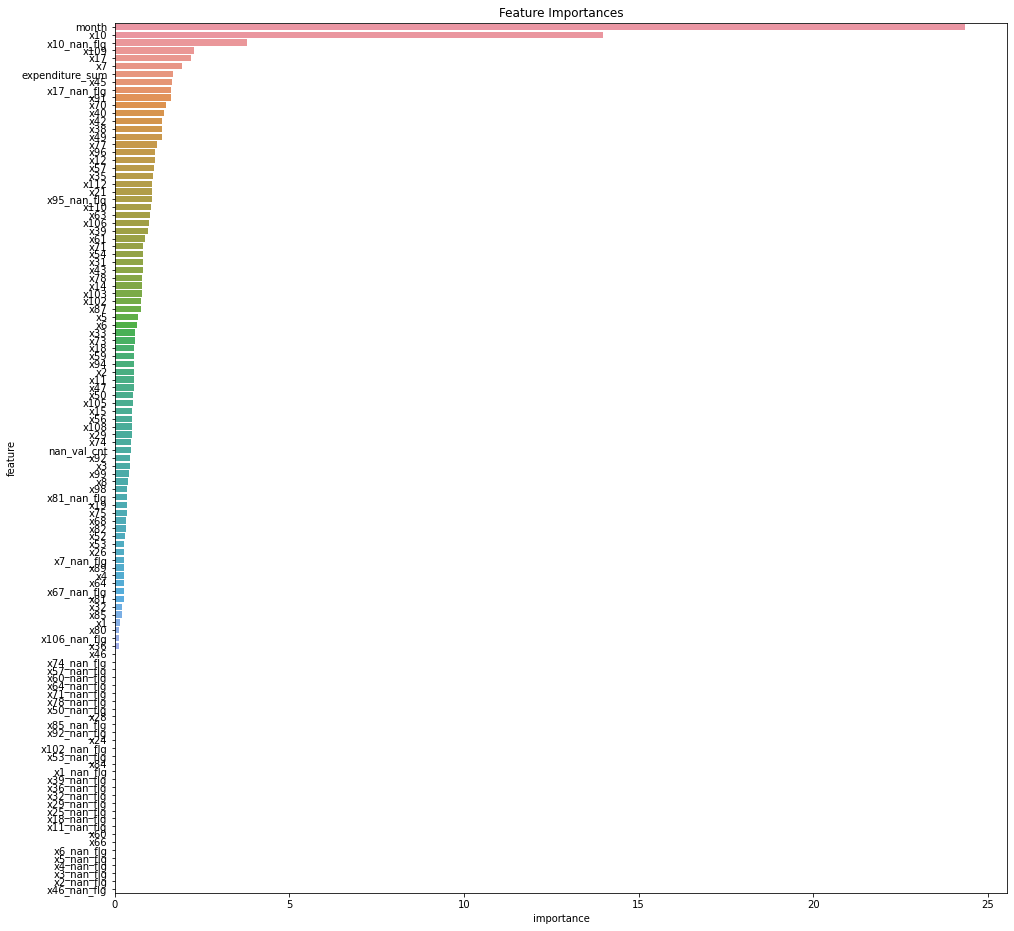

In [74]:
# Plot the feature importances using seaborn
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='importance', ascending=False), x='importance', y='feature')
plt.title('Feature Importances')  
#plt.savefig("feature_importances.png")

RANDOMIZED SEARCH CV FOR CATBOOST

In [75]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

mdl = CatBoostRegressor(eval_metric = 'RMSE', random_state=23, 
                        cat_features=['month'])

                  
param_grid = {
    'max_depth': [3,4,5,6,7,8,9], 
#    'eta': [0.05, 0.1, 0.3],
    'learning_rate': [0.05, 0.1, 0.2, 0.3,0.4],
    'subsample': [0.7, 0.8, 0.9, 1.0], 
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 
    'n_estimators': [25, 40, 50, 75, 100]}

rs_mdl = RandomizedSearchCV(mdl, param_grid, n_iter=30, cv=3, random_state=42)
rs_mdl.fit(X_t_train, Y_t_train, eval_set=[(X_t_test, Y_t_test)])
y_pred = rs_mdl.predict(X_t_test)

best_score = rs_mdl.best_score_
best_params = rs_mdl.best_params_
rs_mdl.cv_results_

print(best_score)
print(rs_mdl.best_score_)



for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

0:	learn: 2156.6893121	test: 2281.5279366	best: 2281.5279366 (0)	total: 37.7ms	remaining: 904ms
1:	learn: 2118.9719325	test: 2239.8767606	best: 2239.8767606 (1)	total: 75.6ms	remaining: 869ms
2:	learn: 2086.3114897	test: 2204.2999868	best: 2204.2999868 (2)	total: 110ms	remaining: 809ms
3:	learn: 2063.1236280	test: 2181.5125364	best: 2181.5125364 (3)	total: 145ms	remaining: 764ms
4:	learn: 2039.8886614	test: 2154.9435752	best: 2154.9435752 (4)	total: 180ms	remaining: 720ms
5:	learn: 2023.2237933	test: 2135.5948496	best: 2135.5948496 (5)	total: 214ms	remaining: 676ms
6:	learn: 2010.3935196	test: 2112.8068927	best: 2112.8068927 (6)	total: 263ms	remaining: 676ms
7:	learn: 1994.8171752	test: 2093.9191798	best: 2093.9191798 (7)	total: 298ms	remaining: 633ms
8:	learn: 1979.9675191	test: 2077.3970239	best: 2077.3970239 (8)	total: 335ms	remaining: 595ms
9:	learn: 1968.5315176	test: 2066.1377127	best: 2066.1377127 (9)	total: 368ms	remaining: 552ms
10:	learn: 1958.6958315	test: 2052.4397604	best:

10:	learn: 1757.3276875	test: 1877.8076602	best: 1877.8076602 (10)	total: 1.29s	remaining: 4.57s
11:	learn: 1750.0408633	test: 1875.3729984	best: 1875.3729984 (11)	total: 1.4s	remaining: 4.42s
12:	learn: 1742.7969865	test: 1877.6726481	best: 1875.3729984 (11)	total: 1.52s	remaining: 4.33s
13:	learn: 1734.6824127	test: 1877.7535712	best: 1875.3729984 (11)	total: 1.63s	remaining: 4.19s
14:	learn: 1726.3654908	test: 1878.5675058	best: 1875.3729984 (11)	total: 1.74s	remaining: 4.06s
15:	learn: 1719.6087086	test: 1876.7500264	best: 1875.3729984 (11)	total: 1.85s	remaining: 3.93s
16:	learn: 1710.1198872	test: 1876.8612996	best: 1875.3729984 (11)	total: 1.96s	remaining: 3.8s
17:	learn: 1703.7119997	test: 1877.4595683	best: 1875.3729984 (11)	total: 2.07s	remaining: 3.67s
18:	learn: 1695.4656190	test: 1878.3892382	best: 1875.3729984 (11)	total: 2.18s	remaining: 3.56s
19:	learn: 1685.0846579	test: 1880.1381911	best: 1875.3729984 (11)	total: 2.3s	remaining: 3.46s
20:	learn: 1677.4142840	test: 187

46:	learn: 1526.1901186	test: 1914.0315687	best: 1858.3386607 (7)	total: 5.55s	remaining: 354ms
47:	learn: 1521.3756792	test: 1917.9086135	best: 1858.3386607 (7)	total: 5.66s	remaining: 236ms
48:	learn: 1514.8477633	test: 1919.7600377	best: 1858.3386607 (7)	total: 5.76s	remaining: 118ms
49:	learn: 1503.2405023	test: 1922.5401706	best: 1858.3386607 (7)	total: 5.87s	remaining: 0us

bestTest = 1858.338661
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 2100.3521167	test: 2377.3655390	best: 2377.3655390 (0)	total: 150ms	remaining: 7.37s
1:	learn: 2010.5607836	test: 2271.6419696	best: 2271.6419696 (1)	total: 293ms	remaining: 7.03s
2:	learn: 1967.1107184	test: 2228.1223150	best: 2228.1223150 (2)	total: 478ms	remaining: 7.48s
3:	learn: 1938.2126705	test: 2220.2456642	best: 2220.2456642 (3)	total: 611ms	remaining: 7.03s
4:	learn: 1926.7245532	test: 2219.8791115	best: 2219.8791115 (4)	total: 772ms	remaining: 6.95s
5:	learn: 1912.3192826	test: 2196.7938530	best: 2196.7938530 (5)

31:	learn: 1776.3147641	test: 1877.6001478	best: 1877.6001478 (31)	total: 6.77s	remaining: 9.09s
32:	learn: 1775.9664874	test: 1877.1392720	best: 1877.1392720 (32)	total: 6.94s	remaining: 8.83s
33:	learn: 1775.6979467	test: 1876.7356852	best: 1876.7356852 (33)	total: 7.1s	remaining: 8.56s
34:	learn: 1775.0011839	test: 1876.9183918	best: 1876.7356852 (33)	total: 7.28s	remaining: 8.32s
35:	learn: 1774.1072558	test: 1876.2760458	best: 1876.2760458 (35)	total: 7.48s	remaining: 8.1s
36:	learn: 1764.5910462	test: 1870.3997653	best: 1870.3997653 (36)	total: 7.65s	remaining: 7.86s
37:	learn: 1762.2802297	test: 1869.5976567	best: 1869.5976567 (37)	total: 7.84s	remaining: 7.64s
38:	learn: 1761.7168693	test: 1869.1918214	best: 1869.1918214 (38)	total: 8.06s	remaining: 7.44s
39:	learn: 1761.4527787	test: 1869.0583515	best: 1869.0583515 (39)	total: 8.24s	remaining: 7.21s
40:	learn: 1754.8084609	test: 1866.6597001	best: 1866.6597001 (40)	total: 8.5s	remaining: 7.05s
41:	learn: 1754.3092994	test: 186

42:	learn: 1843.2137355	test: 1854.2361689	best: 1854.2361689 (42)	total: 7.7s	remaining: 5.73s
43:	learn: 1842.6767692	test: 1854.5573619	best: 1854.2361689 (42)	total: 7.88s	remaining: 5.55s
44:	learn: 1838.3927087	test: 1855.1531555	best: 1854.2361689 (42)	total: 8.03s	remaining: 5.36s
45:	learn: 1832.8587521	test: 1855.1028960	best: 1854.2361689 (42)	total: 8.19s	remaining: 5.16s
46:	learn: 1830.4544636	test: 1854.9517699	best: 1854.2361689 (42)	total: 8.38s	remaining: 5s
47:	learn: 1827.8718478	test: 1855.2193927	best: 1854.2361689 (42)	total: 8.54s	remaining: 4.8s
48:	learn: 1827.2558062	test: 1855.4158043	best: 1854.2361689 (42)	total: 8.7s	remaining: 4.61s
49:	learn: 1823.4487730	test: 1856.4075385	best: 1854.2361689 (42)	total: 8.91s	remaining: 4.46s
50:	learn: 1822.5138532	test: 1856.4564497	best: 1854.2361689 (42)	total: 9.08s	remaining: 4.27s
51:	learn: 1818.7904078	test: 1856.4027187	best: 1854.2361689 (42)	total: 9.24s	remaining: 4.08s
52:	learn: 1815.6380888	test: 1856.3

52:	learn: 1812.0938091	test: 2169.2304800	best: 2162.9982924 (32)	total: 8.61s	remaining: 3.57s
53:	learn: 1811.6757305	test: 2169.4863318	best: 2162.9982924 (32)	total: 8.79s	remaining: 3.42s
54:	learn: 1805.0068034	test: 2166.9035815	best: 2162.9982924 (32)	total: 8.94s	remaining: 3.25s
55:	learn: 1804.4825075	test: 2168.1084414	best: 2162.9982924 (32)	total: 9.1s	remaining: 3.09s
56:	learn: 1804.1762766	test: 2168.5471158	best: 2162.9982924 (32)	total: 9.29s	remaining: 2.93s
57:	learn: 1803.7844270	test: 2169.3513897	best: 2162.9982924 (32)	total: 9.45s	remaining: 2.77s
58:	learn: 1803.4100766	test: 2169.8038722	best: 2162.9982924 (32)	total: 9.65s	remaining: 2.62s
59:	learn: 1799.5514428	test: 2171.6037859	best: 2162.9982924 (32)	total: 9.79s	remaining: 2.45s
60:	learn: 1798.4418087	test: 2172.2144220	best: 2162.9982924 (32)	total: 9.94s	remaining: 2.28s
61:	learn: 1798.0730097	test: 2172.5164856	best: 2162.9982924 (32)	total: 10.1s	remaining: 2.11s
62:	learn: 1796.9688675	test: 2

63:	learn: 1804.0653626	test: 1878.4338495	best: 1878.4338495 (63)	total: 6.83s	remaining: 3.84s
64:	learn: 1802.4759531	test: 1877.7444244	best: 1877.7444244 (64)	total: 6.94s	remaining: 3.73s
65:	learn: 1800.6584544	test: 1877.3604078	best: 1877.3604078 (65)	total: 7.08s	remaining: 3.65s
66:	learn: 1799.4506630	test: 1876.9620466	best: 1876.9620466 (66)	total: 7.22s	remaining: 3.56s
67:	learn: 1798.3498564	test: 1876.4398181	best: 1876.4398181 (67)	total: 7.32s	remaining: 3.44s
68:	learn: 1796.1355364	test: 1875.3220480	best: 1875.3220480 (68)	total: 7.41s	remaining: 3.33s
69:	learn: 1794.9790634	test: 1874.8523930	best: 1874.8523930 (69)	total: 7.51s	remaining: 3.22s
70:	learn: 1793.4390195	test: 1874.4974760	best: 1874.4974760 (70)	total: 7.6s	remaining: 3.1s
71:	learn: 1792.0605151	test: 1873.5628096	best: 1873.5628096 (71)	total: 7.7s	remaining: 2.99s
72:	learn: 1790.6419235	test: 1873.2828701	best: 1873.2828701 (72)	total: 7.79s	remaining: 2.88s
73:	learn: 1789.1272117	test: 187

48:	learn: 1921.8947954	test: 1907.2779100	best: 1907.2779100 (48)	total: 5.46s	remaining: 5.68s
49:	learn: 1919.5371552	test: 1904.7505642	best: 1904.7505642 (49)	total: 5.57s	remaining: 5.57s
50:	learn: 1917.0536658	test: 1903.2141683	best: 1903.2141683 (50)	total: 5.66s	remaining: 5.44s
51:	learn: 1915.2415029	test: 1900.6067216	best: 1900.6067216 (51)	total: 5.78s	remaining: 5.34s
52:	learn: 1913.4496968	test: 1898.8313224	best: 1898.8313224 (52)	total: 5.89s	remaining: 5.23s
53:	learn: 1911.7517927	test: 1895.1034845	best: 1895.1034845 (53)	total: 6.03s	remaining: 5.13s
54:	learn: 1908.3864949	test: 1891.2818504	best: 1891.2818504 (54)	total: 6.17s	remaining: 5.05s
55:	learn: 1906.3996106	test: 1889.5451187	best: 1889.5451187 (55)	total: 6.28s	remaining: 4.93s
56:	learn: 1905.1900116	test: 1888.9372084	best: 1888.9372084 (56)	total: 6.39s	remaining: 4.82s
57:	learn: 1903.8296611	test: 1887.7924917	best: 1887.7924917 (57)	total: 6.5s	remaining: 4.71s
58:	learn: 1902.3662582	test: 1

34:	learn: 1937.3921294	test: 2215.3456412	best: 2215.3456412 (34)	total: 3.85s	remaining: 7.15s
35:	learn: 1934.7979621	test: 2213.6759731	best: 2213.6759731 (35)	total: 3.94s	remaining: 7.01s
36:	learn: 1931.9126796	test: 2211.9225433	best: 2211.9225433 (36)	total: 4.04s	remaining: 6.87s
37:	learn: 1929.8238215	test: 2210.8449312	best: 2210.8449312 (37)	total: 4.13s	remaining: 6.75s
38:	learn: 1928.0887990	test: 2209.3097697	best: 2209.3097697 (38)	total: 4.22s	remaining: 6.61s
39:	learn: 1926.3791677	test: 2209.6838839	best: 2209.3097697 (38)	total: 4.32s	remaining: 6.48s
40:	learn: 1924.2371384	test: 2207.2935924	best: 2207.2935924 (40)	total: 4.44s	remaining: 6.39s
41:	learn: 1922.6957264	test: 2206.4016371	best: 2206.4016371 (41)	total: 4.55s	remaining: 6.29s
42:	learn: 1920.8034563	test: 2205.4549954	best: 2205.4549954 (42)	total: 4.7s	remaining: 6.23s
43:	learn: 1919.4315363	test: 2205.4941365	best: 2205.4549954 (42)	total: 4.82s	remaining: 6.14s
44:	learn: 1917.9749933	test: 2

19:	learn: 1801.1845727	test: 1851.0983506	best: 1848.7944592 (16)	total: 862ms	remaining: 2.37s
20:	learn: 1800.0662748	test: 1850.2501649	best: 1848.7944592 (16)	total: 894ms	remaining: 2.3s
21:	learn: 1799.0594828	test: 1848.8007566	best: 1848.7944592 (16)	total: 927ms	remaining: 2.23s
22:	learn: 1797.4480067	test: 1849.0396387	best: 1848.7944592 (16)	total: 960ms	remaining: 2.17s
23:	learn: 1794.1178849	test: 1849.0454913	best: 1848.7944592 (16)	total: 995ms	remaining: 2.11s
24:	learn: 1792.5946815	test: 1850.6377866	best: 1848.7944592 (16)	total: 1.03s	remaining: 2.06s
25:	learn: 1788.0926140	test: 1851.3093542	best: 1848.7944592 (16)	total: 1.07s	remaining: 2.02s
26:	learn: 1785.4427786	test: 1851.6985114	best: 1848.7944592 (16)	total: 1.12s	remaining: 1.99s
27:	learn: 1780.8264989	test: 1849.2582385	best: 1848.7944592 (16)	total: 1.17s	remaining: 1.96s
28:	learn: 1775.7191821	test: 1847.0880180	best: 1847.0880180 (28)	total: 1.21s	remaining: 1.92s
29:	learn: 1774.7079239	test: 1

28:	learn: 1887.5903795	test: 1858.9132099	best: 1857.0827999 (21)	total: 1.2s	remaining: 1.91s
29:	learn: 1885.0512252	test: 1861.8871904	best: 1857.0827999 (21)	total: 1.25s	remaining: 1.87s
30:	learn: 1881.6565899	test: 1861.6779014	best: 1857.0827999 (21)	total: 1.28s	remaining: 1.82s
31:	learn: 1879.4709910	test: 1862.1428619	best: 1857.0827999 (21)	total: 1.33s	remaining: 1.78s
32:	learn: 1876.4676455	test: 1863.8441829	best: 1857.0827999 (21)	total: 1.38s	remaining: 1.76s
33:	learn: 1874.6399341	test: 1863.7924645	best: 1857.0827999 (21)	total: 1.43s	remaining: 1.73s
34:	learn: 1870.5232862	test: 1864.6506316	best: 1857.0827999 (21)	total: 1.48s	remaining: 1.69s
35:	learn: 1868.8003171	test: 1866.0114634	best: 1857.0827999 (21)	total: 1.52s	remaining: 1.65s
36:	learn: 1865.4063048	test: 1867.1164053	best: 1857.0827999 (21)	total: 1.56s	remaining: 1.6s
37:	learn: 1863.7586208	test: 1867.8058305	best: 1857.0827999 (21)	total: 1.59s	remaining: 1.55s
38:	learn: 1862.2605122	test: 18

40:	learn: 1829.4784714	test: 2196.3627519	best: 2184.9187858 (24)	total: 1.56s	remaining: 1.29s
41:	learn: 1826.1299238	test: 2197.9570159	best: 2184.9187858 (24)	total: 1.59s	remaining: 1.25s
42:	learn: 1823.9609978	test: 2197.6202827	best: 2184.9187858 (24)	total: 1.63s	remaining: 1.21s
43:	learn: 1823.4615127	test: 2198.1364893	best: 2184.9187858 (24)	total: 1.66s	remaining: 1.17s
44:	learn: 1820.6290126	test: 2200.0539565	best: 2184.9187858 (24)	total: 1.69s	remaining: 1.12s
45:	learn: 1820.0695452	test: 2200.0196318	best: 2184.9187858 (24)	total: 1.73s	remaining: 1.09s
46:	learn: 1818.8243040	test: 2200.0990156	best: 2184.9187858 (24)	total: 1.77s	remaining: 1.06s
47:	learn: 1814.5725419	test: 2199.0616824	best: 2184.9187858 (24)	total: 1.82s	remaining: 1.02s
48:	learn: 1812.2947455	test: 2199.7406809	best: 2184.9187858 (24)	total: 1.86s	remaining: 986ms
49:	learn: 1808.9968966	test: 2197.7026060	best: 2184.9187858 (24)	total: 1.89s	remaining: 946ms
50:	learn: 1807.6385893	test: 

0:	learn: 2125.5173457	test: 2184.7367006	best: 2184.7367006 (0)	total: 394ms	remaining: 19.3s
1:	learn: 2033.3354641	test: 2098.8336997	best: 2098.8336997 (1)	total: 709ms	remaining: 17s
2:	learn: 1972.1765098	test: 2007.3773438	best: 2007.3773438 (2)	total: 1.05s	remaining: 16.5s
3:	learn: 1932.3930958	test: 1940.9983721	best: 1940.9983721 (3)	total: 1.4s	remaining: 16.1s
4:	learn: 1899.9074073	test: 1923.3965218	best: 1923.3965218 (4)	total: 1.75s	remaining: 15.7s
5:	learn: 1871.4614212	test: 1913.8189509	best: 1913.8189509 (5)	total: 2.06s	remaining: 15.1s
6:	learn: 1838.2053329	test: 1892.7186097	best: 1892.7186097 (6)	total: 2.4s	remaining: 14.7s
7:	learn: 1813.7222576	test: 1885.4356008	best: 1885.4356008 (7)	total: 2.89s	remaining: 15.2s
8:	learn: 1800.8503619	test: 1882.3820183	best: 1882.3820183 (8)	total: 3.32s	remaining: 15.1s
9:	learn: 1778.9197683	test: 1876.3643290	best: 1876.3643290 (9)	total: 3.92s	remaining: 15.7s
10:	learn: 1759.3072595	test: 1874.5155632	best: 1874.

35:	learn: 1364.1255560	test: 2256.4345785	best: 2215.1060460 (10)	total: 14.3s	remaining: 5.56s
36:	learn: 1353.4531965	test: 2255.2163232	best: 2215.1060460 (10)	total: 14.7s	remaining: 5.15s
37:	learn: 1341.7711934	test: 2254.4105671	best: 2215.1060460 (10)	total: 15.1s	remaining: 4.75s
38:	learn: 1331.8081492	test: 2256.1641144	best: 2215.1060460 (10)	total: 15.4s	remaining: 4.35s
39:	learn: 1314.2265146	test: 2261.8539618	best: 2215.1060460 (10)	total: 15.8s	remaining: 3.95s
40:	learn: 1298.5221547	test: 2261.0692258	best: 2215.1060460 (10)	total: 16.2s	remaining: 3.56s
41:	learn: 1281.8795792	test: 2262.9009058	best: 2215.1060460 (10)	total: 16.7s	remaining: 3.18s
42:	learn: 1266.1179471	test: 2261.8721274	best: 2215.1060460 (10)	total: 17.1s	remaining: 2.78s
43:	learn: 1249.0321529	test: 2265.8978513	best: 2215.1060460 (10)	total: 17.5s	remaining: 2.38s
44:	learn: 1236.2080350	test: 2265.5823175	best: 2215.1060460 (10)	total: 17.9s	remaining: 1.99s
45:	learn: 1216.6128908	test: 

29:	learn: 1792.2092234	test: 1861.2006073	best: 1861.2006073 (29)	total: 4.39s	remaining: 1.46s
30:	learn: 1787.6360760	test: 1863.3826883	best: 1861.2006073 (29)	total: 4.52s	remaining: 1.31s
31:	learn: 1785.2445214	test: 1863.5829377	best: 1861.2006073 (29)	total: 4.7s	remaining: 1.17s
32:	learn: 1779.4985319	test: 1862.3896566	best: 1861.2006073 (29)	total: 4.84s	remaining: 1.03s
33:	learn: 1772.9345608	test: 1863.8053956	best: 1861.2006073 (29)	total: 5.02s	remaining: 886ms
34:	learn: 1767.1426151	test: 1863.5164214	best: 1861.2006073 (29)	total: 5.15s	remaining: 735ms
35:	learn: 1760.1860273	test: 1864.8344012	best: 1861.2006073 (29)	total: 5.28s	remaining: 587ms
36:	learn: 1753.3869983	test: 1866.6475610	best: 1861.2006073 (29)	total: 5.45s	remaining: 442ms
37:	learn: 1750.3197912	test: 1865.2503566	best: 1861.2006073 (29)	total: 5.58s	remaining: 294ms
38:	learn: 1741.8243032	test: 1864.7014507	best: 1861.2006073 (29)	total: 5.73s	remaining: 147ms
39:	learn: 1737.1470758	test: 1

8:	learn: 2127.2373808	test: 2197.3173255	best: 2197.3173255 (8)	total: 732ms	remaining: 1.3s
9:	learn: 2113.8394871	test: 2172.3945345	best: 2172.3945345 (9)	total: 812ms	remaining: 1.22s
10:	learn: 2102.9382195	test: 2153.3481900	best: 2153.3481900 (10)	total: 881ms	remaining: 1.12s
11:	learn: 2093.8933957	test: 2136.2321922	best: 2136.2321922 (11)	total: 957ms	remaining: 1.04s
12:	learn: 2084.6807857	test: 2124.8751489	best: 2124.8751489 (12)	total: 1.01s	remaining: 937ms
13:	learn: 2077.3210332	test: 2114.4572556	best: 2114.4572556 (13)	total: 1.09s	remaining: 858ms
14:	learn: 2069.1534235	test: 2095.2094153	best: 2095.2094153 (14)	total: 1.19s	remaining: 791ms
15:	learn: 2062.4025891	test: 2088.3866526	best: 2088.3866526 (15)	total: 1.25s	remaining: 704ms
16:	learn: 2056.1946233	test: 2073.2533929	best: 2073.2533929 (16)	total: 1.32s	remaining: 623ms
17:	learn: 2048.9955870	test: 2057.5944625	best: 2057.5944625 (17)	total: 1.41s	remaining: 546ms
18:	learn: 2043.2834219	test: 2050.

20:	learn: 1927.2611915	test: 1870.3651414	best: 1869.9002303 (19)	total: 1.07s	remaining: 203ms
21:	learn: 1923.1504416	test: 1860.0588715	best: 1860.0588715 (21)	total: 1.13s	remaining: 154ms
22:	learn: 1920.4106483	test: 1858.8948592	best: 1858.8948592 (22)	total: 1.17s	remaining: 101ms
23:	learn: 1919.3611454	test: 1859.6457184	best: 1858.8948592 (22)	total: 1.22s	remaining: 51ms
24:	learn: 1918.6339927	test: 1859.7657135	best: 1858.8948592 (22)	total: 1.31s	remaining: 0us

bestTest = 1858.894859
bestIteration = 22

Shrink model to first 23 iterations.
0:	learn: 2156.7372452	test: 2428.8461415	best: 2428.8461415 (0)	total: 46.5ms	remaining: 1.11s
1:	learn: 2101.9977326	test: 2359.1755276	best: 2359.1755276 (1)	total: 88.9ms	remaining: 1.02s
2:	learn: 2058.1845265	test: 2310.2040376	best: 2310.2040376 (2)	total: 134ms	remaining: 986ms
3:	learn: 2025.7063247	test: 2273.4833639	best: 2273.4833639 (3)	total: 174ms	remaining: 916ms
4:	learn: 2009.1515268	test: 2257.1026441	best: 2257.10

3:	learn: 2174.5949340	test: 2306.5458515	best: 2306.5458515 (3)	total: 2.95s	remaining: 33.9s
4:	learn: 2154.1037135	test: 2288.7700952	best: 2288.7700952 (4)	total: 3.65s	remaining: 32.8s
5:	learn: 2129.6737066	test: 2259.3629205	best: 2259.3629205 (5)	total: 4.38s	remaining: 32.1s
6:	learn: 2113.4432816	test: 2235.1047089	best: 2235.1047089 (6)	total: 5.05s	remaining: 31s
7:	learn: 2093.6940832	test: 2212.3414657	best: 2212.3414657 (7)	total: 5.78s	remaining: 30.4s
8:	learn: 2076.4093259	test: 2185.9749857	best: 2185.9749857 (8)	total: 6.43s	remaining: 29.3s
9:	learn: 2058.3316305	test: 2163.5522759	best: 2163.5522759 (9)	total: 7.12s	remaining: 28.5s
10:	learn: 2043.1076388	test: 2147.2503023	best: 2147.2503023 (10)	total: 7.81s	remaining: 27.7s
11:	learn: 2027.1563447	test: 2136.4621038	best: 2136.4621038 (11)	total: 8.53s	remaining: 27s
12:	learn: 2012.5501975	test: 2113.8363305	best: 2113.8363305 (12)	total: 9.27s	remaining: 26.4s
13:	learn: 1997.1460875	test: 2102.0996524	best:

38:	learn: 1764.1276962	test: 2210.4497709	best: 2210.4031167 (37)	total: 30.9s	remaining: 8.7s
39:	learn: 1757.2341920	test: 2210.4411442	best: 2210.4031167 (37)	total: 31.5s	remaining: 7.89s
40:	learn: 1747.6575719	test: 2209.1703094	best: 2209.1703094 (40)	total: 32.2s	remaining: 7.08s
41:	learn: 1742.1419719	test: 2207.6205975	best: 2207.6205975 (41)	total: 33s	remaining: 6.28s
42:	learn: 1736.4250810	test: 2207.2956039	best: 2207.2956039 (42)	total: 33.7s	remaining: 5.48s
43:	learn: 1730.9054589	test: 2206.3721066	best: 2206.3721066 (43)	total: 34.4s	remaining: 4.69s
44:	learn: 1727.8348347	test: 2205.9221281	best: 2205.9221281 (44)	total: 35.1s	remaining: 3.9s
45:	learn: 1722.8313900	test: 2205.4318852	best: 2205.4318852 (45)	total: 35.8s	remaining: 3.11s
46:	learn: 1718.0827069	test: 2205.0514513	best: 2205.0514513 (46)	total: 36.8s	remaining: 2.35s
47:	learn: 1712.4501799	test: 2202.2774268	best: 2202.2774268 (47)	total: 37.5s	remaining: 1.56s
48:	learn: 1705.2971513	test: 2201

73:	learn: 1459.3502980	test: 1875.5980989	best: 1868.7023591 (52)	total: 33.1s	remaining: 11.6s
74:	learn: 1458.7031568	test: 1875.6035391	best: 1868.7023591 (52)	total: 33.5s	remaining: 11.2s
75:	learn: 1447.1151644	test: 1876.5110971	best: 1868.7023591 (52)	total: 33.8s	remaining: 10.7s
76:	learn: 1442.0922013	test: 1877.5526891	best: 1868.7023591 (52)	total: 34.3s	remaining: 10.2s
77:	learn: 1436.0815681	test: 1879.6223041	best: 1868.7023591 (52)	total: 34.7s	remaining: 9.78s
78:	learn: 1434.1355002	test: 1879.9910458	best: 1868.7023591 (52)	total: 35s	remaining: 9.31s
79:	learn: 1428.1930747	test: 1876.0857511	best: 1868.7023591 (52)	total: 35.4s	remaining: 8.84s
80:	learn: 1422.5779881	test: 1876.3031532	best: 1868.7023591 (52)	total: 35.7s	remaining: 8.38s
81:	learn: 1415.2375523	test: 1876.5377711	best: 1868.7023591 (52)	total: 36.1s	remaining: 7.92s
82:	learn: 1406.9895061	test: 1874.8677225	best: 1868.7023591 (52)	total: 36.4s	remaining: 7.46s
83:	learn: 1405.8996178	test: 18

58:	learn: 1573.7392537	test: 1864.2924827	best: 1862.1171313 (48)	total: 21.5s	remaining: 15s
59:	learn: 1567.9443526	test: 1863.0703280	best: 1862.1171313 (48)	total: 21.9s	remaining: 14.6s
60:	learn: 1561.4177563	test: 1862.4408074	best: 1862.1171313 (48)	total: 22.3s	remaining: 14.3s
61:	learn: 1553.1384016	test: 1862.7965238	best: 1862.1171313 (48)	total: 22.8s	remaining: 14s
62:	learn: 1552.2578340	test: 1862.8348910	best: 1862.1171313 (48)	total: 23.2s	remaining: 13.6s
63:	learn: 1546.8671339	test: 1862.5323924	best: 1862.1171313 (48)	total: 23.5s	remaining: 13.2s
64:	learn: 1538.4110473	test: 1861.7324242	best: 1861.7324242 (64)	total: 23.9s	remaining: 12.9s
65:	learn: 1529.3779912	test: 1862.3519324	best: 1861.7324242 (64)	total: 24.2s	remaining: 12.5s
66:	learn: 1527.3219265	test: 1861.6682078	best: 1861.6682078 (66)	total: 24.6s	remaining: 12.1s
67:	learn: 1519.9077809	test: 1863.7998598	best: 1861.6682078 (66)	total: 25s	remaining: 11.8s
68:	learn: 1515.2393781	test: 1863.2

43:	learn: 1678.5021710	test: 2192.4557609	best: 2190.2723392 (34)	total: 16.6s	remaining: 21.1s
44:	learn: 1672.3379329	test: 2192.9248610	best: 2190.2723392 (34)	total: 17s	remaining: 20.8s
45:	learn: 1667.2606933	test: 2195.1295553	best: 2190.2723392 (34)	total: 17.4s	remaining: 20.4s
46:	learn: 1662.2609911	test: 2194.5234090	best: 2190.2723392 (34)	total: 17.8s	remaining: 20.1s
47:	learn: 1659.3843956	test: 2196.0102713	best: 2190.2723392 (34)	total: 18.2s	remaining: 19.7s
48:	learn: 1655.1126292	test: 2196.4096386	best: 2190.2723392 (34)	total: 18.6s	remaining: 19.4s
49:	learn: 1650.6704708	test: 2197.3874376	best: 2190.2723392 (34)	total: 19s	remaining: 19s
50:	learn: 1648.3404748	test: 2195.8303845	best: 2190.2723392 (34)	total: 19.3s	remaining: 18.6s
51:	learn: 1638.9367453	test: 2196.6097843	best: 2190.2723392 (34)	total: 19.7s	remaining: 18.2s
52:	learn: 1633.4564782	test: 2197.9931178	best: 2190.2723392 (34)	total: 20.2s	remaining: 17.9s
53:	learn: 1623.4189505	test: 2196.6

28:	learn: 1559.7954200	test: 1901.2725894	best: 1901.2725894 (28)	total: 18.6s	remaining: 7.05s
29:	learn: 1548.4992445	test: 1903.7222565	best: 1901.2725894 (28)	total: 19.2s	remaining: 6.41s
30:	learn: 1541.3856218	test: 1902.7118730	best: 1901.2725894 (28)	total: 19.8s	remaining: 5.76s
31:	learn: 1532.9939600	test: 1902.9193201	best: 1901.2725894 (28)	total: 20.5s	remaining: 5.12s
32:	learn: 1521.0881835	test: 1901.7601573	best: 1901.2725894 (28)	total: 21.1s	remaining: 4.47s
33:	learn: 1508.2164364	test: 1900.3199180	best: 1900.3199180 (33)	total: 21.7s	remaining: 3.83s
34:	learn: 1501.3587670	test: 1900.2767413	best: 1900.2767413 (34)	total: 22.3s	remaining: 3.19s
35:	learn: 1492.9375231	test: 1899.3449725	best: 1899.3449725 (35)	total: 22.9s	remaining: 2.55s
36:	learn: 1485.0259392	test: 1899.3622429	best: 1899.3449725 (35)	total: 23.5s	remaining: 1.91s
37:	learn: 1476.7224830	test: 1899.1904465	best: 1899.1904465 (37)	total: 24.2s	remaining: 1.27s
38:	learn: 1470.0418233	test: 

32:	learn: 1609.4756898	test: 2185.2565110	best: 2185.2565110 (32)	total: 21s	remaining: 4.46s
33:	learn: 1596.2133296	test: 2187.0629601	best: 2185.2565110 (32)	total: 21.6s	remaining: 3.82s
34:	learn: 1587.7196832	test: 2186.9554717	best: 2185.2565110 (32)	total: 22.2s	remaining: 3.17s
35:	learn: 1579.6166254	test: 2187.9926999	best: 2185.2565110 (32)	total: 22.8s	remaining: 2.54s
36:	learn: 1564.7498717	test: 2188.9207092	best: 2185.2565110 (32)	total: 23.6s	remaining: 1.91s
37:	learn: 1556.8710142	test: 2188.9996808	best: 2185.2565110 (32)	total: 24.2s	remaining: 1.27s
38:	learn: 1548.0666002	test: 2188.3376718	best: 2185.2565110 (32)	total: 24.8s	remaining: 637ms
39:	learn: 1538.9641156	test: 2187.7196235	best: 2185.2565110 (32)	total: 25.7s	remaining: 0us

bestTest = 2185.256511
bestIteration = 32

Shrink model to first 33 iterations.
0:	learn: 2151.1757989	test: 2277.2802297	best: 2277.2802297 (0)	total: 84ms	remaining: 8.32s
1:	learn: 2108.6957283	test: 2231.3517752	best: 2231.

77:	learn: 1751.5288158	test: 1863.3604542	best: 1862.3325662 (73)	total: 6.62s	remaining: 1.87s
78:	learn: 1750.0154811	test: 1862.7634304	best: 1862.3325662 (73)	total: 6.86s	remaining: 1.82s
79:	learn: 1748.3010415	test: 1862.8672458	best: 1862.3325662 (73)	total: 7.12s	remaining: 1.78s
80:	learn: 1746.3016356	test: 1861.8267847	best: 1861.8267847 (80)	total: 7.24s	remaining: 1.7s
81:	learn: 1744.4493150	test: 1861.9204826	best: 1861.8267847 (80)	total: 7.33s	remaining: 1.61s
82:	learn: 1742.5108971	test: 1862.1915584	best: 1861.8267847 (80)	total: 7.41s	remaining: 1.52s
83:	learn: 1741.2267568	test: 1861.6346680	best: 1861.6346680 (83)	total: 7.49s	remaining: 1.43s
84:	learn: 1738.5155251	test: 1859.4351488	best: 1859.4351488 (84)	total: 7.59s	remaining: 1.34s
85:	learn: 1736.7539524	test: 1858.4296390	best: 1858.4296390 (85)	total: 7.67s	remaining: 1.25s
86:	learn: 1734.6837293	test: 1857.7940831	best: 1857.7940831 (86)	total: 7.75s	remaining: 1.16s
87:	learn: 1734.3091476	test: 1

61:	learn: 1868.1527478	test: 1863.2710695	best: 1863.2710695 (61)	total: 5.01s	remaining: 3.07s
62:	learn: 1866.4053145	test: 1862.7782507	best: 1862.7782507 (62)	total: 5.09s	remaining: 2.99s
63:	learn: 1865.8655626	test: 1862.5321582	best: 1862.5321582 (63)	total: 5.17s	remaining: 2.91s
64:	learn: 1864.5739429	test: 1862.7243064	best: 1862.5321582 (63)	total: 5.24s	remaining: 2.82s
65:	learn: 1863.1159884	test: 1862.6269448	best: 1862.5321582 (63)	total: 5.31s	remaining: 2.73s
66:	learn: 1861.1802179	test: 1862.1081897	best: 1862.1081897 (66)	total: 5.39s	remaining: 2.65s
67:	learn: 1859.9428008	test: 1862.2938465	best: 1862.1081897 (66)	total: 5.46s	remaining: 2.57s
68:	learn: 1858.1237488	test: 1861.7524855	best: 1861.7524855 (68)	total: 5.53s	remaining: 2.48s
69:	learn: 1856.3480762	test: 1861.2721740	best: 1861.2721740 (69)	total: 5.67s	remaining: 2.43s
70:	learn: 1854.8824212	test: 1861.3007205	best: 1861.2721740 (69)	total: 5.84s	remaining: 2.39s
71:	learn: 1853.2358893	test: 

48:	learn: 1879.9296239	test: 2190.0145338	best: 2187.7283643 (41)	total: 4.43s	remaining: 4.61s
49:	learn: 1878.5495794	test: 2190.7134485	best: 2187.7283643 (41)	total: 4.52s	remaining: 4.52s
50:	learn: 1875.9675165	test: 2188.8102344	best: 2187.7283643 (41)	total: 4.62s	remaining: 4.43s
51:	learn: 1875.1724738	test: 2189.2180690	best: 2187.7283643 (41)	total: 4.72s	remaining: 4.36s
52:	learn: 1873.4177993	test: 2189.7845098	best: 2187.7283643 (41)	total: 4.84s	remaining: 4.29s
53:	learn: 1871.8168174	test: 2191.0820541	best: 2187.7283643 (41)	total: 4.93s	remaining: 4.2s
54:	learn: 1870.6704774	test: 2190.1080173	best: 2187.7283643 (41)	total: 5.01s	remaining: 4.1s
55:	learn: 1868.9916951	test: 2191.3387335	best: 2187.7283643 (41)	total: 5.09s	remaining: 4s
56:	learn: 1867.3834483	test: 2190.9568121	best: 2187.7283643 (41)	total: 5.18s	remaining: 3.91s
57:	learn: 1865.7478865	test: 2191.5848491	best: 2187.7283643 (41)	total: 5.26s	remaining: 3.81s
58:	learn: 1864.7007099	test: 2191.

36:	learn: 1738.4438027	test: 1852.3259034	best: 1844.0366833 (28)	total: 1.47s	remaining: 119ms
37:	learn: 1735.5010846	test: 1855.3885828	best: 1844.0366833 (28)	total: 1.51s	remaining: 79.6ms
38:	learn: 1732.8091717	test: 1856.1810625	best: 1844.0366833 (28)	total: 1.57s	remaining: 40.3ms
39:	learn: 1729.3292376	test: 1856.2912227	best: 1844.0366833 (28)	total: 1.65s	remaining: 0us

bestTest = 1844.036683
bestIteration = 28

Shrink model to first 29 iterations.
0:	learn: 2136.4049674	test: 2265.2419544	best: 2265.2419544 (0)	total: 37.7ms	remaining: 1.47s
1:	learn: 2048.4980586	test: 2070.3033298	best: 2070.3033298 (1)	total: 75.1ms	remaining: 1.43s
2:	learn: 2008.9351998	test: 1966.3426930	best: 1966.3426930 (2)	total: 111ms	remaining: 1.37s
3:	learn: 1981.8645382	test: 1937.9877478	best: 1937.9877478 (3)	total: 149ms	remaining: 1.34s
4:	learn: 1971.1843037	test: 1904.0701381	best: 1904.0701381 (4)	total: 186ms	remaining: 1.3s
5:	learn: 1962.0947857	test: 1898.4582289	best: 1898.45

0:	learn: 2041.0866998	test: 2166.0182432	best: 2166.0182432 (0)	total: 538ms	remaining: 21s
1:	learn: 1952.5251595	test: 2095.6358065	best: 2095.6358065 (1)	total: 982ms	remaining: 18.7s
2:	learn: 1884.4743232	test: 2035.5203695	best: 2035.5203695 (2)	total: 1.43s	remaining: 17.6s
3:	learn: 1845.6506442	test: 2005.7037608	best: 2005.7037608 (3)	total: 1.86s	remaining: 16.7s
4:	learn: 1820.6506501	test: 1974.6476807	best: 1974.6476807 (4)	total: 2.31s	remaining: 16.1s
5:	learn: 1790.3142698	test: 1943.1622043	best: 1943.1622043 (5)	total: 2.74s	remaining: 15.5s
6:	learn: 1765.1984984	test: 1942.3895046	best: 1942.3895046 (6)	total: 3.17s	remaining: 14.9s
7:	learn: 1750.5175618	test: 1934.1659321	best: 1934.1659321 (7)	total: 3.6s	remaining: 14.4s
8:	learn: 1729.3016204	test: 1931.7819109	best: 1931.7819109 (8)	total: 4.04s	remaining: 13.9s
9:	learn: 1712.8799710	test: 1928.1460866	best: 1928.1460866 (9)	total: 4.47s	remaining: 13.4s
10:	learn: 1697.3103977	test: 1925.1551144	best: 1925

4:	learn: 1881.4871884	test: 2238.7391802	best: 2238.7391802 (4)	total: 5.39s	remaining: 37.7s
5:	learn: 1860.2063920	test: 2229.0572395	best: 2229.0572395 (5)	total: 6.95s	remaining: 39.4s
6:	learn: 1837.2911627	test: 2225.8109793	best: 2225.8109793 (6)	total: 8.12s	remaining: 38.3s
7:	learn: 1814.6036994	test: 2224.1990564	best: 2224.1990564 (7)	total: 9.13s	remaining: 36.5s
8:	learn: 1793.9582534	test: 2220.5398343	best: 2220.5398343 (8)	total: 10.2s	remaining: 35.2s
9:	learn: 1781.4346814	test: 2217.0772695	best: 2217.0772695 (9)	total: 11.2s	remaining: 33.7s
10:	learn: 1770.2109321	test: 2213.8414272	best: 2213.8414272 (10)	total: 12.3s	remaining: 32.6s
11:	learn: 1752.9309180	test: 2212.5080096	best: 2212.5080096 (11)	total: 13.5s	remaining: 31.6s
12:	learn: 1739.9530887	test: 2210.8068639	best: 2210.8068639 (12)	total: 14.7s	remaining: 30.5s
13:	learn: 1728.1505023	test: 2211.0921903	best: 2210.8068639 (12)	total: 15.8s	remaining: 29.3s
14:	learn: 1707.5129369	test: 2202.1876633

8:	learn: 1894.7758146	test: 1884.7839839	best: 1884.7839839 (8)	total: 1.06s	remaining: 3.64s
9:	learn: 1886.3140399	test: 1886.9596830	best: 1884.7839839 (8)	total: 1.16s	remaining: 3.48s
10:	learn: 1878.0400501	test: 1887.8499633	best: 1884.7839839 (8)	total: 1.27s	remaining: 3.35s
11:	learn: 1872.0244488	test: 1890.5859212	best: 1884.7839839 (8)	total: 1.38s	remaining: 3.21s
12:	learn: 1864.9556429	test: 1892.3947694	best: 1884.7839839 (8)	total: 1.48s	remaining: 3.08s
13:	learn: 1857.1372837	test: 1893.3306675	best: 1884.7839839 (8)	total: 1.61s	remaining: 2.98s
14:	learn: 1851.2867815	test: 1892.7370194	best: 1884.7839839 (8)	total: 1.72s	remaining: 2.87s
15:	learn: 1842.5091794	test: 1894.1843143	best: 1884.7839839 (8)	total: 1.84s	remaining: 2.77s
16:	learn: 1833.0234597	test: 1891.1956171	best: 1884.7839839 (8)	total: 2.01s	remaining: 2.72s
17:	learn: 1824.7287682	test: 1894.4114102	best: 1884.7839839 (8)	total: 2.15s	remaining: 2.62s
18:	learn: 1820.5052395	test: 1896.2657756

12:	learn: 2013.1579389	test: 2127.4165773	best: 2127.4165773 (12)	total: 1.51s	remaining: 10.1s
13:	learn: 2004.9025722	test: 2116.4818666	best: 2116.4818666 (13)	total: 1.62s	remaining: 9.93s
14:	learn: 1995.4498591	test: 2106.7004662	best: 2106.7004662 (14)	total: 1.72s	remaining: 9.76s
15:	learn: 1987.7776331	test: 2095.0113994	best: 2095.0113994 (15)	total: 1.83s	remaining: 9.6s
16:	learn: 1981.4909449	test: 2087.9893744	best: 2087.9893744 (16)	total: 1.94s	remaining: 9.49s
17:	learn: 1974.6117989	test: 2076.9722417	best: 2076.9722417 (17)	total: 2.05s	remaining: 9.35s
18:	learn: 1968.2846822	test: 2069.6912152	best: 2069.6912152 (18)	total: 2.16s	remaining: 9.21s
19:	learn: 1963.2393879	test: 2061.4217941	best: 2061.4217941 (19)	total: 2.27s	remaining: 9.07s
20:	learn: 1957.2215466	test: 2054.2270681	best: 2054.2270681 (20)	total: 2.38s	remaining: 8.94s
21:	learn: 1952.7595615	test: 2049.4455272	best: 2049.4455272 (21)	total: 2.49s	remaining: 8.81s
22:	learn: 1947.7538505	test: 2

97:	learn: 1813.3769268	test: 1878.8162973	best: 1878.8162973 (97)	total: 10.8s	remaining: 220ms
98:	learn: 1812.3810866	test: 1878.3272197	best: 1878.3272197 (98)	total: 10.9s	remaining: 110ms
99:	learn: 1811.8419752	test: 1878.3682906	best: 1878.3272197 (98)	total: 11s	remaining: 0us

bestTest = 1878.32722
bestIteration = 98

Shrink model to first 99 iterations.
0:	learn: 2256.4243069	test: 2409.9892976	best: 2409.9892976 (0)	total: 115ms	remaining: 11.4s
1:	learn: 2238.0104674	test: 2389.2774989	best: 2389.2774989 (1)	total: 228ms	remaining: 11.2s
2:	learn: 2225.7047784	test: 2375.6775847	best: 2375.6775847 (2)	total: 339ms	remaining: 11s
3:	learn: 2211.4154252	test: 2358.5351471	best: 2358.5351471 (3)	total: 471ms	remaining: 11.3s
4:	learn: 2196.9415006	test: 2340.8835164	best: 2340.8835164 (4)	total: 582ms	remaining: 11.1s
5:	learn: 2184.4185000	test: 2325.8774369	best: 2325.8774369 (5)	total: 696ms	remaining: 10.9s
6:	learn: 2171.5924774	test: 2311.4250345	best: 2311.4250345 (6)	

82:	learn: 1917.1875878	test: 1890.0936471	best: 1890.0936471 (82)	total: 9.27s	remaining: 1.9s
83:	learn: 1916.7848507	test: 1889.9891744	best: 1889.9891744 (83)	total: 9.36s	remaining: 1.78s
84:	learn: 1916.1088798	test: 1889.0609383	best: 1889.0609383 (84)	total: 9.47s	remaining: 1.67s
85:	learn: 1915.7567332	test: 1888.8974778	best: 1888.8974778 (85)	total: 9.58s	remaining: 1.56s
86:	learn: 1914.7984686	test: 1889.1656857	best: 1888.8974778 (85)	total: 9.69s	remaining: 1.45s
87:	learn: 1914.1515153	test: 1888.0474244	best: 1888.0474244 (87)	total: 9.79s	remaining: 1.33s
88:	learn: 1913.0586585	test: 1888.0379431	best: 1888.0379431 (88)	total: 9.9s	remaining: 1.22s
89:	learn: 1912.2407558	test: 1886.9532663	best: 1886.9532663 (89)	total: 10s	remaining: 1.11s
90:	learn: 1911.5505327	test: 1885.7871198	best: 1885.7871198 (90)	total: 10.1s	remaining: 1s
91:	learn: 1910.9873837	test: 1885.3614533	best: 1885.3614533 (91)	total: 10.3s	remaining: 893ms
92:	learn: 1910.3084457	test: 1883.79

67:	learn: 1920.9170704	test: 2200.8777278	best: 2200.5472003 (66)	total: 7.17s	remaining: 3.38s
68:	learn: 1920.4218239	test: 2200.5832968	best: 2200.5472003 (66)	total: 7.3s	remaining: 3.28s
69:	learn: 1919.5247077	test: 2200.7962610	best: 2200.5472003 (66)	total: 7.4s	remaining: 3.17s
70:	learn: 1918.7420936	test: 2200.1242701	best: 2200.1242701 (70)	total: 7.5s	remaining: 3.06s
71:	learn: 1917.7381585	test: 2199.2211224	best: 2199.2211224 (71)	total: 7.61s	remaining: 2.96s
72:	learn: 1916.9834666	test: 2198.8293564	best: 2198.8293564 (72)	total: 7.71s	remaining: 2.85s
73:	learn: 1916.2109808	test: 2198.4392537	best: 2198.4392537 (73)	total: 7.81s	remaining: 2.75s
74:	learn: 1914.5013216	test: 2197.5916363	best: 2197.5916363 (74)	total: 7.91s	remaining: 2.64s
75:	learn: 1913.5669711	test: 2196.7390809	best: 2196.7390809 (75)	total: 8.02s	remaining: 2.53s
76:	learn: 1912.8925425	test: 2196.8831748	best: 2196.7390809 (75)	total: 8.12s	remaining: 2.43s
77:	learn: 1910.9427449	test: 219

3:	learn: 2087.8758226	test: 2353.1961596	best: 2353.1961596 (3)	total: 274ms	remaining: 1.44s
4:	learn: 2065.4594870	test: 2330.0760707	best: 2330.0760707 (4)	total: 342ms	remaining: 1.37s
5:	learn: 2050.2698661	test: 2312.1123946	best: 2312.1123946 (5)	total: 429ms	remaining: 1.36s
6:	learn: 2034.3494396	test: 2294.4970377	best: 2294.4970377 (6)	total: 505ms	remaining: 1.3s
7:	learn: 2021.5468667	test: 2276.9358236	best: 2276.9358236 (7)	total: 577ms	remaining: 1.23s
8:	learn: 2012.6598605	test: 2267.7281840	best: 2267.7281840 (8)	total: 647ms	remaining: 1.15s
9:	learn: 2000.3298002	test: 2258.4794129	best: 2258.4794129 (9)	total: 723ms	remaining: 1.08s
10:	learn: 1986.6572508	test: 2248.2950124	best: 2248.2950124 (10)	total: 792ms	remaining: 1.01s
11:	learn: 1974.8824897	test: 2237.8403233	best: 2237.8403233 (11)	total: 860ms	remaining: 931ms
12:	learn: 1966.6542376	test: 2229.5490833	best: 2229.5490833 (12)	total: 932ms	remaining: 860ms
13:	learn: 1960.0555978	test: 2223.6417199	be

24:	learn: 1907.0582167	test: 1857.6728962	best: 1857.0453900 (23)	total: 2.19s	remaining: 1.31s
25:	learn: 1903.2693291	test: 1857.6428549	best: 1857.0453900 (23)	total: 2.24s	remaining: 1.21s
26:	learn: 1902.0492840	test: 1857.1016227	best: 1857.0453900 (23)	total: 2.29s	remaining: 1.1s
27:	learn: 1900.7430790	test: 1857.5961311	best: 1857.0453900 (23)	total: 2.33s	remaining: 1s
28:	learn: 1899.1737280	test: 1859.0535891	best: 1857.0453900 (23)	total: 2.4s	remaining: 910ms
29:	learn: 1897.0625199	test: 1861.2803072	best: 1857.0453900 (23)	total: 2.45s	remaining: 816ms
30:	learn: 1894.9031084	test: 1862.8093853	best: 1857.0453900 (23)	total: 2.53s	remaining: 734ms
31:	learn: 1893.6600650	test: 1862.9316163	best: 1857.0453900 (23)	total: 2.58s	remaining: 645ms
32:	learn: 1891.2156069	test: 1862.0636759	best: 1857.0453900 (23)	total: 2.63s	remaining: 558ms
33:	learn: 1887.8521639	test: 1862.7408357	best: 1857.0453900 (23)	total: 2.73s	remaining: 482ms
34:	learn: 1887.0041425	test: 1862.

2:	learn: 2075.9848294	test: 2125.4789792	best: 2125.4789792 (2)	total: 508ms	remaining: 3.72s
3:	learn: 2043.6353057	test: 2057.7832265	best: 2057.7832265 (3)	total: 630ms	remaining: 3.31s
4:	learn: 2017.3443822	test: 2031.4655594	best: 2031.4655594 (4)	total: 772ms	remaining: 3.09s
5:	learn: 1985.1135530	test: 1976.9824270	best: 1976.9824270 (5)	total: 930ms	remaining: 2.94s
6:	learn: 1969.3199376	test: 1943.4230903	best: 1943.4230903 (6)	total: 1.04s	remaining: 2.68s
7:	learn: 1956.8216547	test: 1932.0716874	best: 1932.0716874 (7)	total: 1.18s	remaining: 2.5s
8:	learn: 1947.7951990	test: 1914.2859038	best: 1914.2859038 (8)	total: 1.31s	remaining: 2.32s
9:	learn: 1931.9987774	test: 1902.7732448	best: 1902.7732448 (9)	total: 1.46s	remaining: 2.19s
10:	learn: 1926.3774188	test: 1900.4074531	best: 1900.4074531 (10)	total: 1.58s	remaining: 2.01s
11:	learn: 1917.7656567	test: 1884.5367044	best: 1884.5367044 (11)	total: 1.73s	remaining: 1.88s
12:	learn: 1911.0315469	test: 1877.3307831	best

38:	learn: 1727.9662410	test: 1850.1478107	best: 1849.7478709 (22)	total: 2.52s	remaining: 3.94s
39:	learn: 1723.6704111	test: 1852.0180231	best: 1849.7478709 (22)	total: 2.57s	remaining: 3.85s
40:	learn: 1719.7652026	test: 1854.1018254	best: 1849.7478709 (22)	total: 2.62s	remaining: 3.77s
41:	learn: 1717.6270788	test: 1853.6129788	best: 1849.7478709 (22)	total: 2.69s	remaining: 3.72s
42:	learn: 1716.8085153	test: 1853.6816796	best: 1849.7478709 (22)	total: 2.79s	remaining: 3.7s
43:	learn: 1712.5956719	test: 1849.2367970	best: 1849.2367970 (43)	total: 2.84s	remaining: 3.62s
44:	learn: 1707.8801737	test: 1851.5503242	best: 1849.2367970 (43)	total: 2.91s	remaining: 3.55s
45:	learn: 1703.9860740	test: 1852.3178044	best: 1849.2367970 (43)	total: 2.96s	remaining: 3.48s
46:	learn: 1700.4795912	test: 1852.2531837	best: 1849.2367970 (43)	total: 3.03s	remaining: 3.41s
47:	learn: 1696.8170580	test: 1850.4966610	best: 1849.2367970 (43)	total: 3.07s	remaining: 3.33s
48:	learn: 1696.0971295	test: 1

26:	learn: 1874.7957839	test: 1856.2959973	best: 1845.2991249 (13)	total: 1.75s	remaining: 4.74s
27:	learn: 1871.0292114	test: 1857.6663644	best: 1845.2991249 (13)	total: 1.82s	remaining: 4.68s
28:	learn: 1867.5844295	test: 1850.5417872	best: 1845.2991249 (13)	total: 1.88s	remaining: 4.6s
29:	learn: 1865.4329718	test: 1850.0895973	best: 1845.2991249 (13)	total: 1.94s	remaining: 4.53s
30:	learn: 1861.6130334	test: 1850.5236650	best: 1845.2991249 (13)	total: 2s	remaining: 4.45s
31:	learn: 1858.9588307	test: 1851.6395410	best: 1845.2991249 (13)	total: 2.09s	remaining: 4.43s
32:	learn: 1855.8028129	test: 1851.9768802	best: 1845.2991249 (13)	total: 2.14s	remaining: 4.35s
33:	learn: 1851.9118146	test: 1851.1895486	best: 1845.2991249 (13)	total: 2.23s	remaining: 4.33s
34:	learn: 1846.6893446	test: 1852.5201683	best: 1845.2991249 (13)	total: 2.29s	remaining: 4.26s
35:	learn: 1844.2835787	test: 1853.3974453	best: 1845.2991249 (13)	total: 2.37s	remaining: 4.22s
36:	learn: 1840.5033034	test: 1853

12:	learn: 1902.6931923	test: 2188.9442115	best: 2185.0502790 (10)	total: 960ms	remaining: 6.43s
13:	learn: 1897.7088379	test: 2192.6284479	best: 2185.0502790 (10)	total: 1.02s	remaining: 6.28s
14:	learn: 1896.6974827	test: 2191.9196248	best: 2185.0502790 (10)	total: 1.07s	remaining: 6.09s
15:	learn: 1894.8729305	test: 2191.6424082	best: 2185.0502790 (10)	total: 1.15s	remaining: 6.02s
16:	learn: 1891.8676224	test: 2191.5390175	best: 2185.0502790 (10)	total: 1.2s	remaining: 5.86s
17:	learn: 1889.0017674	test: 2191.5032276	best: 2185.0502790 (10)	total: 1.26s	remaining: 5.72s
18:	learn: 1885.9458730	test: 2193.5259415	best: 2185.0502790 (10)	total: 1.31s	remaining: 5.59s
19:	learn: 1884.0995355	test: 2193.1503799	best: 2185.0502790 (10)	total: 1.4s	remaining: 5.6s
20:	learn: 1880.7391437	test: 2192.4699578	best: 2185.0502790 (10)	total: 1.45s	remaining: 5.46s
21:	learn: 1877.0494366	test: 2193.2697963	best: 2185.0502790 (10)	total: 1.52s	remaining: 5.4s
22:	learn: 1874.9296546	test: 2193

0:	learn: 2144.8830848	test: 2264.8200251	best: 2264.8200251 (0)	total: 54.3ms	remaining: 1.3s
1:	learn: 2110.9322303	test: 2231.2299433	best: 2231.2299433 (1)	total: 153ms	remaining: 1.76s
2:	learn: 2076.9754548	test: 2193.9896713	best: 2193.9896713 (2)	total: 203ms	remaining: 1.49s
3:	learn: 2046.8529021	test: 2159.8419263	best: 2159.8419263 (3)	total: 274ms	remaining: 1.44s
4:	learn: 2022.6250164	test: 2119.0757190	best: 2119.0757190 (4)	total: 341ms	remaining: 1.36s
5:	learn: 2002.9725684	test: 2097.6216959	best: 2097.6216959 (5)	total: 400ms	remaining: 1.26s
6:	learn: 1985.9024724	test: 2077.4130529	best: 2077.4130529 (6)	total: 453ms	remaining: 1.16s
7:	learn: 1971.1402372	test: 2049.3345190	best: 2049.3345190 (7)	total: 535ms	remaining: 1.14s
8:	learn: 1956.7495363	test: 2022.2434996	best: 2022.2434996 (8)	total: 587ms	remaining: 1.04s
9:	learn: 1945.6408346	test: 2010.0601541	best: 2010.0601541 (9)	total: 636ms	remaining: 954ms
10:	learn: 1936.5390846	test: 1999.1694495	best: 1

11:	learn: 1854.5544714	test: 1890.6280063	best: 1890.6280063 (11)	total: 726ms	remaining: 787ms
12:	learn: 1847.9199476	test: 1886.3553147	best: 1886.3553147 (12)	total: 786ms	remaining: 725ms
13:	learn: 1841.4390624	test: 1881.2764860	best: 1881.2764860 (13)	total: 842ms	remaining: 662ms
14:	learn: 1838.5971031	test: 1879.4271758	best: 1879.4271758 (14)	total: 903ms	remaining: 602ms
15:	learn: 1835.8772531	test: 1877.7263144	best: 1877.7263144 (15)	total: 966ms	remaining: 543ms
16:	learn: 1833.7837833	test: 1877.6330169	best: 1877.6330169 (16)	total: 1.02s	remaining: 478ms
17:	learn: 1829.6613440	test: 1876.3019068	best: 1876.3019068 (17)	total: 1.07s	remaining: 418ms
18:	learn: 1826.8634584	test: 1866.6690086	best: 1866.6690086 (18)	total: 1.14s	remaining: 359ms
19:	learn: 1823.3022054	test: 1866.0274566	best: 1866.0274566 (19)	total: 1.18s	remaining: 296ms
20:	learn: 1820.1245421	test: 1864.0512855	best: 1864.0512855 (20)	total: 1.23s	remaining: 235ms
21:	learn: 1818.7181017	test: 

22:	learn: 1963.5116859	test: 2055.0871883	best: 2055.0871883 (22)	total: 1.41s	remaining: 1.66s
23:	learn: 1957.7408874	test: 2047.4475092	best: 2047.4475092 (23)	total: 1.48s	remaining: 1.61s
24:	learn: 1954.4525244	test: 2043.4890761	best: 2043.4890761 (24)	total: 1.54s	remaining: 1.54s
25:	learn: 1951.3874408	test: 2039.4828223	best: 2039.4828223 (25)	total: 1.59s	remaining: 1.47s
26:	learn: 1946.0927313	test: 2032.8870532	best: 2032.8870532 (26)	total: 1.7s	remaining: 1.45s
27:	learn: 1942.4685929	test: 2026.1272803	best: 2026.1272803 (27)	total: 1.76s	remaining: 1.39s
28:	learn: 1939.5315631	test: 2022.7537967	best: 2022.7537967 (28)	total: 1.87s	remaining: 1.36s
29:	learn: 1936.9250453	test: 2019.2533494	best: 2019.2533494 (29)	total: 1.96s	remaining: 1.3s
30:	learn: 1934.1242037	test: 2014.0783662	best: 2014.0783662 (30)	total: 2.08s	remaining: 1.27s
31:	learn: 1931.2045526	test: 2008.8055505	best: 2008.8055505 (31)	total: 2.14s	remaining: 1.2s
32:	learn: 1927.2317700	test: 200

9:	learn: 2099.6213757	test: 2359.6464124	best: 2359.6464124 (9)	total: 606ms	remaining: 2.42s
10:	learn: 2090.0821281	test: 2349.3740649	best: 2349.3740649 (10)	total: 661ms	remaining: 2.34s
11:	learn: 2079.9549516	test: 2337.8271337	best: 2337.8271337 (11)	total: 728ms	remaining: 2.31s
12:	learn: 2072.8471769	test: 2328.4942034	best: 2328.4942034 (12)	total: 785ms	remaining: 2.23s
13:	learn: 2067.9156561	test: 2323.2941139	best: 2323.2941139 (13)	total: 839ms	remaining: 2.16s
14:	learn: 2060.1846402	test: 2314.8600664	best: 2314.8600664 (14)	total: 912ms	remaining: 2.13s
15:	learn: 2053.8087583	test: 2307.6855327	best: 2307.6855327 (15)	total: 965ms	remaining: 2.05s
16:	learn: 2047.3338070	test: 2301.1284208	best: 2301.1284208 (16)	total: 1.02s	remaining: 1.98s
17:	learn: 2042.3936664	test: 2297.1127916	best: 2297.1127916 (17)	total: 1.09s	remaining: 1.95s
18:	learn: 2037.6912648	test: 2291.6879818	best: 2291.6879818 (18)	total: 1.15s	remaining: 1.88s
19:	learn: 2031.8228770	test: 22

47:	learn: 1779.9742282	test: 1850.8673598	best: 1850.6492233 (45)	total: 2.96s	remaining: 1.67s
48:	learn: 1779.6609108	test: 1850.8228981	best: 1850.6492233 (45)	total: 3.02s	remaining: 1.6s
49:	learn: 1779.6149120	test: 1850.7876409	best: 1850.6492233 (45)	total: 3.09s	remaining: 1.54s
50:	learn: 1779.3535018	test: 1850.6909705	best: 1850.6492233 (45)	total: 3.15s	remaining: 1.48s
51:	learn: 1775.4893644	test: 1852.2275796	best: 1850.6492233 (45)	total: 3.21s	remaining: 1.42s
52:	learn: 1775.3215550	test: 1852.2794935	best: 1850.6492233 (45)	total: 3.3s	remaining: 1.37s
53:	learn: 1772.2523116	test: 1853.7699343	best: 1850.6492233 (45)	total: 3.35s	remaining: 1.3s
54:	learn: 1770.0952534	test: 1853.1938424	best: 1850.6492233 (45)	total: 3.41s	remaining: 1.24s
55:	learn: 1767.0907763	test: 1853.9928394	best: 1850.6492233 (45)	total: 3.47s	remaining: 1.18s
56:	learn: 1763.7106557	test: 1855.3105624	best: 1850.6492233 (45)	total: 3.53s	remaining: 1.11s
57:	learn: 1763.5077283	test: 185

59:	learn: 1866.0105398	test: 1853.5662452	best: 1853.2008933 (58)	total: 4.05s	remaining: 1.01s
60:	learn: 1865.7078284	test: 1853.7435673	best: 1853.2008933 (58)	total: 4.1s	remaining: 942ms
61:	learn: 1865.4981472	test: 1853.9800945	best: 1853.2008933 (58)	total: 4.18s	remaining: 877ms
62:	learn: 1865.3323603	test: 1853.8781379	best: 1853.2008933 (58)	total: 4.26s	remaining: 811ms
63:	learn: 1864.7137547	test: 1854.1953333	best: 1853.2008933 (58)	total: 4.34s	remaining: 747ms
64:	learn: 1860.9924607	test: 1855.7381139	best: 1853.2008933 (58)	total: 4.43s	remaining: 682ms
65:	learn: 1859.2218983	test: 1851.6929928	best: 1851.6929928 (65)	total: 4.49s	remaining: 612ms
66:	learn: 1859.0676052	test: 1851.7497386	best: 1851.6929928 (65)	total: 4.55s	remaining: 543ms
67:	learn: 1858.8846584	test: 1851.7269787	best: 1851.6929928 (65)	total: 4.61s	remaining: 474ms
68:	learn: 1856.3720834	test: 1853.0659453	best: 1851.6929928 (65)	total: 4.69s	remaining: 408ms
69:	learn: 1855.5281773	test: 1

70:	learn: 1848.9947149	test: 2181.1174682	best: 2172.3776911 (25)	total: 4.94s	remaining: 278ms
71:	learn: 1848.7629272	test: 2180.9492755	best: 2172.3776911 (25)	total: 5.01s	remaining: 209ms
72:	learn: 1845.4773255	test: 2180.8373773	best: 2172.3776911 (25)	total: 5.1s	remaining: 140ms
73:	learn: 1844.1667881	test: 2181.5200585	best: 2172.3776911 (25)	total: 5.18s	remaining: 70ms
74:	learn: 1841.9072441	test: 2182.5889960	best: 2172.3776911 (25)	total: 5.27s	remaining: 0us

bestTest = 2172.377691
bestIteration = 25

Shrink model to first 26 iterations.
0:	learn: 2055.7813505	test: 2178.2851229	best: 2178.2851229 (0)	total: 341ms	remaining: 8.17s
1:	learn: 1959.8873466	test: 2051.7051459	best: 2051.7051459 (1)	total: 623ms	remaining: 7.17s
2:	learn: 1909.7448074	test: 2009.2038613	best: 2009.2038613 (2)	total: 834ms	remaining: 6.11s
3:	learn: 1875.3301447	test: 1982.6554180	best: 1982.6554180 (3)	total: 1.05s	remaining: 5.49s
4:	learn: 1849.7539113	test: 1959.3858713	best: 1959.38587

5:	learn: 1922.4115893	test: 1972.2976396	best: 1972.2976396 (5)	total: 515ms	remaining: 8.07s
6:	learn: 1904.0116460	test: 1959.7213384	best: 1959.7213384 (6)	total: 571ms	remaining: 7.59s
7:	learn: 1885.1121538	test: 1941.7913931	best: 1941.7913931 (7)	total: 633ms	remaining: 7.28s
8:	learn: 1875.9786888	test: 1937.5578039	best: 1937.5578039 (8)	total: 769ms	remaining: 7.77s
9:	learn: 1867.3915378	test: 1929.0297769	best: 1929.0297769 (9)	total: 829ms	remaining: 7.46s
10:	learn: 1860.5490143	test: 1913.3818893	best: 1913.3818893 (10)	total: 876ms	remaining: 7.09s
11:	learn: 1854.3183087	test: 1900.7347319	best: 1900.7347319 (11)	total: 930ms	remaining: 6.82s
12:	learn: 1850.5896208	test: 1896.4394795	best: 1896.4394795 (12)	total: 990ms	remaining: 6.63s
13:	learn: 1846.3822813	test: 1892.5977399	best: 1892.5977399 (13)	total: 1.05s	remaining: 6.46s
14:	learn: 1837.3124433	test: 1880.2419893	best: 1880.2419893 (14)	total: 1.13s	remaining: 6.42s
15:	learn: 1833.8185694	test: 1878.75071

91:	learn: 1615.7650681	test: 1857.1625671	best: 1852.5601910 (67)	total: 6.22s	remaining: 541ms
92:	learn: 1613.2674970	test: 1857.1507112	best: 1852.5601910 (67)	total: 6.29s	remaining: 474ms
93:	learn: 1610.7765901	test: 1855.4417773	best: 1852.5601910 (67)	total: 6.37s	remaining: 406ms
94:	learn: 1608.2863888	test: 1853.2976375	best: 1852.5601910 (67)	total: 6.47s	remaining: 340ms
95:	learn: 1606.2709839	test: 1852.9835501	best: 1852.5601910 (67)	total: 6.54s	remaining: 273ms
96:	learn: 1603.4627408	test: 1851.4484074	best: 1851.4484074 (96)	total: 6.62s	remaining: 205ms
97:	learn: 1601.0054857	test: 1851.6150356	best: 1851.4484074 (96)	total: 6.72s	remaining: 137ms
98:	learn: 1598.5222342	test: 1850.2929190	best: 1850.2929190 (98)	total: 6.8s	remaining: 68.7ms
99:	learn: 1595.9448195	test: 1851.1315639	best: 1850.2929190 (98)	total: 6.93s	remaining: 0us

bestTest = 1850.292919
bestIteration = 98

Shrink model to first 99 iterations.
0:	learn: 2198.7296902	test: 2273.9395345	best: 

78:	learn: 1742.8957145	test: 1869.7340481	best: 1854.9452702 (50)	total: 6.79s	remaining: 1.8s
79:	learn: 1739.7637309	test: 1871.1827537	best: 1854.9452702 (50)	total: 6.85s	remaining: 1.71s
80:	learn: 1736.2638762	test: 1871.0793223	best: 1854.9452702 (50)	total: 6.92s	remaining: 1.62s
81:	learn: 1733.0491568	test: 1872.1829693	best: 1854.9452702 (50)	total: 7s	remaining: 1.54s
82:	learn: 1729.3570410	test: 1872.5535338	best: 1854.9452702 (50)	total: 7.07s	remaining: 1.45s
83:	learn: 1725.9946325	test: 1872.9292276	best: 1854.9452702 (50)	total: 7.14s	remaining: 1.36s
84:	learn: 1722.4117481	test: 1874.1729304	best: 1854.9452702 (50)	total: 7.25s	remaining: 1.28s
85:	learn: 1719.4088816	test: 1874.4773841	best: 1854.9452702 (50)	total: 7.33s	remaining: 1.19s
86:	learn: 1715.4232311	test: 1871.7273704	best: 1854.9452702 (50)	total: 7.39s	remaining: 1.1s
87:	learn: 1712.0911244	test: 1873.5907014	best: 1854.9452702 (50)	total: 7.5s	remaining: 1.02s
88:	learn: 1708.2839259	test: 1872.5

63:	learn: 1761.8658761	test: 2197.4406366	best: 2182.8898308 (22)	total: 3.99s	remaining: 2.24s
64:	learn: 1758.3497424	test: 2198.0683462	best: 2182.8898308 (22)	total: 4.04s	remaining: 2.18s
65:	learn: 1756.4447261	test: 2198.9799442	best: 2182.8898308 (22)	total: 4.12s	remaining: 2.12s
66:	learn: 1753.2817075	test: 2199.8821736	best: 2182.8898308 (22)	total: 4.17s	remaining: 2.05s
67:	learn: 1750.3745820	test: 2198.8292135	best: 2182.8898308 (22)	total: 4.23s	remaining: 1.99s
68:	learn: 1746.6925427	test: 2200.8885946	best: 2182.8898308 (22)	total: 4.28s	remaining: 1.92s
69:	learn: 1742.9074354	test: 2201.9659805	best: 2182.8898308 (22)	total: 4.32s	remaining: 1.85s
70:	learn: 1739.3806813	test: 2201.0440034	best: 2182.8898308 (22)	total: 4.44s	remaining: 1.81s
71:	learn: 1735.9293487	test: 2197.5826523	best: 2182.8898308 (22)	total: 4.51s	remaining: 1.76s
72:	learn: 1733.3151139	test: 2198.3929189	best: 2182.8898308 (22)	total: 4.57s	remaining: 1.69s
73:	learn: 1730.5823288	test: 

47:	learn: 1809.1106549	test: 1882.2333941	best: 1882.2333941 (47)	total: 11.4s	remaining: 475ms
48:	learn: 1806.9475019	test: 1879.4859619	best: 1879.4859619 (48)	total: 11.7s	remaining: 239ms
49:	learn: 1805.0732168	test: 1879.2249441	best: 1879.2249441 (49)	total: 11.9s	remaining: 0us

bestTest = 1879.224944
bestIteration = 49

0:	learn: 2234.5002462	test: 2375.6382562	best: 2375.6382562 (0)	total: 247ms	remaining: 12.1s
1:	learn: 2206.3347002	test: 2343.1510097	best: 2343.1510097 (1)	total: 476ms	remaining: 11.4s
2:	learn: 2178.7260338	test: 2310.7700309	best: 2310.7700309 (2)	total: 692ms	remaining: 10.8s
3:	learn: 2155.8602768	test: 2274.9606212	best: 2274.9606212 (3)	total: 860ms	remaining: 9.89s
4:	learn: 2131.7842871	test: 2245.4968285	best: 2245.4968285 (4)	total: 1.01s	remaining: 9.07s
5:	learn: 2113.4560773	test: 2210.1929049	best: 2210.1929049 (5)	total: 1.2s	remaining: 8.82s
6:	learn: 2090.7307222	test: 2167.8754057	best: 2167.8754057 (6)	total: 1.41s	remaining: 8.65s
7:	

33:	learn: 1916.2284808	test: 2198.5461246	best: 2198.5461246 (33)	total: 4.82s	remaining: 2.27s
34:	learn: 1915.2051332	test: 2198.4395639	best: 2198.4395639 (34)	total: 4.96s	remaining: 2.12s
35:	learn: 1912.7827006	test: 2195.7924675	best: 2195.7924675 (35)	total: 5.11s	remaining: 1.99s
36:	learn: 1909.5674799	test: 2192.2862406	best: 2192.2862406 (36)	total: 5.24s	remaining: 1.84s
37:	learn: 1907.8761628	test: 2191.1785031	best: 2191.1785031 (37)	total: 5.36s	remaining: 1.69s
38:	learn: 1907.0088454	test: 2191.1266729	best: 2191.1266729 (38)	total: 5.48s	remaining: 1.54s
39:	learn: 1906.0841367	test: 2190.9597924	best: 2190.9597924 (39)	total: 5.64s	remaining: 1.41s
40:	learn: 1904.9136795	test: 2190.2113286	best: 2190.2113286 (40)	total: 5.76s	remaining: 1.26s
41:	learn: 1902.5695142	test: 2189.3635468	best: 2189.3635468 (41)	total: 5.88s	remaining: 1.12s
42:	learn: 1900.0685329	test: 2187.5018294	best: 2187.5018294 (42)	total: 5.98s	remaining: 974ms
43:	learn: 1899.0097002	test: 

68:	learn: 1753.3871083	test: 1889.1596211	best: 1889.1247486 (67)	total: 23.8s	remaining: 2.07s
69:	learn: 1752.8264819	test: 1888.6064564	best: 1888.6064564 (69)	total: 24.1s	remaining: 1.72s
70:	learn: 1751.3384407	test: 1888.6917395	best: 1888.6064564 (69)	total: 24.4s	remaining: 1.37s
71:	learn: 1748.8633857	test: 1887.3512646	best: 1887.3512646 (71)	total: 24.8s	remaining: 1.03s
72:	learn: 1746.6143229	test: 1887.1850404	best: 1887.1850404 (72)	total: 25.3s	remaining: 692ms
73:	learn: 1745.0331750	test: 1887.2123302	best: 1887.1850404 (72)	total: 25.7s	remaining: 348ms
74:	learn: 1743.4358527	test: 1886.2494593	best: 1886.2494593 (74)	total: 26.2s	remaining: 0us

bestTest = 1886.249459
bestIteration = 74

0:	learn: 2243.6111776	test: 2396.4912315	best: 2396.4912315 (0)	total: 542ms	remaining: 40.1s
1:	learn: 2216.3162704	test: 2363.1499406	best: 2363.1499406 (1)	total: 933ms	remaining: 34.1s
2:	learn: 2186.0557694	test: 2304.8120883	best: 2304.8120883 (2)	total: 987ms	remaining: 

2:	learn: 2152.1815537	test: 2426.0148656	best: 2426.0148656 (2)	total: 1.05s	remaining: 25.2s
3:	learn: 2132.9651537	test: 2404.1972761	best: 2404.1972761 (3)	total: 1.36s	remaining: 24.1s
4:	learn: 2109.5352634	test: 2381.0359599	best: 2381.0359599 (4)	total: 1.81s	remaining: 25.4s
5:	learn: 2099.8990126	test: 2375.1015947	best: 2375.1015947 (5)	total: 2.18s	remaining: 25.1s
6:	learn: 2082.5867951	test: 2357.4295571	best: 2357.4295571 (6)	total: 2.56s	remaining: 24.9s
7:	learn: 2072.6316214	test: 2350.9282078	best: 2350.9282078 (7)	total: 2.86s	remaining: 24s
8:	learn: 2059.8130002	test: 2337.6916704	best: 2337.6916704 (8)	total: 3.15s	remaining: 23.1s
9:	learn: 2048.9163684	test: 2323.6439787	best: 2323.6439787 (9)	total: 3.44s	remaining: 22.4s
10:	learn: 2034.4341812	test: 2311.4999298	best: 2311.4999298 (10)	total: 3.79s	remaining: 22.1s
11:	learn: 2022.2416796	test: 2301.8092203	best: 2301.8092203 (11)	total: 4.14s	remaining: 21.8s
12:	learn: 2012.5500012	test: 2292.4012916	best:

12:	learn: 1736.1382752	test: 1887.4614899	best: 1887.4614899 (12)	total: 4.17s	remaining: 19.9s
13:	learn: 1722.8604488	test: 1887.1359002	best: 1887.1359002 (13)	total: 4.46s	remaining: 19.4s
14:	learn: 1708.0427296	test: 1884.8250101	best: 1884.8250101 (14)	total: 4.8s	remaining: 19.2s
15:	learn: 1697.8209669	test: 1886.1596134	best: 1884.8250101 (14)	total: 5.12s	remaining: 18.9s
16:	learn: 1690.7124352	test: 1886.6401869	best: 1884.8250101 (14)	total: 5.46s	remaining: 18.6s
17:	learn: 1683.0547636	test: 1886.9374856	best: 1884.8250101 (14)	total: 5.75s	remaining: 18.2s
18:	learn: 1671.9717021	test: 1883.0768747	best: 1883.0768747 (18)	total: 6.06s	remaining: 17.9s
19:	learn: 1666.2806948	test: 1882.3808165	best: 1882.3808165 (19)	total: 6.47s	remaining: 17.8s
20:	learn: 1659.1862081	test: 1883.2551507	best: 1882.3808165 (19)	total: 6.88s	remaining: 17.7s
21:	learn: 1651.5494914	test: 1882.6029177	best: 1882.3808165 (19)	total: 7.18s	remaining: 17.3s
22:	learn: 1634.9465858	test: 1

22:	learn: 1687.8729144	test: 1899.9188298	best: 1899.9188298 (22)	total: 7.7s	remaining: 17.4s
23:	learn: 1674.0086310	test: 1902.2683991	best: 1899.9188298 (22)	total: 8.01s	remaining: 17s
24:	learn: 1666.7692157	test: 1902.9759413	best: 1899.9188298 (22)	total: 8.34s	remaining: 16.7s
25:	learn: 1652.4177187	test: 1901.3659417	best: 1899.9188298 (22)	total: 8.74s	remaining: 16.5s
26:	learn: 1652.0569453	test: 1901.0742580	best: 1899.9188298 (22)	total: 8.77s	remaining: 15.6s
27:	learn: 1641.1172504	test: 1900.4777570	best: 1899.9188298 (22)	total: 9.09s	remaining: 15.3s
28:	learn: 1627.1404374	test: 1899.1529834	best: 1899.1529834 (28)	total: 9.4s	remaining: 14.9s
29:	learn: 1622.1207202	test: 1898.1606865	best: 1898.1606865 (29)	total: 9.69s	remaining: 14.5s
30:	learn: 1612.1800690	test: 1899.8841963	best: 1898.1606865 (29)	total: 10s	remaining: 14.2s
31:	learn: 1604.1969589	test: 1901.1898204	best: 1898.1606865 (29)	total: 10.3s	remaining: 13.9s
32:	learn: 1588.7852051	test: 1905.4

32:	learn: 1590.4578415	test: 2218.8500002	best: 2197.5088556 (10)	total: 11s	remaining: 14s
33:	learn: 1581.0316042	test: 2223.1714692	best: 2197.5088556 (10)	total: 11.3s	remaining: 13.6s
34:	learn: 1571.3684931	test: 2225.7065936	best: 2197.5088556 (10)	total: 11.6s	remaining: 13.3s
35:	learn: 1559.9728639	test: 2229.1260041	best: 2197.5088556 (10)	total: 12s	remaining: 13s
36:	learn: 1544.0924369	test: 2227.7434785	best: 2197.5088556 (10)	total: 12.3s	remaining: 12.6s
37:	learn: 1537.9359381	test: 2229.4238642	best: 2197.5088556 (10)	total: 12.6s	remaining: 12.3s
38:	learn: 1527.4443221	test: 2227.6419019	best: 2197.5088556 (10)	total: 12.9s	remaining: 11.9s
39:	learn: 1519.1324271	test: 2229.9680993	best: 2197.5088556 (10)	total: 13.3s	remaining: 11.6s
40:	learn: 1510.3820563	test: 2231.5995394	best: 2197.5088556 (10)	total: 13.6s	remaining: 11.3s
41:	learn: 1503.9578104	test: 2232.2102086	best: 2197.5088556 (10)	total: 13.9s	remaining: 10.9s
42:	learn: 1493.8681268	test: 2233.164

44:	learn: 1869.6930765	test: 1841.3579872	best: 1841.3579872 (44)	total: 2.51s	remaining: 1.68s
45:	learn: 1869.4625738	test: 1841.1215925	best: 1841.1215925 (45)	total: 2.57s	remaining: 1.62s
46:	learn: 1869.2573350	test: 1841.0071648	best: 1841.0071648 (46)	total: 2.62s	remaining: 1.56s
47:	learn: 1867.0738085	test: 1841.2082937	best: 1841.0071648 (46)	total: 2.7s	remaining: 1.52s
48:	learn: 1864.7930409	test: 1841.9815318	best: 1841.0071648 (46)	total: 2.76s	remaining: 1.46s
49:	learn: 1862.9353648	test: 1841.6764874	best: 1841.0071648 (46)	total: 2.82s	remaining: 1.41s
50:	learn: 1860.8413260	test: 1842.5358308	best: 1841.0071648 (46)	total: 2.88s	remaining: 1.36s
51:	learn: 1857.9101276	test: 1841.8456287	best: 1841.0071648 (46)	total: 2.95s	remaining: 1.3s
52:	learn: 1856.9482402	test: 1841.6621880	best: 1841.0071648 (46)	total: 3.02s	remaining: 1.25s
53:	learn: 1855.4255766	test: 1841.8486621	best: 1841.0071648 (46)	total: 3.08s	remaining: 1.2s
54:	learn: 1855.1012208	test: 184

In [76]:
cbr2 = CatBoostRegressor(iterations=75, reg_lambda=100.0, subsample=0.9, max_depth=4, learning_rate=0.3, random_state=23, cat_features=['month'])
cbr2.fit(X_t_train, Y_t_train)
get_WMAPE(cbr2, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2134.6081812	total: 111ms	remaining: 8.22s
1:	learn: 2074.5391564	total: 182ms	remaining: 6.64s
2:	learn: 2022.6647580	total: 236ms	remaining: 5.66s
3:	learn: 1997.4877710	total: 293ms	remaining: 5.2s
4:	learn: 1977.3575225	total: 375ms	remaining: 5.25s
5:	learn: 1967.7149476	total: 427ms	remaining: 4.91s
6:	learn: 1958.8720459	total: 481ms	remaining: 4.67s
7:	learn: 1953.7565306	total: 565ms	remaining: 4.73s
8:	learn: 1952.2932395	total: 617ms	remaining: 4.53s
9:	learn: 1944.4370726	total: 675ms	remaining: 4.38s
10:	learn: 1935.6898205	total: 768ms	remaining: 4.47s
11:	learn: 1929.8349697	total: 826ms	remaining: 4.33s
12:	learn: 1925.2462803	total: 888ms	remaining: 4.24s
13:	learn: 1918.3163762	total: 967ms	remaining: 4.21s
14:	learn: 1917.8196048	total: 1.02s	remaining: 4.09s
15:	learn: 1914.9256213	total: 1.11s	remaining: 4.11s
16:	learn: 1914.6027883	total: 1.18s	remaining: 4.03s
17:	learn: 1913.2322199	total: 1.24s	remaining: 3.92s
18:	learn: 1913.1232181	total: 1.29s	re

In [77]:
cbr3 = CatBoostRegressor(n_estimators=40, boosting_type='Ordered',  min_child_samples=3, reg_lambda=1.0, subsample=0.8, max_depth=5, learning_rate=0.2, random_state=23, cat_features=['month'])
cbr3.fit(X_t_train, Y_t_train)
get_WMAPE(cbr3, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2160.4437019	total: 318ms	remaining: 12.4s
1:	learn: 2094.5679511	total: 632ms	remaining: 12s
2:	learn: 2052.3456673	total: 930ms	remaining: 11.5s
3:	learn: 2020.5884697	total: 1.24s	remaining: 11.1s
4:	learn: 1999.4261204	total: 1.52s	remaining: 10.6s
5:	learn: 1984.2367468	total: 1.78s	remaining: 10.1s
6:	learn: 1972.0378645	total: 2.05s	remaining: 9.65s
7:	learn: 1956.1174493	total: 2.31s	remaining: 9.23s
8:	learn: 1941.4848529	total: 2.57s	remaining: 8.85s
9:	learn: 1935.3482490	total: 2.85s	remaining: 8.54s
10:	learn: 1927.8074149	total: 3.1s	remaining: 8.18s
11:	learn: 1924.9147737	total: 3.36s	remaining: 7.84s
12:	learn: 1921.0319929	total: 3.66s	remaining: 7.61s
13:	learn: 1913.1176702	total: 4.01s	remaining: 7.44s
14:	learn: 1907.8393812	total: 4.41s	remaining: 7.35s
15:	learn: 1905.6410589	total: 4.7s	remaining: 7.04s
16:	learn: 1900.3329951	total: 5.09s	remaining: 6.89s
17:	learn: 1898.0802904	total: 5.37s	remaining: 6.57s
18:	learn: 1894.1429316	total: 5.64s	remai

In [139]:
cbr4 = CatBoostRegressor(n_estimators=60, boosting_type='Ordered',  min_child_samples=2, reg_lambda=0.5, subsample=0.8, 
                         max_depth=6, learning_rate=0.3, random_state=23, cat_features=['month'])
cbr4.fit(X_t_train, Y_t_train)
get_WMAPE(cbr4, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2123.8883312	total: 570ms	remaining: 33.6s
1:	learn: 2038.5068780	total: 1.12s	remaining: 32.5s
2:	learn: 2001.7951614	total: 1.41s	remaining: 26.7s
3:	learn: 1973.8428703	total: 1.88s	remaining: 26.3s
4:	learn: 1939.2956314	total: 2.35s	remaining: 25.9s
5:	learn: 1929.2374126	total: 2.84s	remaining: 25.5s
6:	learn: 1919.8776020	total: 3.31s	remaining: 25.1s
7:	learn: 1910.1452694	total: 3.85s	remaining: 25.1s
8:	learn: 1902.3569189	total: 4.41s	remaining: 25s
9:	learn: 1899.6774361	total: 4.98s	remaining: 24.9s
10:	learn: 1893.2314948	total: 5.53s	remaining: 24.6s
11:	learn: 1887.1875751	total: 6.13s	remaining: 24.5s
12:	learn: 1881.2505521	total: 6.67s	remaining: 24.1s
13:	learn: 1877.5241638	total: 7.18s	remaining: 23.6s
14:	learn: 1875.8751265	total: 7.67s	remaining: 23s
15:	learn: 1873.7281525	total: 8.14s	remaining: 22.4s
16:	learn: 1872.9283940	total: 8.28s	remaining: 20.9s
17:	learn: 1868.7049330	total: 8.79s	remaining: 20.5s
18:	learn: 1863.3818119	total: 9.27s	remai

In [140]:
#Caluculate the importance of the variables 
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_t_test.columns
feature_im = cbr4.feature_importances_
feature_importances['importance'] = feature_im
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [141]:
#print 10 most important variables
feature_importances.head(10)

feature  importance
110        month   29.603739
8            x10   22.589606
31           x45    4.550261
73          x109    4.291671
85   x10_nan_flg    3.351006
13           x17    2.910445
39           x56    2.182422
87   x17_nan_flg    1.553075
28           x40    1.490453
25           x36    1.305936

Text(0.5, 1.0, 'Feature Importances')

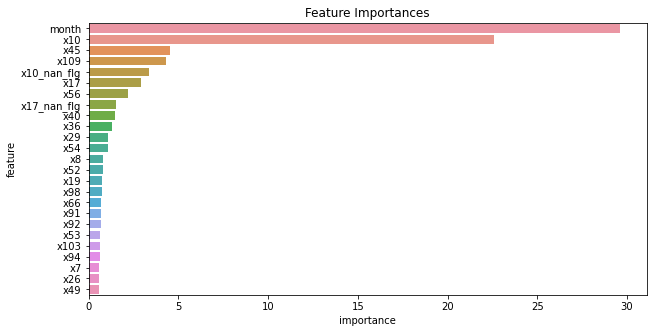

In [142]:
# Plot the feature importances using seaborn
#Only the most important 25 variables
plt.figure(figsize=(10,5))
sns.barplot(data=feature_importances.iloc[:25].sort_values(by='importance', ascending=False), x='importance', y='feature')
plt.title('Feature Importances')  
#plt.savefig("feature_importances.png")

In [79]:
key_list = y.index.get_level_values('key').unique()

In [32]:
#Separate model for each product 
Y_train_all = pd.DataFrame()
Y_test_all = pd.DataFrame()

for i in key_list: 
    print(i)
    X_t_train_p = X_t_train[X_t_train.index.get_level_values("key")==i]
    Y_t_train_p = Y_t_train[Y_t_train.index.get_level_values("key")==i]
    X_t_test_p = X_t_test[X_t_test.index.get_level_values("key")==i]
    Y_t_test_p = Y_t_test[Y_t_test.index.get_level_values("key")==i]
    mdl_e = CatBoostRegressor(n_estimators=30, boosting_type='Ordered',  min_child_samples=2, reg_lambda=0.5, subsample=0.8, 
                         max_depth=7, learning_rate=0.3, random_state=23, cat_features=['month'])
    mdl_e.fit(X_t_train_p, Y_t_train_p)
    prediction_train_p = mdl_e.predict(X_t_train_p)
    Y_trn_pred_p = Y_t_train_p.to_frame()
    Y_trn_pred_p['predicted'] = prediction_train_p
    Y_trn_pred_p['y_pred_diff'] = abs(Y_trn_pred_p['y'] - Y_trn_pred_p['predicted'])
    prediction_test_p = mdl_e.predict(X_t_test_p)
    Y_tst_pred_p = Y_t_test_p.to_frame()
    Y_tst_pred_p['predicted'] = prediction_test_p
    Y_tst_pred_p['y_pred_diff'] = abs(Y_tst_pred_p['y'] - Y_tst_pred_p['predicted'])
    Y_train_all = pd.concat([Y_train_all,Y_trn_pred_p], axis=0, join='outer')
    Y_test_all = pd.concat([Y_test_all,Y_tst_pred_p], axis=0, join='outer')
    

683
0:	learn: 1513.7685870	total: 165ms	remaining: 4.78s
1:	learn: 1318.4772972	total: 295ms	remaining: 4.13s
2:	learn: 1195.6903668	total: 457ms	remaining: 4.12s
3:	learn: 1084.4406568	total: 589ms	remaining: 3.83s
4:	learn: 910.1136352	total: 747ms	remaining: 3.74s
5:	learn: 773.6874388	total: 892ms	remaining: 3.57s
6:	learn: 706.1754973	total: 1.07s	remaining: 3.52s
7:	learn: 627.1804624	total: 1.22s	remaining: 3.35s
8:	learn: 579.4533601	total: 1.48s	remaining: 3.45s
9:	learn: 531.5783164	total: 1.67s	remaining: 3.34s
10:	learn: 486.1100748	total: 1.83s	remaining: 3.16s
11:	learn: 427.0445271	total: 1.99s	remaining: 2.98s
12:	learn: 390.7453861	total: 2.12s	remaining: 2.77s
13:	learn: 340.4409163	total: 2.27s	remaining: 2.6s
14:	learn: 313.0438516	total: 2.49s	remaining: 2.49s
15:	learn: 292.1955912	total: 2.64s	remaining: 2.31s
16:	learn: 275.0885386	total: 2.79s	remaining: 2.13s
17:	learn: 265.6826077	total: 2.92s	remaining: 1.95s
18:	learn: 260.5425760	total: 3.05s	remaining: 1.

7:	learn: 806.6574076	total: 996ms	remaining: 2.74s
8:	learn: 705.5344405	total: 1.13s	remaining: 2.63s
9:	learn: 645.0198837	total: 1.32s	remaining: 2.63s
10:	learn: 597.2478666	total: 1.47s	remaining: 2.54s
11:	learn: 569.6340865	total: 1.64s	remaining: 2.46s
12:	learn: 521.0981827	total: 1.77s	remaining: 2.31s
13:	learn: 490.5099849	total: 1.9s	remaining: 2.17s
14:	learn: 454.4619096	total: 2.06s	remaining: 2.06s
15:	learn: 428.5886585	total: 2.19s	remaining: 1.92s
16:	learn: 414.2990669	total: 2.32s	remaining: 1.78s
17:	learn: 358.5600486	total: 2.46s	remaining: 1.64s
18:	learn: 322.1906965	total: 2.58s	remaining: 1.5s
19:	learn: 312.9116433	total: 2.63s	remaining: 1.32s
20:	learn: 297.3603402	total: 2.76s	remaining: 1.18s
21:	learn: 286.7518514	total: 2.89s	remaining: 1.05s
22:	learn: 273.3286889	total: 3.02s	remaining: 920ms
23:	learn: 254.6423824	total: 3.15s	remaining: 787ms
24:	learn: 238.7538595	total: 3.28s	remaining: 657ms
25:	learn: 227.9697419	total: 3.41s	remaining: 525m

13:	learn: 257.1316964	total: 1.93s	remaining: 2.21s
14:	learn: 239.1970664	total: 2.07s	remaining: 2.07s
15:	learn: 225.6241018	total: 2.22s	remaining: 1.94s
16:	learn: 213.6047349	total: 2.37s	remaining: 1.81s
17:	learn: 198.8647372	total: 2.51s	remaining: 1.67s
18:	learn: 188.2002727	total: 2.65s	remaining: 1.53s
19:	learn: 181.8071552	total: 2.73s	remaining: 1.37s
20:	learn: 168.1445132	total: 2.87s	remaining: 1.23s
21:	learn: 165.9582776	total: 3.02s	remaining: 1.1s
22:	learn: 158.3597870	total: 3.15s	remaining: 960ms
23:	learn: 149.2471637	total: 3.3s	remaining: 825ms
24:	learn: 143.4026719	total: 3.45s	remaining: 689ms
25:	learn: 141.3315522	total: 3.63s	remaining: 559ms
26:	learn: 138.4287749	total: 3.8s	remaining: 422ms
27:	learn: 134.5004980	total: 3.93s	remaining: 281ms
28:	learn: 130.9468066	total: 4.06s	remaining: 140ms
29:	learn: 126.4696682	total: 4.2s	remaining: 0us
11438
0:	learn: 1898.4927613	total: 134ms	remaining: 3.89s
1:	learn: 1636.6971952	total: 261ms	remaining:

19:	learn: 435.7306568	total: 3.04s	remaining: 1.52s
20:	learn: 374.9384418	total: 3.23s	remaining: 1.39s
21:	learn: 361.7961685	total: 3.41s	remaining: 1.24s
22:	learn: 328.0259761	total: 3.6s	remaining: 1.1s
23:	learn: 292.4605203	total: 3.82s	remaining: 956ms
24:	learn: 268.3349482	total: 4.14s	remaining: 828ms
25:	learn: 253.7729181	total: 4.33s	remaining: 666ms
26:	learn: 248.0753838	total: 4.58s	remaining: 509ms
27:	learn: 245.5584136	total: 4.83s	remaining: 345ms
28:	learn: 237.5524049	total: 5.04s	remaining: 174ms
29:	learn: 226.7083663	total: 5.21s	remaining: 0us
16764
0:	learn: 1420.7852239	total: 135ms	remaining: 3.92s
1:	learn: 1210.3605701	total: 265ms	remaining: 3.71s
2:	learn: 1038.0038631	total: 413ms	remaining: 3.71s
3:	learn: 912.1069885	total: 554ms	remaining: 3.6s
4:	learn: 806.8089833	total: 705ms	remaining: 3.52s
5:	learn: 735.4414060	total: 834ms	remaining: 3.33s
6:	learn: 679.3593166	total: 968ms	remaining: 3.18s
7:	learn: 590.6835226	total: 1.1s	remaining: 3.03

25:	learn: 112.6942906	total: 3.62s	remaining: 557ms
26:	learn: 106.1684941	total: 3.76s	remaining: 418ms
27:	learn: 104.5615758	total: 3.96s	remaining: 283ms
28:	learn: 99.4022707	total: 4.11s	remaining: 142ms
29:	learn: 92.3829638	total: 4.32s	remaining: 0us
23155
0:	learn: 1531.9536261	total: 142ms	remaining: 4.12s
1:	learn: 1318.3300180	total: 218ms	remaining: 3.05s
2:	learn: 1141.9479309	total: 346ms	remaining: 3.11s
3:	learn: 963.2695909	total: 483ms	remaining: 3.14s
4:	learn: 829.7887068	total: 625ms	remaining: 3.13s
5:	learn: 753.0029396	total: 748ms	remaining: 2.99s
6:	learn: 653.9642243	total: 873ms	remaining: 2.87s
7:	learn: 596.2178524	total: 997ms	remaining: 2.74s
8:	learn: 538.4871523	total: 1.23s	remaining: 2.87s
9:	learn: 496.8888103	total: 1.45s	remaining: 2.89s
10:	learn: 444.9231739	total: 1.67s	remaining: 2.88s
11:	learn: 377.5009875	total: 1.8s	remaining: 2.7s
12:	learn: 352.0194750	total: 1.93s	remaining: 2.53s
13:	learn: 329.2143271	total: 2.06s	remaining: 2.36s


2:	learn: 1105.7835246	total: 385ms	remaining: 3.47s
3:	learn: 997.0202304	total: 515ms	remaining: 3.35s
4:	learn: 877.5754778	total: 645ms	remaining: 3.22s
5:	learn: 793.1543371	total: 791ms	remaining: 3.16s
6:	learn: 725.6482034	total: 934ms	remaining: 3.07s
7:	learn: 632.7704358	total: 1.07s	remaining: 2.95s
8:	learn: 599.9837433	total: 1.16s	remaining: 2.7s
9:	learn: 532.2486417	total: 1.3s	remaining: 2.59s
10:	learn: 493.1482162	total: 1.43s	remaining: 2.46s
11:	learn: 463.9236481	total: 1.55s	remaining: 2.33s
12:	learn: 437.9968969	total: 1.68s	remaining: 2.2s
13:	learn: 400.9111740	total: 1.82s	remaining: 2.08s
14:	learn: 375.5646875	total: 1.95s	remaining: 1.95s
15:	learn: 362.3290051	total: 2.03s	remaining: 1.77s
16:	learn: 349.5678533	total: 2.17s	remaining: 1.66s
17:	learn: 333.2613177	total: 2.33s	remaining: 1.55s
18:	learn: 322.1217270	total: 2.51s	remaining: 1.45s
19:	learn: 300.1084314	total: 2.73s	remaining: 1.36s
20:	learn: 294.6730291	total: 2.87s	remaining: 1.23s
21:

8:	learn: 530.1450720	total: 1.17s	remaining: 2.73s
9:	learn: 472.5176011	total: 1.3s	remaining: 2.6s
10:	learn: 436.0294881	total: 1.43s	remaining: 2.48s
11:	learn: 410.0351839	total: 1.51s	remaining: 2.27s
12:	learn: 382.6481969	total: 1.65s	remaining: 2.15s
13:	learn: 336.0513377	total: 1.78s	remaining: 2.04s
14:	learn: 296.8274598	total: 1.93s	remaining: 1.93s
15:	learn: 289.9693862	total: 2.06s	remaining: 1.8s
16:	learn: 258.1717564	total: 2.2s	remaining: 1.68s
17:	learn: 246.3170015	total: 2.33s	remaining: 1.55s
18:	learn: 237.5586594	total: 2.46s	remaining: 1.42s
19:	learn: 236.3568471	total: 2.49s	remaining: 1.25s
20:	learn: 231.9733030	total: 2.62s	remaining: 1.12s
21:	learn: 228.4916354	total: 2.75s	remaining: 1s
22:	learn: 212.4586849	total: 2.88s	remaining: 877ms
23:	learn: 205.9087525	total: 3.02s	remaining: 754ms
24:	learn: 204.4610076	total: 3.15s	remaining: 629ms
25:	learn: 196.0373082	total: 3.28s	remaining: 504ms
26:	learn: 187.9998736	total: 3.41s	remaining: 379ms
27

14:	learn: 358.3059680	total: 1.98s	remaining: 1.98s
15:	learn: 333.0519307	total: 2.12s	remaining: 1.86s
16:	learn: 311.3558463	total: 2.27s	remaining: 1.74s
17:	learn: 295.3801858	total: 2.4s	remaining: 1.6s
18:	learn: 284.3767167	total: 2.54s	remaining: 1.47s
19:	learn: 276.2970689	total: 2.66s	remaining: 1.33s
20:	learn: 257.8603478	total: 2.8s	remaining: 1.2s
21:	learn: 251.7930897	total: 2.95s	remaining: 1.07s
22:	learn: 231.4978714	total: 3.1s	remaining: 943ms
23:	learn: 214.8665416	total: 3.25s	remaining: 811ms
24:	learn: 208.1597376	total: 3.39s	remaining: 678ms
25:	learn: 205.3264612	total: 3.52s	remaining: 542ms
26:	learn: 203.0677663	total: 3.66s	remaining: 407ms
27:	learn: 197.2607259	total: 3.8s	remaining: 272ms
28:	learn: 194.8776102	total: 3.94s	remaining: 136ms
29:	learn: 178.4504445	total: 4.09s	remaining: 0us
52602
0:	learn: 1217.2888051	total: 136ms	remaining: 3.94s
1:	learn: 1040.3175799	total: 268ms	remaining: 3.75s
2:	learn: 858.7567485	total: 402ms	remaining: 3.

21:	learn: 311.1835294	total: 2.89s	remaining: 1.05s
22:	learn: 284.2733983	total: 3.03s	remaining: 921ms
23:	learn: 274.4499216	total: 3.16s	remaining: 791ms
24:	learn: 264.0076013	total: 3.3s	remaining: 660ms
25:	learn: 257.2522134	total: 3.44s	remaining: 529ms
26:	learn: 247.4365296	total: 3.58s	remaining: 398ms
27:	learn: 240.1805123	total: 3.73s	remaining: 266ms
28:	learn: 236.4487495	total: 3.87s	remaining: 134ms
29:	learn: 229.1896174	total: 4.01s	remaining: 0us
61305
0:	learn: 1288.4749367	total: 143ms	remaining: 4.16s
1:	learn: 1087.2420703	total: 276ms	remaining: 3.86s
2:	learn: 935.8011949	total: 422ms	remaining: 3.8s
3:	learn: 805.6991731	total: 613ms	remaining: 3.98s
4:	learn: 702.1159308	total: 769ms	remaining: 3.85s
5:	learn: 632.6311461	total: 899ms	remaining: 3.6s
6:	learn: 570.5183446	total: 1.02s	remaining: 3.37s
7:	learn: 543.8855914	total: 1.06s	remaining: 2.91s
8:	learn: 510.0455378	total: 1.2s	remaining: 2.79s
9:	learn: 447.8775393	total: 1.32s	remaining: 2.65s
1

27:	learn: 286.1119855	total: 4.02s	remaining: 287ms
28:	learn: 274.8008316	total: 4.17s	remaining: 144ms
29:	learn: 259.4048124	total: 4.33s	remaining: 0us
70444
0:	learn: 2131.5804438	total: 136ms	remaining: 3.95s
1:	learn: 1825.6610478	total: 273ms	remaining: 3.83s
2:	learn: 1608.8620220	total: 419ms	remaining: 3.77s
3:	learn: 1354.9034753	total: 554ms	remaining: 3.6s
4:	learn: 1252.6236846	total: 647ms	remaining: 3.23s
5:	learn: 1127.3681846	total: 772ms	remaining: 3.09s
6:	learn: 1017.4868510	total: 906ms	remaining: 2.98s
7:	learn: 903.1318066	total: 1.03s	remaining: 2.84s
8:	learn: 813.4894132	total: 1.16s	remaining: 2.7s
9:	learn: 775.9239840	total: 1.3s	remaining: 2.59s
10:	learn: 713.4879109	total: 1.44s	remaining: 2.48s
11:	learn: 671.1955802	total: 1.57s	remaining: 2.36s
12:	learn: 627.6901118	total: 1.76s	remaining: 2.3s
13:	learn: 609.9056618	total: 1.94s	remaining: 2.22s
14:	learn: 584.3151234	total: 2s	remaining: 2s
15:	learn: 562.6360341	total: 2.18s	remaining: 1.91s
16

4:	learn: 1116.4483102	total: 701ms	remaining: 3.5s
5:	learn: 948.4419847	total: 881ms	remaining: 3.52s
6:	learn: 882.6539890	total: 1.05s	remaining: 3.44s
7:	learn: 755.1662240	total: 1.2s	remaining: 3.29s
8:	learn: 718.8729583	total: 1.33s	remaining: 3.1s
9:	learn: 639.5098285	total: 1.48s	remaining: 2.96s
10:	learn: 590.9208549	total: 1.64s	remaining: 2.83s
11:	learn: 543.5459716	total: 1.81s	remaining: 2.71s
12:	learn: 523.6847166	total: 1.94s	remaining: 2.54s
13:	learn: 501.4079189	total: 2.09s	remaining: 2.38s
14:	learn: 487.7547917	total: 2.26s	remaining: 2.26s
15:	learn: 451.0311502	total: 2.4s	remaining: 2.1s
16:	learn: 445.3145901	total: 2.54s	remaining: 1.94s
17:	learn: 427.3209149	total: 2.63s	remaining: 1.75s
18:	learn: 397.9445833	total: 2.76s	remaining: 1.6s
19:	learn: 389.0548778	total: 2.92s	remaining: 1.46s
20:	learn: 358.4274403	total: 3.06s	remaining: 1.31s
21:	learn: 344.5969968	total: 3.22s	remaining: 1.17s
22:	learn: 340.2025809	total: 3.29s	remaining: 1s
23:	lea

10:	learn: 544.9523712	total: 1.46s	remaining: 2.53s
11:	learn: 471.6043671	total: 1.59s	remaining: 2.39s
12:	learn: 427.1717283	total: 1.73s	remaining: 2.27s
13:	learn: 388.2958915	total: 1.94s	remaining: 2.21s
14:	learn: 378.0021178	total: 2.11s	remaining: 2.11s
15:	learn: 362.3614976	total: 2.25s	remaining: 1.97s
16:	learn: 340.5795928	total: 2.39s	remaining: 1.83s
17:	learn: 330.4553465	total: 2.52s	remaining: 1.68s
18:	learn: 310.4481458	total: 2.67s	remaining: 1.55s
19:	learn: 295.7527133	total: 2.8s	remaining: 1.4s
20:	learn: 282.0471025	total: 2.93s	remaining: 1.25s
21:	learn: 259.7589838	total: 3.06s	remaining: 1.11s
22:	learn: 243.9083877	total: 3.19s	remaining: 972ms
23:	learn: 237.4252510	total: 3.32s	remaining: 829ms
24:	learn: 229.5518185	total: 3.45s	remaining: 689ms
25:	learn: 215.6702925	total: 3.6s	remaining: 554ms
26:	learn: 207.8752388	total: 3.74s	remaining: 416ms
27:	learn: 194.5087324	total: 3.88s	remaining: 277ms
28:	learn: 183.1444986	total: 4.02s	remaining: 13

17:	learn: 421.3500745	total: 2.37s	remaining: 1.58s
18:	learn: 397.7443257	total: 2.54s	remaining: 1.47s
19:	learn: 384.6780624	total: 2.71s	remaining: 1.36s
20:	learn: 372.4952689	total: 2.86s	remaining: 1.22s
21:	learn: 346.3550626	total: 2.99s	remaining: 1.09s
22:	learn: 333.6558301	total: 3.13s	remaining: 954ms
23:	learn: 330.6615346	total: 3.27s	remaining: 818ms
24:	learn: 319.8712387	total: 3.41s	remaining: 682ms
25:	learn: 302.8162585	total: 3.55s	remaining: 546ms
26:	learn: 298.1832549	total: 3.69s	remaining: 410ms
27:	learn: 285.3766923	total: 3.83s	remaining: 274ms
28:	learn: 280.5039463	total: 3.97s	remaining: 137ms
29:	learn: 267.0887865	total: 4.1s	remaining: 0us
83838
0:	learn: 2050.9596204	total: 118ms	remaining: 3.43s
1:	learn: 1707.1628973	total: 226ms	remaining: 3.16s
2:	learn: 1478.7635289	total: 335ms	remaining: 3.02s
3:	learn: 1252.5395618	total: 451ms	remaining: 2.93s
4:	learn: 1040.8251809	total: 605ms	remaining: 3.03s
5:	learn: 937.3380116	total: 725ms	remainin

23:	learn: 247.0670630	total: 3.74s	remaining: 934ms
24:	learn: 229.0915073	total: 4.03s	remaining: 806ms
25:	learn: 225.3545140	total: 4.19s	remaining: 645ms
26:	learn: 220.5742122	total: 4.36s	remaining: 484ms
27:	learn: 206.2047936	total: 4.5s	remaining: 322ms
28:	learn: 202.4355511	total: 4.71s	remaining: 162ms
29:	learn: 199.2378481	total: 4.85s	remaining: 0us
86537
0:	learn: 2220.1965267	total: 146ms	remaining: 4.25s
1:	learn: 1939.0921039	total: 268ms	remaining: 3.75s
2:	learn: 1659.9682438	total: 416ms	remaining: 3.74s
3:	learn: 1516.3819058	total: 549ms	remaining: 3.57s
4:	learn: 1381.7927340	total: 697ms	remaining: 3.48s
5:	learn: 1170.9350023	total: 827ms	remaining: 3.31s
6:	learn: 1148.2881947	total: 847ms	remaining: 2.78s
7:	learn: 1087.2013252	total: 1.01s	remaining: 2.78s
8:	learn: 975.1743178	total: 1.13s	remaining: 2.65s
9:	learn: 885.3972064	total: 1.27s	remaining: 2.53s
10:	learn: 818.8666393	total: 1.39s	remaining: 2.4s
11:	learn: 729.5429416	total: 1.55s	remaining:

29:	learn: 217.1171609	total: 3.06s	remaining: 0us
97021
0:	learn: 1654.2073732	total: 162ms	remaining: 4.7s
1:	learn: 1446.9084896	total: 318ms	remaining: 4.45s
2:	learn: 1288.5679746	total: 486ms	remaining: 4.38s
3:	learn: 1097.7994018	total: 645ms	remaining: 4.19s
4:	learn: 1000.8455348	total: 829ms	remaining: 4.14s
5:	learn: 850.2290222	total: 996ms	remaining: 3.98s
6:	learn: 804.0270028	total: 1.16s	remaining: 3.81s
7:	learn: 735.1819289	total: 1.31s	remaining: 3.62s
8:	learn: 668.7059281	total: 1.49s	remaining: 3.47s
9:	learn: 586.1267989	total: 1.65s	remaining: 3.29s
10:	learn: 532.6444995	total: 1.81s	remaining: 3.13s
11:	learn: 504.4260023	total: 1.97s	remaining: 2.96s
12:	learn: 444.9214951	total: 2.13s	remaining: 2.79s
13:	learn: 407.8041334	total: 2.29s	remaining: 2.62s
14:	learn: 386.0730905	total: 2.45s	remaining: 2.45s
15:	learn: 368.0980545	total: 2.61s	remaining: 2.28s
16:	learn: 341.2374676	total: 2.78s	remaining: 2.12s
17:	learn: 331.6174614	total: 2.93s	remaining: 1

7:	learn: 806.9880703	total: 749ms	remaining: 2.06s
8:	learn: 711.6604623	total: 846ms	remaining: 1.97s
9:	learn: 678.1230177	total: 937ms	remaining: 1.87s
10:	learn: 580.1255896	total: 1.04s	remaining: 1.79s
11:	learn: 525.8695262	total: 1.13s	remaining: 1.69s
12:	learn: 479.8392682	total: 1.23s	remaining: 1.61s
13:	learn: 425.7577756	total: 1.32s	remaining: 1.51s
14:	learn: 392.1537673	total: 1.43s	remaining: 1.43s
15:	learn: 368.8589119	total: 1.52s	remaining: 1.33s
16:	learn: 326.9880388	total: 1.61s	remaining: 1.23s
17:	learn: 317.2745149	total: 1.71s	remaining: 1.14s
18:	learn: 308.0606625	total: 1.8s	remaining: 1.04s
19:	learn: 290.8338974	total: 1.9s	remaining: 951ms
20:	learn: 277.4143518	total: 1.99s	remaining: 854ms
21:	learn: 266.2553341	total: 2.09s	remaining: 760ms
22:	learn: 253.8832624	total: 2.18s	remaining: 664ms
23:	learn: 247.1019231	total: 2.25s	remaining: 562ms
24:	learn: 233.7481850	total: 2.34s	remaining: 468ms
25:	learn: 218.1457732	total: 2.44s	remaining: 375m

14:	learn: 431.6148552	total: 1.47s	remaining: 1.47s
15:	learn: 387.7909026	total: 1.57s	remaining: 1.37s
16:	learn: 373.8314266	total: 1.67s	remaining: 1.28s
17:	learn: 350.2697552	total: 1.77s	remaining: 1.18s
18:	learn: 316.5921410	total: 1.87s	remaining: 1.08s
19:	learn: 286.8781328	total: 1.97s	remaining: 986ms
20:	learn: 275.9231536	total: 2.08s	remaining: 894ms
21:	learn: 261.5642682	total: 2.19s	remaining: 796ms
22:	learn: 248.0132773	total: 2.29s	remaining: 697ms
23:	learn: 234.7383617	total: 2.4s	remaining: 601ms
24:	learn: 215.1466427	total: 2.5s	remaining: 501ms
25:	learn: 200.3222358	total: 2.6s	remaining: 400ms
26:	learn: 193.8429987	total: 2.7s	remaining: 300ms
27:	learn: 188.0194606	total: 2.8s	remaining: 200ms
28:	learn: 172.6480966	total: 2.9s	remaining: 99.9ms
29:	learn: 156.7648206	total: 3s	remaining: 0us
23001
0:	learn: 1549.6820665	total: 103ms	remaining: 2.99s
1:	learn: 1322.6646382	total: 198ms	remaining: 2.78s
2:	learn: 1219.4097512	total: 292ms	remaining: 2.6

22:	learn: 336.4499429	total: 2.26s	remaining: 689ms
23:	learn: 320.4151161	total: 2.36s	remaining: 590ms
24:	learn: 313.4551083	total: 2.46s	remaining: 492ms
25:	learn: 296.7406550	total: 2.56s	remaining: 393ms
26:	learn: 276.9541290	total: 2.66s	remaining: 296ms
27:	learn: 253.9720823	total: 2.75s	remaining: 197ms
28:	learn: 236.8731935	total: 2.86s	remaining: 98.6ms
29:	learn: 223.1936391	total: 2.96s	remaining: 0us
59676
0:	learn: 1848.8940898	total: 103ms	remaining: 2.97s
1:	learn: 1720.9345587	total: 202ms	remaining: 2.83s
2:	learn: 1583.2613969	total: 298ms	remaining: 2.68s
3:	learn: 1324.8867185	total: 398ms	remaining: 2.59s
4:	learn: 1125.6712799	total: 493ms	remaining: 2.46s
5:	learn: 1038.9108303	total: 594ms	remaining: 2.37s
6:	learn: 936.9976975	total: 698ms	remaining: 2.29s
7:	learn: 794.1260031	total: 799ms	remaining: 2.2s
8:	learn: 687.9902078	total: 893ms	remaining: 2.08s
9:	learn: 586.5393214	total: 991ms	remaining: 1.98s
10:	learn: 536.6809366	total: 1.08s	remaining:

29:	learn: 247.0074042	total: 3.42s	remaining: 0us
74703
0:	learn: 1685.7027383	total: 108ms	remaining: 3.12s
1:	learn: 1429.8673947	total: 210ms	remaining: 2.93s
2:	learn: 1187.5789250	total: 309ms	remaining: 2.78s
3:	learn: 1014.5860619	total: 417ms	remaining: 2.71s
4:	learn: 855.3118779	total: 519ms	remaining: 2.6s
5:	learn: 744.8302801	total: 629ms	remaining: 2.52s
6:	learn: 655.5733902	total: 735ms	remaining: 2.41s
7:	learn: 551.7756963	total: 837ms	remaining: 2.3s
8:	learn: 491.9805408	total: 940ms	remaining: 2.19s
9:	learn: 422.0212412	total: 1.05s	remaining: 2.09s
10:	learn: 408.2668262	total: 1.16s	remaining: 2.01s
11:	learn: 380.1601779	total: 1.26s	remaining: 1.9s
12:	learn: 340.6426319	total: 1.37s	remaining: 1.79s
13:	learn: 326.0711894	total: 1.42s	remaining: 1.62s
14:	learn: 299.0350344	total: 1.52s	remaining: 1.52s
15:	learn: 276.4939630	total: 1.63s	remaining: 1.43s
16:	learn: 242.1620492	total: 1.73s	remaining: 1.32s
17:	learn: 219.8744102	total: 1.84s	remaining: 1.23

5:	learn: 745.2784095	total: 1.09s	remaining: 4.37s
6:	learn: 639.2875578	total: 1.25s	remaining: 4.11s
7:	learn: 576.4019666	total: 1.42s	remaining: 3.91s
8:	learn: 532.3261154	total: 1.61s	remaining: 3.75s
9:	learn: 476.4991313	total: 1.76s	remaining: 3.53s
10:	learn: 422.9290513	total: 1.97s	remaining: 3.39s
11:	learn: 375.5912887	total: 2.1s	remaining: 3.15s
12:	learn: 306.5064565	total: 2.23s	remaining: 2.92s
13:	learn: 288.6309705	total: 2.36s	remaining: 2.69s
14:	learn: 280.9141142	total: 2.5s	remaining: 2.5s
15:	learn: 270.3490250	total: 2.54s	remaining: 2.23s
16:	learn: 239.4796262	total: 2.68s	remaining: 2.05s
17:	learn: 224.8675820	total: 2.83s	remaining: 1.88s
18:	learn: 210.8761671	total: 2.97s	remaining: 1.72s
19:	learn: 199.7772996	total: 3.02s	remaining: 1.51s
20:	learn: 189.4133099	total: 3.15s	remaining: 1.35s
21:	learn: 179.2482922	total: 3.29s	remaining: 1.2s
22:	learn: 165.8952091	total: 3.44s	remaining: 1.04s
23:	learn: 160.5163215	total: 3.6s	remaining: 899ms
24:

11:	learn: 214.7862369	total: 1.2s	remaining: 1.8s
12:	learn: 198.9313645	total: 1.31s	remaining: 1.71s
13:	learn: 177.2513754	total: 1.41s	remaining: 1.61s
14:	learn: 166.3143909	total: 1.51s	remaining: 1.51s
15:	learn: 151.0977484	total: 1.61s	remaining: 1.41s
16:	learn: 144.1577110	total: 1.72s	remaining: 1.31s
17:	learn: 141.3725970	total: 1.82s	remaining: 1.21s
18:	learn: 131.5670129	total: 1.91s	remaining: 1.11s
19:	learn: 121.7092799	total: 2.01s	remaining: 1s
20:	learn: 114.2175418	total: 2.11s	remaining: 906ms
21:	learn: 107.4725865	total: 2.21s	remaining: 802ms
22:	learn: 102.2231354	total: 2.31s	remaining: 703ms
23:	learn: 99.4259911	total: 2.41s	remaining: 602ms
24:	learn: 95.9185777	total: 2.51s	remaining: 502ms
25:	learn: 87.7569994	total: 2.6s	remaining: 400ms
26:	learn: 86.6562219	total: 2.71s	remaining: 301ms
27:	learn: 83.9345800	total: 2.8s	remaining: 200ms
28:	learn: 80.2343825	total: 2.9s	remaining: 100ms
29:	learn: 77.7474706	total: 3s	remaining: 0us
16288
0:	lear

19:	learn: 331.9884192	total: 1.14s	remaining: 572ms
20:	learn: 330.1959051	total: 1.21s	remaining: 519ms
21:	learn: 303.2617234	total: 1.28s	remaining: 465ms
22:	learn: 301.3078955	total: 1.34s	remaining: 410ms
23:	learn: 299.8150042	total: 1.42s	remaining: 355ms
24:	learn: 280.1941331	total: 1.49s	remaining: 298ms
25:	learn: 264.4778494	total: 1.52s	remaining: 234ms
26:	learn: 262.0315801	total: 1.59s	remaining: 177ms
27:	learn: 252.2430364	total: 1.64s	remaining: 117ms
28:	learn: 245.2531502	total: 1.71s	remaining: 58.9ms
29:	learn: 228.6041030	total: 1.75s	remaining: 0us
39943
0:	learn: 1550.1273667	total: 78.3ms	remaining: 2.27s
1:	learn: 1305.2916576	total: 115ms	remaining: 1.62s
2:	learn: 1005.2780868	total: 337ms	remaining: 3.03s
3:	learn: 831.3745082	total: 418ms	remaining: 2.72s
4:	learn: 665.1889135	total: 496ms	remaining: 2.48s
5:	learn: 571.5458016	total: 523ms	remaining: 2.09s
6:	learn: 549.8119398	total: 560ms	remaining: 1.84s
7:	learn: 462.7547566	total: 637ms	remaining

25:	learn: 128.8460526	total: 1.46s	remaining: 225ms
26:	learn: 124.7371018	total: 1.52s	remaining: 170ms
27:	learn: 119.7270764	total: 1.59s	remaining: 113ms
28:	learn: 119.1394293	total: 1.62s	remaining: 55.8ms
29:	learn: 116.3154347	total: 1.66s	remaining: 0us
93876
0:	learn: 2609.8112977	total: 63.7ms	remaining: 1.85s
1:	learn: 2097.8563273	total: 132ms	remaining: 1.85s
2:	learn: 1658.9407966	total: 193ms	remaining: 1.74s
3:	learn: 1371.6320218	total: 255ms	remaining: 1.66s
4:	learn: 1139.8450130	total: 318ms	remaining: 1.59s
5:	learn: 942.7881249	total: 389ms	remaining: 1.55s
6:	learn: 807.0769155	total: 451ms	remaining: 1.48s
7:	learn: 682.8050229	total: 494ms	remaining: 1.36s
8:	learn: 552.9451199	total: 565ms	remaining: 1.32s
9:	learn: 452.4968094	total: 631ms	remaining: 1.26s
10:	learn: 375.3638721	total: 706ms	remaining: 1.22s
11:	learn: 304.1523700	total: 770ms	remaining: 1.15s
12:	learn: 252.4764742	total: 819ms	remaining: 1.07s
13:	learn: 231.2793396	total: 853ms	remaining

In [33]:
WMAPE_trn = (sum(Y_train_all['y_pred_diff'])/sum(Y_train_all['y']))*100
WMAPE_tst = (sum(Y_test_all['y_pred_diff'])/sum(Y_test_all['y']))*100
print("The weighted mean absolute percent error (WMAPE) for ensemble of models on train set: ",  WMAPE_trn)
print("The weighted mean absolute percent error (WMAPE) for ensemble of models on test set: ",  WMAPE_tst)

The weighted mean absolute percent error (WMAPE) for ensemble of models on train set:  4.201301016721455
The weighted mean absolute percent error (WMAPE) for ensemble of models on test set:  37.98981542567586


In [ ]:
#month into dummy variables

In [80]:
months_X_t_train = pd.get_dummies(X_t_train.month, prefix='month_')
months_X_t_test = pd.get_dummies(X_t_test.month, prefix='month_')

In [81]:
X_t_train = X_t_train.drop(['month'], axis=1)
X_t_test = X_t_test.drop(['month'], axis=1)

In [82]:
X_t_train = pd.merge(X_t_train, months_X_t_train, how='left', on=['key', 'date'] )
X_t_test = pd.merge(X_t_test, months_X_t_test, how='left', on=['key', 'date'] )

In [83]:
lr = LinearRegression()
lr.fit(X_t_train, Y_t_train)

LinearRegression()

In [173]:
#from sklearn.metrics import mean_absolute_percentage_error

In [84]:
#results for Linear Regression
get_WMAPE(lr, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  LinearRegression() on train set:  43.56092195049462
The weighted mean absolute percent error (WMAPE) for model  LinearRegression() on test set:  37.54896231697334


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr3 = RandomForestRegressor(max_depth=3, random_state=0)
regr3.fit(X_t_train, Y_t_train)
get_WMAPE(regr3, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=3, random_state=0) on train set:  46.74535534130787
The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=3, random_state=0) on test set:  39.90840858559829


In [86]:
regr4 = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=50,
criterion='mse',
min_samples_split=2,
min_samples_leaf=2,
max_leaf_nodes=None,
bootstrap=True,
oob_score=True,
n_jobs=None,
#verbose=2,
warm_start=False)
regr4.fit(X_t_train, Y_t_train)
get_WMAPE(regr4, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=50,
                      oob_score=True, random_state=0) on train set:  45.2862841706304
The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=50,
                      oob_score=True, random_state=0) on test set:  38.71566562574469


In [87]:
from sklearn.ensemble import ExtraTreesRegressor
etr1 = ExtraTreesRegressor(n_estimators=50, random_state=0, bootstrap=False, max_depth=8, min_samples_split=2, min_samples_leaf=3 )
etr1.fit(X_t_train, Y_t_train)
get_WMAPE(etr1, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  ExtraTreesRegressor(max_depth=8, min_samples_leaf=3, n_estimators=50,
                    random_state=0) on train set:  41.59163069006468
The weighted mean absolute percent error (WMAPE) for model  ExtraTreesRegressor(max_depth=8, min_samples_leaf=3, n_estimators=50,
                    random_state=0) on test set:  37.3630684229805


In [88]:
#import xgboost
from xgboost import XGBRegressor 
xgb = XGBRegressor(max_depth=6, n_estimators=50, colsample_bytree=0.4,
                 gamma=1,                 
                 learning_rate=0.07,
                 min_child_weight=1.5 )
xgb.fit(X_t_train, Y_t_train)
get_WMAPE(xgb, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) on train set:  37.30085981096424
The weighted mean absolute percent error (WMAPE) for model  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=6,
     

In [76]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#fit_params = {'eval_metric': 'rmse', 'nthread': 4,  'eval_set': [(X_t_test, Y_t_test)]}
mdl = XGBRegressor(eval_metric = 'rmse',
        nthread = 4,  verbosity=3  )
                  
param_grid = {
    'max_depth': [2,3,4,5,6], 
    'eta': [0.05, 0.1, 0.3],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0], 
    'colsample_bytree': [ 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 
    'gamma': [0, 0.25, 0.5, 1.0, 2.0], 
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 
    'n_estimators': [25, 40, 50,75, 100]}

rs_mdl = RandomizedSearchCV(mdl, param_grid, n_iter=30, cv=2, random_state=42)
rs_mdl.fit(X_t_train, Y_t_train, eval_set=[(X_t_test, Y_t_test)])
y_pred = rs_mdl.predict(X_t_test)

best_score = rs_mdl.best_score_
best_params = rs_mdl.best_params_
rs_mdl.cv_results_

print(best_score)
print(rs_mdl.best_score_)



for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

[12:42:23] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:42:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-rmse:4089.96313
[12:42:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-rmse:3536.40601
[12:42:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-rmse:3118.81445
[12:42:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-rmse:2769.03735
[12:42:24] INFO: C:/Users/Administrator/workspace/xgboost-win

[12:42:28] ======== Monitor: Learner ========
[12:42:28] Configure: 0s, 1 calls @ 0us

[12:42:28] EvalOneIter: 0.118285s, 40 calls @ 118285us

[12:42:28] GetGradient: 0.023134s, 40 calls @ 23134us

[12:42:28] PredictRaw: 0.242156s, 40 calls @ 242156us

[12:42:28] UpdateOneIter: 3.85602s, 40 calls @ 3856022us

[12:42:28] ======== Monitor: GBTree ========
[12:42:28] BoostNewTrees: 3.75711s, 40 calls @ 3757107us

[12:42:28] CommitModel: 0.000135s, 40 calls @ 135us

[12:42:28] ======== Monitor: TreePruner ========
[12:42:28] PrunerUpdate: 0.087075s, 40 calls @ 87075us

[12:42:28] ======== Monitor: Learner ========
[12:42:28] Configure: 0.001878s, 1 calls @ 1878us

[12:42:28] ======== Monitor: GBTree ========
[12:42:28] ======== Monitor: TreePruner ========
[12:42:28] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:42:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree 

[12:42:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[31]	validation_0-rmse:3864.88232
[12:42:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[32]	validation_0-rmse:3840.21143
[12:42:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[33]	validation_0-rmse:3816.08545
[12:42:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[34]	validation_0-rmse:3791.86011
[12:42:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[35]	vali

[12:42:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[71]	validation_0-rmse:3085.53101
[12:42:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[72]	validation_0-rmse:3070.41113
[12:42:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[73]	validation_0-rmse:3055.99023
[12:42:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[74]	validation_0-rmse:3041.42236
[12:42:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[75]	vali

[12:42:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	validation_0-rmse:4604.08936
[12:42:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[8]	validation_0-rmse:4579.25195
[12:42:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[9]	validation_0-rmse:4554.77978
[12:42:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	validation_0-rmse:4530.56397
[12:42:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[11]	validat

[12:42:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[47]	validation_0-rmse:3794.24170
[12:42:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[48]	validation_0-rmse:3778.50171
[12:42:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[49]	validation_0-rmse:3762.82983
[12:42:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[50]	validation_0-rmse:3747.17554
[12:42:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[51]	vali

[12:42:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[87]	validation_0-rmse:3276.43652
[12:42:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[88]	validation_0-rmse:3266.12598
[12:42:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[89]	validation_0-rmse:3256.00781
[12:42:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[90]	validation_0-rmse:3245.81909
[12:42:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[91]	vali

[12:42:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[23]	validation_0-rmse:4009.77295
[12:42:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[24]	validation_0-rmse:3981.19727
[12:42:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[25]	validation_0-rmse:3952.97412
[12:42:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[26]	validation_0-rmse:3925.11621
[12:42:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[27]	vali

[12:42:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[48]	validation_0-rmse:3730.90649
[12:42:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[49]	validation_0-rmse:3714.20923
[12:42:56] ======== Monitor: Learner ========
[12:42:56] Configure: 0.002124s, 1 calls @ 2124us

[12:42:56] EvalOneIter: 0.104108s, 50 calls @ 104108us

[12:42:56] GetGradient: 0.024263s, 50 calls @ 24263us

[12:42:56] PredictRaw: 0.286195s, 50 calls @ 286195us

[12:42:56] UpdateOneIter: 2.95952s, 50 calls @ 2959517us

[12:42:56] ======== Monitor: GBTree ========
[12:42:56] BoostNewTrees: 2.6423s, 50 calls @ 2642296us

[12:42:56] CommitModel: 0.000149s, 50 calls @ 149us

[12:42:56] ======== Monitor: TreePruner ========
[12:42:56] PrunerUpdate: 0.091052s, 50 calls @ 91052us

[12:42:56

[12:42:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[34]	validation_0-rmse:3687.03027
[12:42:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[35]	validation_0-rmse:3662.34253
[12:42:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[36]	validation_0-rmse:3637.04150
[12:42:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[37]	validation_0-rmse:3612.26294
[12:42:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[38]	vali

[12:43:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[74]	validation_0-rmse:2877.06396
[12:43:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[75]	validation_0-rmse:2861.64233
[12:43:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[76]	validation_0-rmse:2846.51611
[12:43:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[77]	validation_0-rmse:2830.25781
[12:43:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[78]	vali

[12:43:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[10]	validation_0-rmse:4513.71143
[12:43:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[11]	validation_0-rmse:4487.76270
[12:43:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	validation_0-rmse:4462.42334
[12:43:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	validation_0-rmse:4437.83350
[12:43:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14]	vali

[12:43:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[50]	validation_0-rmse:3682.09985
[12:43:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[51]	validation_0-rmse:3665.90894
[12:43:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[52]	validation_0-rmse:3650.00879
[12:43:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[53]	validation_0-rmse:3633.98608
[12:43:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[54]	vali

[12:43:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[90]	validation_0-rmse:3158.47314
[12:43:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[91]	validation_0-rmse:3148.24658
[12:43:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[92]	validation_0-rmse:3138.50146
[12:43:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[93]	validation_0-rmse:3128.38452
[12:43:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[94]	vali

[12:43:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[65]	validation_0-rmse:4580.33496
[12:43:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[66]	validation_0-rmse:4576.97998
[12:43:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[67]	validation_0-rmse:4573.70508
[12:43:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=5
[68]	validation_0-rmse:4570.02490
[12:43:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[69]	vali

[12:43:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:4807.43848
[12:43:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:4804.70068
[12:43:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:4802.00586
[12:43:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-rmse:4799.28516
[12:43:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 2 pruned nodes, max_depth=5
[5]	validatio

[12:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[42]	validation_0-rmse:4695.50977
[12:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[43]	validation_0-rmse:4692.87207
[12:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[44]	validation_0-rmse:4690.15625
[12:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[45]	validation_0-rmse:4687.51855
[12:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[46]	vali

[12:43:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[82]	validation_0-rmse:4590.96045
[12:43:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[83]	validation_0-rmse:4588.35596
[12:43:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[84]	validation_0-rmse:4585.78955
[12:43:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[85]	validation_0-rmse:4583.19629
[12:43:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[86]	vali

[12:43:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	validation_0-rmse:3518.70898
[12:43:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	validation_0-rmse:3260.27783
[12:43:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	validation_0-rmse:3060.96265
[12:43:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	validation_0-rmse:2897.47827
[12:43:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	validatio

[12:43:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[43]	validation_0-rmse:2288.03125
[12:43:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[44]	validation_0-rmse:2285.52344
[12:43:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[45]	validation_0-rmse:2288.38599
[12:43:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[46]	validation_0-rmse:2290.29932
[12:43:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[47]	vali

[28]	validation_0-rmse:1885.99500
[12:43:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[29]	validation_0-rmse:1882.30456
[12:43:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[30]	validation_0-rmse:1882.89392
[12:43:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[31]	validation_0-rmse:1880.08997
[12:43:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[32]	validation_0-rmse:1877.78662
[12:43:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned

[12:43:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15]	validation_0-rmse:2396.04858
[12:43:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[16]	validation_0-rmse:2379.78467
[12:43:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17]	validation_0-rmse:2362.03467
[12:43:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[18]	validation_0-rmse:2355.29126
[12:43:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19]	validatio

[12:43:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:4090.22803
[12:43:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:3794.89380
[12:43:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:3531.95606
[12:43:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-rmse:3302.81104
[12:43:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[5]	validatio

[12:43:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[27]	validation_0-rmse:2376.58789
[12:43:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[28]	validation_0-rmse:2365.72852
[12:43:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[29]	validation_0-rmse:2359.08984
[12:43:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[30]	validation_0-rmse:2351.97070
[12:43:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[31]	vali

[12:43:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[13]	validation_0-rmse:1903.83716
[12:43:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[14]	validation_0-rmse:1891.79089
[12:43:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[15]	validation_0-rmse:1881.11694
[12:43:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[16]	validation_0-rmse:1874.22766
[12:43:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[17]	vali

[12:43:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[9]	validation_0-rmse:2520.97144
[12:43:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[10]	validation_0-rmse:2476.31714
[12:43:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[11]	validation_0-rmse:2444.52979
[12:43:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[12]	validation_0-rmse:2413.17993
[12:43:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[13]	valid

[12:43:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	validation_0-rmse:2280.20752
[12:43:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[6]	validation_0-rmse:2161.42481
[12:43:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[7]	validation_0-rmse:2078.36279
[12:43:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[8]	validation_0-rmse:2014.24329
[12:43:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	validatio

[12:43:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[16]	validation_0-rmse:2335.84473
[12:43:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[17]	validation_0-rmse:2332.27832
[12:43:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[18]	validation_0-rmse:2322.78174
[12:43:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[19]	validation_0-rmse:2315.50684
[12:43:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[20]	vali

[12:43:58] ======== Monitor: Learner ========
[12:43:58] Configure: 0.001619s, 1 calls @ 1619us

[12:43:58] ======== Monitor: GBTree ========
[12:43:58] ======== Monitor: TreePruner ========
[12:43:59] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:43:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	validation_0-rmse:4529.35303
[12:43:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	validation_0-rmse:4279.11572
[12:43:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	validation_0-rmse:4056.53955
[12:43:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.

[12:44:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[49]	validation_0-rmse:3366.01831
[12:44:03] ======== Monitor: Learner ========
[12:44:03] Configure: 0.002133s, 1 calls @ 2133us

[12:44:03] EvalOneIter: 0.087216s, 50 calls @ 87216us

[12:44:03] GetGradient: 0.023674s, 50 calls @ 23674us

[12:44:03] PredictRaw: 0.246154s, 50 calls @ 246154us

[12:44:03] UpdateOneIter: 2.64283s, 50 calls @ 2642830us

[12:44:03] ======== Monitor: GBTree ========
[12:44:03] BoostNewTrees: 2.36618s, 50 calls @ 2366178us

[12:44:03] CommitModel: 0.00015s, 50 calls @ 150us

[12:44:03] ======== Monitor: TreePruner ========
[12:44:03] PrunerUpdate: 0.101432s, 50 calls @ 101432us

[12:44:03] ======== Monitor: Learner ========
[12:44:03] Configure: 0.00159s, 1 calls @ 1590us

[12:44:03] ======== Monitor: GBTree ========
[12:44:03] ======== Monitor: TreePruner ========
[12:44:03] DEBUG: C:/Use

[12:44:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[19]	validation_0-rmse:4156.19580
[12:44:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[20]	validation_0-rmse:4127.25000
[12:44:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[21]	validation_0-rmse:4098.66553
[12:44:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[22]	validation_0-rmse:4070.39502
[12:44:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[23]	vali

[12:44:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[59]	validation_0-rmse:3227.00269
[12:44:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[60]	validation_0-rmse:3209.29761
[12:44:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[61]	validation_0-rmse:3191.84790
[12:44:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[62]	validation_0-rmse:3174.49731
[12:44:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[63]	vali

[12:44:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[59]	validation_0-rmse:3577.63769
[12:44:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[60]	validation_0-rmse:3562.87573
[12:44:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[61]	validation_0-rmse:3548.21240
[12:44:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[62]	validation_0-rmse:3534.45288
[12:44:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[63]	vali

[12:44:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[20]	validation_0-rmse:1873.06470
[12:44:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[21]	validation_0-rmse:1872.89136
[12:44:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[22]	validation_0-rmse:1874.63965
[12:44:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[23]	validation_0-rmse:1876.23962
[12:44:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[24]	vali

[12:44:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-rmse:4802.75635
[12:44:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-rmse:4799.35449
[12:44:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[4]	validation_0-rmse:4795.96875
[12:44:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[5]	validation_0-rmse:4792.57666
[12:44:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[6]	validatio

[12:44:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[43]	validation_0-rmse:4666.34033
[12:44:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[44]	validation_0-rmse:4663.06445
[12:44:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[45]	validation_0-rmse:4659.79248
[12:44:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[46]	validation_0-rmse:4656.53369
[12:44:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[47]	vali

[12:44:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[29]	validation_0-rmse:4736.56250
[12:44:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[30]	validation_0-rmse:4734.05322
[12:44:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[31]	validation_0-rmse:4731.56445
[12:44:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[32]	validation_0-rmse:4729.04102
[12:44:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[33]	vali

[12:44:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[54]	validation_0-rmse:2002.84131
[12:44:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[55]	validation_0-rmse:2004.23926
[12:44:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[56]	validation_0-rmse:2006.59314
[12:44:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[57]	validation_0-rmse:2007.01489
[12:44:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[58]	val

[12:44:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[94]	validation_0-rmse:2010.52429
[12:44:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[95]	validation_0-rmse:2010.59802
[12:44:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[96]	validation_0-rmse:2011.92554
[12:44:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[97]	validation_0-rmse:2012.29919
[12:44:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[98]	vali

[12:44:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[69]	validation_0-rmse:2407.02148
[12:44:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[70]	validation_0-rmse:2406.79004
[12:44:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[71]	validation_0-rmse:2406.63696
[12:44:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[72]	validation_0-rmse:2406.65869
[12:44:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[73]	val

[12:44:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[5]	validation_0-rmse:2310.35449
[12:44:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[6]	validation_0-rmse:2191.67603
[12:44:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[7]	validation_0-rmse:2103.51831
[12:44:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[8]	validation_0-rmse:2028.63892
[12:44:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	validatio

[12:44:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:3812.11768
[12:44:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:3472.65845
[12:44:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:3207.90405
[12:44:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-rmse:3014.53760
[12:44:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[5]	validatio

[12:44:56] ======== Monitor: Learner ========
[12:44:56] Configure: 0.001596s, 1 calls @ 1596us

[12:44:56] ======== Monitor: GBTree ========
[12:44:56] ======== Monitor: TreePruner ========
[12:44:56] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:44:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	validation_0-rmse:4775.29492
[12:44:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	validation_0-rmse:4738.54883
[12:44:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	validation_0-rmse:4702.25098
[12:44:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.

[12:45:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[78]	validation_0-rmse:2907.25610
[12:45:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[79]	validation_0-rmse:2893.12329
[12:45:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[80]	validation_0-rmse:2876.85278
[12:45:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[81]	validation_0-rmse:2863.49268
[12:45:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[82]	vali

[12:45:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[53]	validation_0-rmse:3657.84497
[12:45:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[54]	validation_0-rmse:3642.50049
[12:45:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[55]	validation_0-rmse:3627.36597
[12:45:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[56]	validation_0-rmse:3612.45508
[12:45:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[57]	vali

[12:45:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[93]	validation_0-rmse:3164.93701
[12:45:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[94]	validation_0-rmse:3155.32397
[12:45:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[95]	validation_0-rmse:3146.05176
[12:45:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[96]	validation_0-rmse:3137.29224
[12:45:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[97]	vali

[12:45:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=6
[29]	validation_0-rmse:1978.71655
[12:45:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[30]	validation_0-rmse:1981.82642
[12:45:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[31]	validation_0-rmse:1984.04846
[12:45:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[32]	validation_0-rmse:1984.45618
[12:45:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[33]	v

[12:45:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=6
[25]	validation_0-rmse:2362.75928
[12:45:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[26]	validation_0-rmse:2369.05444
[12:45:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[27]	validation_0-rmse:2375.65137
[12:45:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[28]	validation_0-rmse:2368.93213
[12:45:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[29]	v

[12:45:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[61]	validation_0-rmse:4603.34131
[12:45:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[62]	validation_0-rmse:4600.05762
[12:45:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[63]	validation_0-rmse:4596.77930
[12:45:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[64]	validation_0-rmse:4593.51318
[12:45:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[65]	validatio

[12:45:19] ======== Monitor: Learner ========
[12:45:19] Configure: 0.001931s, 1 calls @ 1931us

[12:45:19] ======== Monitor: GBTree ========
[12:45:19] ======== Monitor: TreePruner ========
[12:45:19] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:45:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:4810.37207
[12:45:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:4807.71631
[12:45:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:4805.10889
[12:45:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0

[12:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[39]	validation_0-rmse:4709.20410
[12:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[40]	validation_0-rmse:4706.63916
[12:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[41]	validation_0-rmse:4704.06934
[12:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[42]	validation_0-rmse:4701.49072
[12:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[43]	validatio

[12:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[80]	validation_0-rmse:4606.76660
[12:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[81]	validation_0-rmse:4604.35498
[12:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[82]	validation_0-rmse:4601.92041
[12:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[83]	validation_0-rmse:4599.47559
[12:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[84]	validatio

[12:45:30] ======== Monitor: Learner ========
[12:45:30] Configure: 0.001862s, 1 calls @ 1862us

[12:45:30] ======== Monitor: GBTree ========
[12:45:30] ======== Monitor: TreePruner ========
[12:45:30] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:45:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[0]	validation_0-rmse:4089.32983
[12:45:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[1]	validation_0-rmse:3533.15332
[12:45:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[2]	validation_0-rmse:3111.63062
[12:45:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.

[12:45:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[20]	validation_0-rmse:4154.55420
[12:45:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[21]	validation_0-rmse:4126.78906
[12:45:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[22]	validation_0-rmse:4099.53027
[12:45:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[23]	validation_0-rmse:4072.62061
[12:45:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[24]	vali

[12:45:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[60]	validation_0-rmse:3265.71924
[12:45:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[61]	validation_0-rmse:3248.43066
[12:45:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[62]	validation_0-rmse:3231.51538
[12:45:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[63]	validation_0-rmse:3214.91260
[12:45:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[64]	vali

[12:45:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[60]	validation_0-rmse:3607.84521
[12:45:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[61]	validation_0-rmse:3594.14844
[12:45:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[62]	validation_0-rmse:3580.44141
[12:45:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[63]	validation_0-rmse:3567.01172
[12:45:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[64]	vali

[12:45:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[21]	validation_0-rmse:4124.26172
[12:45:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[22]	validation_0-rmse:4096.80518
[12:45:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[23]	validation_0-rmse:4069.85889
[12:45:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[24]	validation_0-rmse:4043.12793
[12:45:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[25]	validati

[12:45:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[62]	validation_0-rmse:3234.31494
[12:45:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[63]	validation_0-rmse:3217.66772
[12:45:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[64]	validation_0-rmse:3201.22876
[12:45:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[65]	validation_0-rmse:3184.86890
[12:45:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[66]	validati

[12:45:56] ======== Monitor: Learner ========
[12:45:56] Configure: 0.001617s, 1 calls @ 1617us

[12:45:56] ======== Monitor: GBTree ========
[12:45:56] ======== Monitor: TreePruner ========
[12:45:56] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:45:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[0]	validation_0-rmse:4786.11523
[12:45:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[1]	validation_0-rmse:4759.24463
[12:45:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[2]	validation_0-rmse:4732.70410
[12:45:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0

[12:45:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[39]	validation_0-rmse:3931.94116
[12:45:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[40]	validation_0-rmse:3914.46191
[12:45:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[41]	validation_0-rmse:3897.32056
[12:45:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[42]	validation_0-rmse:3880.39185
[12:45:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[43]	valida

[12:46:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[80]	validation_0-rmse:3359.86255
[12:46:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[81]	validation_0-rmse:3348.89062
[12:46:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[82]	validation_0-rmse:3338.25684
[12:46:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[83]	validation_0-rmse:3327.27539
[12:46:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[84]	valid

[12:46:04] BoostNewTrees: 0.851091s, 25 calls @ 851091us

[12:46:04] CommitModel: 8.1e-05s, 25 calls @ 81us

[12:46:04] ======== Monitor: TreePruner ========
[12:46:04] PrunerUpdate: 0.046419s, 25 calls @ 46419us

[12:46:04] ======== Monitor: Learner ========
[12:46:04] Configure: 0.001794s, 1 calls @ 1794us

[12:46:04] ======== Monitor: GBTree ========
[12:46:04] ======== Monitor: TreePruner ========
[12:46:04] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:46:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	validation_0-rmse:4092.38159
[12:46:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	validation_0-rmse:3557.93823
[12:46:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_

[12:46:08] ======== Monitor: Learner ========
[12:46:08] Configure: 0.001642s, 1 calls @ 1642us

[12:46:08] ======== Monitor: GBTree ========
[12:46:08] ======== Monitor: TreePruner ========
[12:46:08] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:46:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	validation_0-rmse:4262.35498
[12:46:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	validation_0-rmse:3831.10132
[12:46:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	validation_0-rmse:3509.39038
[12:46:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.

[12:46:12] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:46:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	validation_0-rmse:4080.87329
[12:46:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	validation_0-rmse:3512.87451
[12:46:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[2]	validation_0-rmse:3091.70752
[12:46:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[3]	validation_0-rmse:2764.09888
[12:46:13] INFO: C:/Users/Administrator/workspace/xgboost-win

[12:46:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[40]	validation_0-rmse:1874.23193
[12:46:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[41]	validation_0-rmse:1876.59888
[12:46:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[42]	validation_0-rmse:1876.96130
[12:46:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[43]	validation_0-rmse:1878.74280
[12:46:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[44]	vali

[12:46:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[11]	validation_0-rmse:1929.10999
[12:46:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[12]	validation_0-rmse:1914.89990
[12:46:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[13]	validation_0-rmse:1904.06433
[12:46:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[14]	validation_0-rmse:1897.67053
[12:46:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[15]	vali

[12:46:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[51]	validation_0-rmse:1929.68066
[12:46:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[52]	validation_0-rmse:1932.44128
[12:46:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[53]	validation_0-rmse:1937.38672
[12:46:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[54]	validation_0-rmse:1938.90466
[12:46:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[55]	vali

[12:46:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[91]	validation_0-rmse:1968.30933
[12:46:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[92]	validation_0-rmse:1969.50330
[12:46:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[93]	validation_0-rmse:1969.12573
[12:46:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[94]	validation_0-rmse:1971.24585
[12:46:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[95]	vali

[12:46:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[27]	validation_0-rmse:2304.21777
[12:46:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[28]	validation_0-rmse:2304.27026
[12:46:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[29]	validation_0-rmse:2301.31152
[12:46:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[30]	validation_0-rmse:2306.15112
[12:46:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[31]	vali

[12:46:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[67]	validation_0-rmse:2331.05151
[12:46:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[68]	validation_0-rmse:2335.62671
[12:46:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[69]	validation_0-rmse:2336.40283
[12:46:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[70]	validation_0-rmse:2340.58789
[12:46:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[71]	vali

[12:46:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	validation_0-rmse:2324.28442
[12:46:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	validation_0-rmse:2170.26367
[12:46:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	validation_0-rmse:2038.36731
[12:46:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	validation_0-rmse:1985.08252
[12:46:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	validatio

[12:46:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	validation_0-rmse:2298.32519
[12:46:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	validation_0-rmse:2296.25830
[12:46:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	validation_0-rmse:2296.51709
[12:46:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	validation_0-rmse:2294.94385
[12:46:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[18]	vali

[12:46:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[25]	validation_0-rmse:1877.37647
[12:46:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[26]	validation_0-rmse:1876.46594
[12:46:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[27]	validation_0-rmse:1876.56750
[12:46:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[28]	validation_0-rmse:1875.62927
[12:46:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[29]	vali

[12:46:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[11]	validation_0-rmse:2502.16455
[12:46:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[12]	validation_0-rmse:2464.78418
[12:46:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[13]	validation_0-rmse:2434.61719
[12:46:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[14]	validation_0-rmse:2411.20288
[12:46:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[15]	vali

[12:46:48] ======== Monitor: Learner ========
[12:46:48] Configure: 0.001569s, 1 calls @ 1569us

[12:46:48] ======== Monitor: GBTree ========
[12:46:48] ======== Monitor: TreePruner ========
[12:46:48] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:46:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:4182.51123
[12:46:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:3689.84937
[12:46:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:3318.29565
[12:46:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0

In [179]:
###roznica miedzy zbiorem uczacym a testowym jest bardzo niewielka na podstawie statystyki WMAPE, co sugeruje stabilnosc modelu
xgb2 = XGBRegressor( colsample_bytree = 0.7,
eta= 0.1,
gamma= 0.5,
learning_rate= 0.2,
max_depth= 2,
min_child_weight= 7.0,
n_estimators= 50,
reg_lambda= 5.0,
subsample= 0.8)
xgb2.fit(X_t_train, Y_t_train)
Y_predict = xgb2.predict(X_t_test)
get_WMAPE(xgb2, X_t_train, Y_t_train, X_t_test, Y_t_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_t_test, Y_predict))

[15:01:14] ======== Monitor: Learner ========
[15:01:14] Configure: 0.001785s, 1 calls @ 1785us

[15:01:14] ======== Monitor: GBTree ========
[15:01:14] ======== Monitor: TreePruner ========
[15:01:14] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[15:01:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15:01:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15:01:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15:01:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15:01

[15:01:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15:01:18] ======== Monitor: Learner ========
[15:01:18] Configure: 0.002337s, 1 calls @ 2337us

[15:01:18] EvalOneIter: 0.001262s, 50 calls @ 1262us

[15:01:18] GetGradient: 0.091226s, 50 calls @ 91226us

[15:01:18] PredictRaw: 0.533914s, 50 calls @ 533914us

[15:01:18] UpdateOneIter: 3.64018s, 50 calls @ 3640180us

[15:01:18] ======== Monitor: GBTree ========
[15:01:18] BoostNewTrees: 3.0083s, 50 calls @ 3008298us

[15:01:18] CommitModel: 0.00014s, 50 calls @ 140us

[15:01:18] ======== Monitor: TreePruner ========
[15:01:18] PrunerUpdate: 0.097234s, 50 calls @ 97234us

The weighted mean absolute percent error (WMAPE) for model  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.1, gamma=0.5,
             gpu_id=-1, importance_type='gain', i

1858.013938032594

In [80]:
xgb3 = XGBRegressor(
colsample_bytree= 0.8,
eta= 0.05,
gamma= 1.0,
learning_rate= 0.2,
max_depth= 4,
n_estimators= 40,
reg_lambda= 5.0,
subsample= 0.8)
xgb3.fit(X_t_train, Y_t_train)
Y_predict = xgb3.predict(X_t_test)
get_WMAPE(xgb3, X_t_train, Y_t_train, X_t_test, Y_t_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_t_test, Y_predict))

[12:50:05] ======== Monitor: Learner ========
[12:50:05] Configure: 0.001633s, 1 calls @ 1633us

[12:50:05] ======== Monitor: GBTree ========
[12:50:05] ======== Monitor: TreePruner ========
[12:50:06] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[12:50:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[12:50:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:50:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:50:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[1

1871.3326338676395

In [80]:
Y_train.head()

y
key  date                   
683  2012-01-01  1430.314968
2831 2012-01-01  2428.347164
2835 2012-01-01     0.000000
4361 2012-01-01  2393.230239
6846 2012-01-01  2269.441413

In [81]:
Y_train.info()
Y_keys = Y_train.index.levels[0]
hmt = Y_keys.nunique()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8437 entries, (683, Timestamp('2012-01-01 00:00:00')) to (99444, Timestamp('2018-06-01 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       8396 non-null   float64
dtypes: float64(1)
memory usage: 91.5 KB


In [82]:
Y_train['day'] = Y_train.index.get_level_values('date').day
Y_train['month'] = Y_train.index.get_level_values('date').month
Y_train['year'] = Y_train.index.get_level_values('date').year
Y_train_ni = Y_train.reset_index()
#Y_train_ni.groupby()
start_dates_unique = Y_train_ni.groupby("key").date.min().unique()
Y_start_dates = Y_train_ni.groupby("key").date.min().reset_index(name='min_date')

Y_train_ni = Y_train_ni.set_index('key').join(Y_start_dates.set_index('key'))
Y_train_ni.reset_index().min_date.unique()


array(['2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [83]:
Y_train_ni['grp_yr_strt1'] = 1*((Y_train_ni['min_date'] == '2012-01-01T00:00:00.000000000'))
Y_train_ni['grp_yr_strt2'] = 1*((Y_train_ni['min_date'] == '2013-01-01T00:00:00.000000000'))
Y_train_ni['grp_yr_strt3'] = 1*((Y_train_ni['min_date'] == '2013-11-01T00:00:00.000000000'))
Y_train_ni['grp_yr_strt4'] = 1*((Y_train_ni['min_date'] == '2015-01-01T00:00:00.000000000'))
Y_train_ni['grp_yr_strt5'] = 1*((Y_train_ni['min_date'] == '2015-09-01T00:00:00.000000000'))
Y_train_ni['grp_yr_strt6'] = 1*((Y_train_ni['min_date'] == '2016-01-01T00:00:00.000000000'))
Y_train_ni['grp_yr_strt7'] = 1*((Y_train_ni['min_date'] == '2016-02-01T00:00:00.000000000'))
#Y_train_ni.drop("group_year_start", axis=1, inplace=True)
Y_train_ni.head()

date            y  day  month  year   min_date  grp_yr_strt1  \
key                                                                      
683 2012-01-01  1430.314968    1      1  2012 2012-01-01             1   
683 2012-02-01     0.000000    1      2  2012 2012-01-01             1   
683 2012-03-01  5088.531900    1      3  2012 2012-01-01             1   
683 2012-04-01  2837.756051    1      4  2012 2012-01-01             1   
683 2012-05-01    51.311689    1      5  2012 2012-01-01             1   

     grp_yr_strt2  grp_yr_strt3  grp_yr_strt4  grp_yr_strt5  grp_yr_strt6  \
key                                                                         
683             0             0             0             0             0   
683             0             0             0             0             0   
683             0             0             0             0             0   
683             0             0             0             0             0   
683             0             0             0             0             0   

     grp_yr_strt7  
key                
683             0  
683             0  
683             0  
683             0  
683             0

In [84]:
#policz ile produktów ma daną datę startu
Y_train_ni.reset_index().groupby("min_date").key.nunique() 

min_date
2012-01-01    77
2013-01-01    28
2013-11-01     2
2015-01-01     9
2015-09-01     1
2016-01-01     1
2016-02-01     1
Name: key, dtype: int64

In [37]:
Y_train_ni.groupby("key").date.max()

key
683     2018-06-01
894     2018-06-01
2831    2018-06-01
2835    2018-06-01
4361    2018-06-01
6846    2018-06-01
8200    2018-06-01
8284    2018-06-01
8507    2018-06-01
8992    2018-06-01
9822    2018-06-01
9902    2018-06-01
10638   2018-06-01
10873   2018-06-01
11438   2018-06-01
12429   2018-06-01
12851   2018-06-01
13142   2018-06-01
14208   2018-06-01
15684   2018-06-01
16071   2018-06-01
16288   2018-06-01
16764   2018-06-01
18726   2018-06-01
18769   2018-06-01
19961   2018-06-01
19983   2018-06-01
20118   2018-06-01
20423   2018-06-01
22658   2018-06-01
23001   2018-06-01
23155   2018-06-01
23620   2018-06-01
24248   2018-06-01
24488   2018-06-01
25608   2018-06-01
26405   2018-06-01
30503   2018-06-01
31088   2018-06-01
32360   2018-06-01
32462   2018-06-01
32473   2018-06-01
36516   2018-06-01
37081   2018-06-01
39686   2018-06-01
39943   2018-06-01
40698   2018-06-01
42401   2018-06-01
43045   2018-06-01
44612   2018-06-01
44732   2018-06-01
45363   2018-06-01
47742   

In [87]:
#lista produktów należąca do grupy pierwszej 
lista1 = Y_train_ni[Y_train_ni["grp_yr_strt1"]==1].index.get_level_values(0).unique()
lista2 = Y_train_ni[Y_train_ni["grp_yr_strt2"]==1].index.get_level_values(0).unique()
lista3 = Y_train_ni[Y_train_ni["grp_yr_strt3"]==1].index.get_level_values(0).unique()
lista4 = Y_train_ni[Y_train_ni["grp_yr_strt4"]==1].index.get_level_values(0).unique()
lista5 = Y_train_ni[Y_train_ni["grp_yr_strt5"]==1].index.get_level_values(0).unique()
lista6 = Y_train_ni[Y_train_ni["grp_yr_strt6"]==1].index.get_level_values(0).unique()
lista7 = Y_train_ni[Y_train_ni["grp_yr_strt7"]==1].index.get_level_values(0).unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 640x480 with 0 Axes>

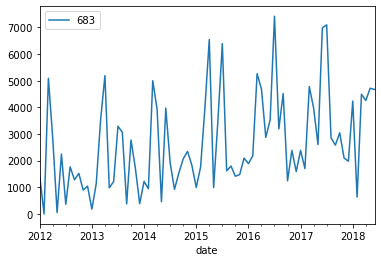

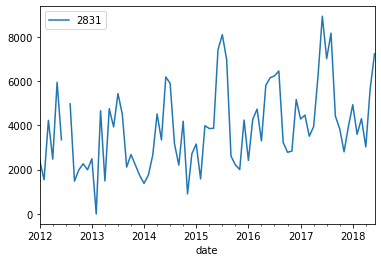

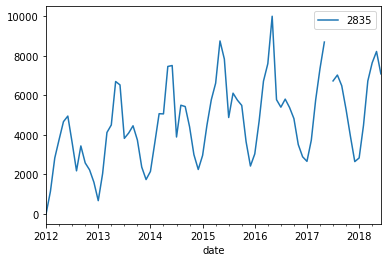

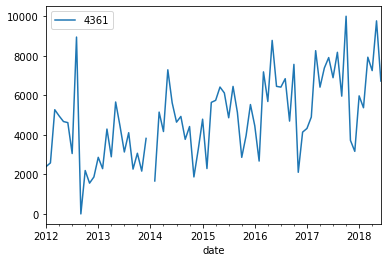

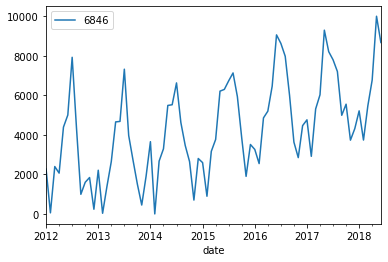

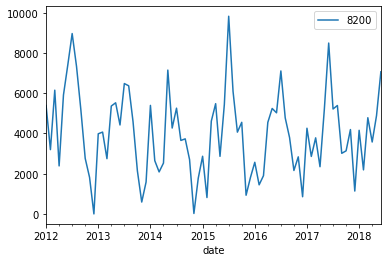

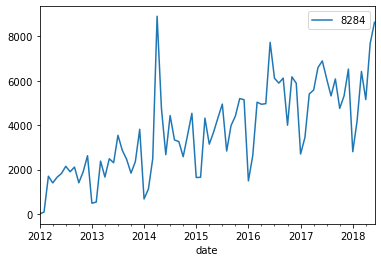

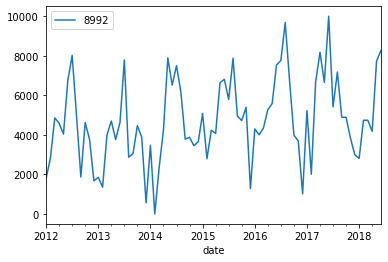

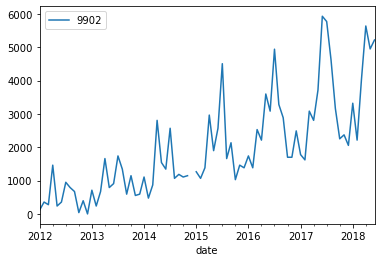

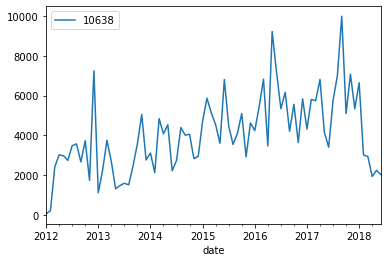

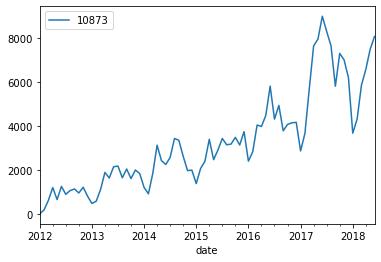

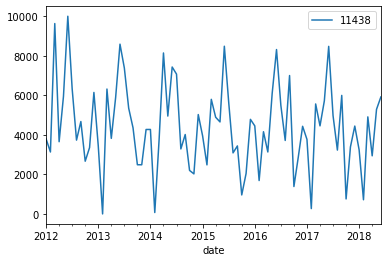

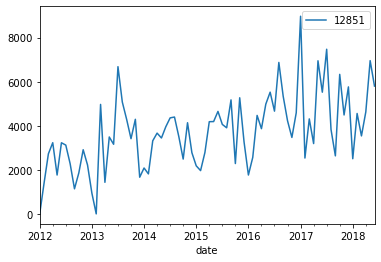

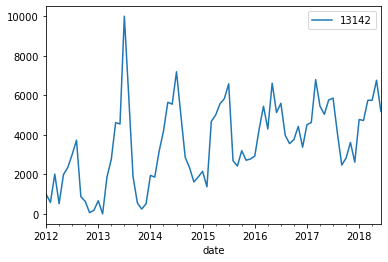

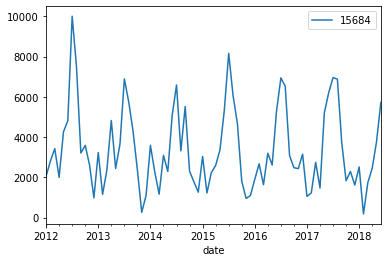

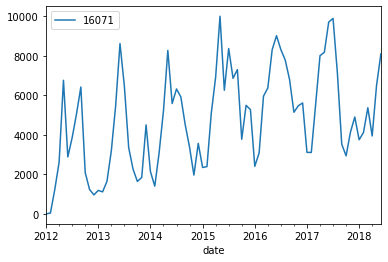

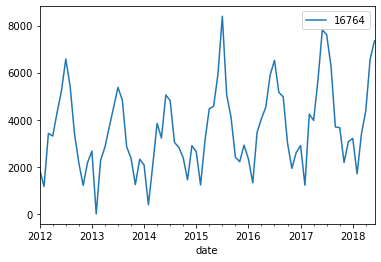

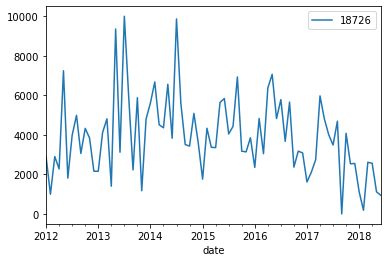

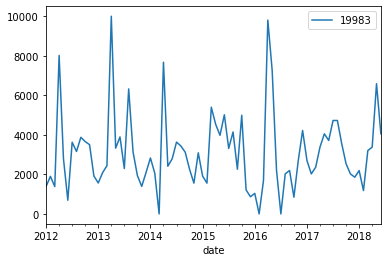

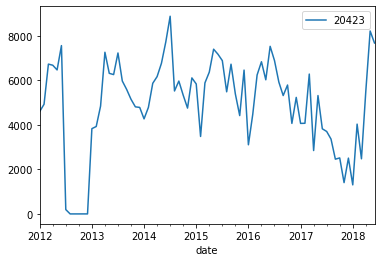

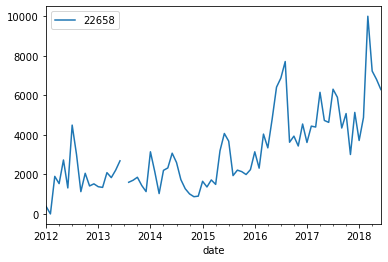

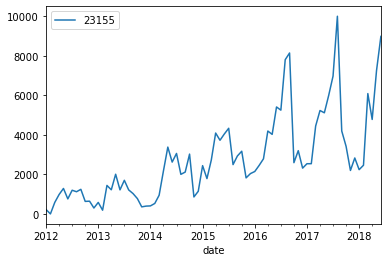

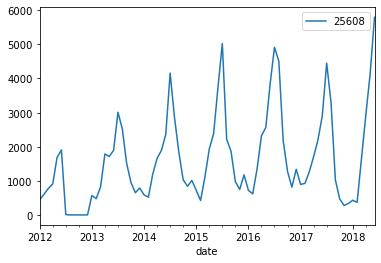

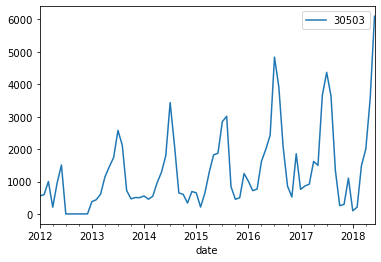

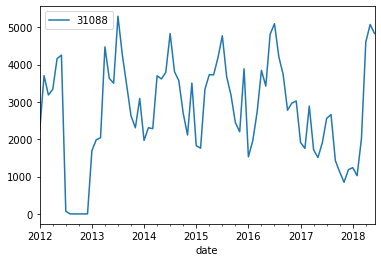

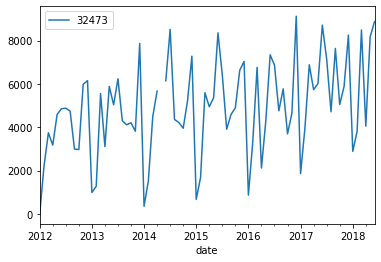

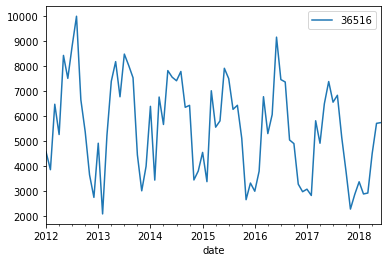

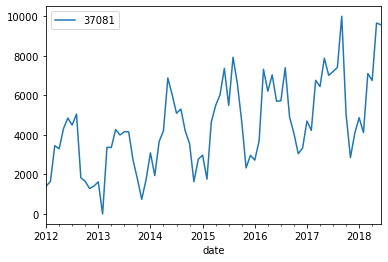

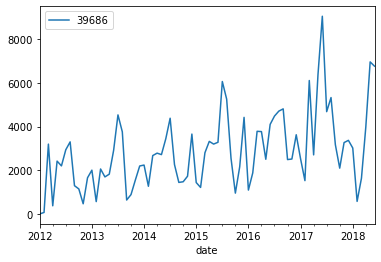

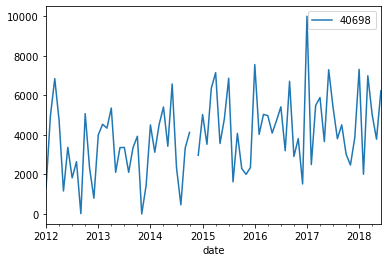

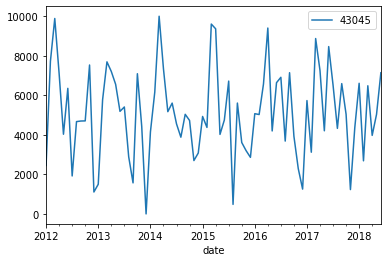

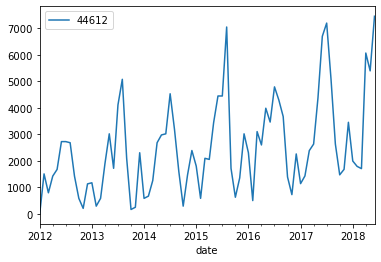

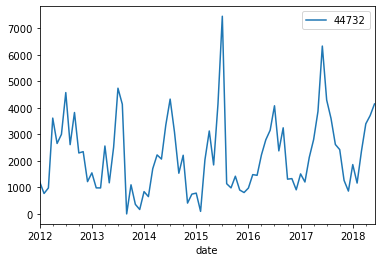

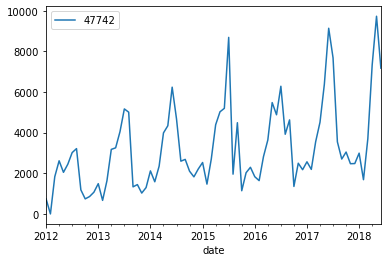

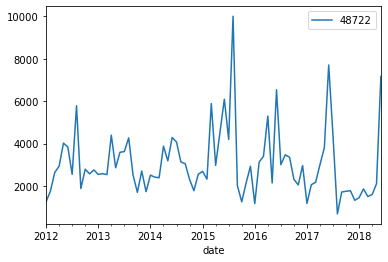

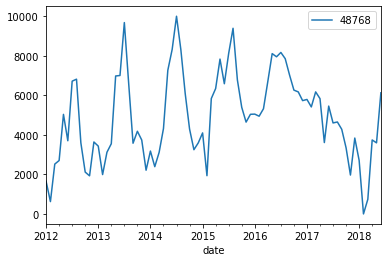

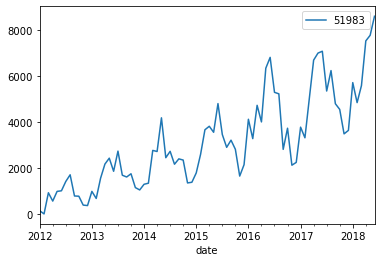

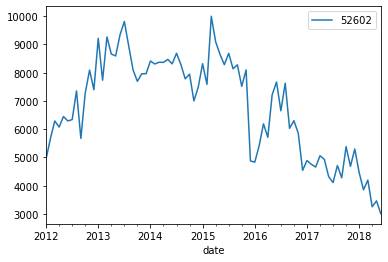

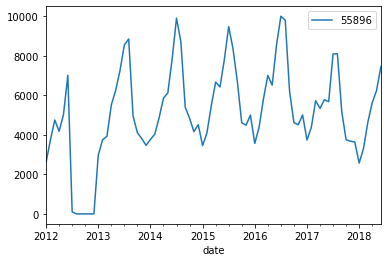

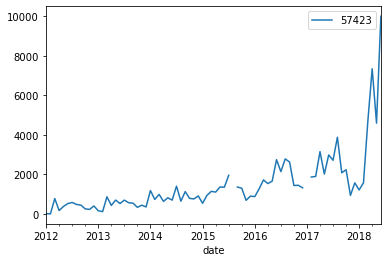

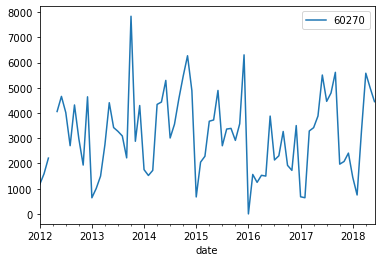

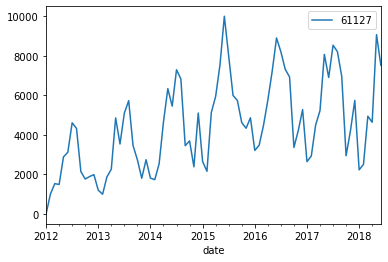

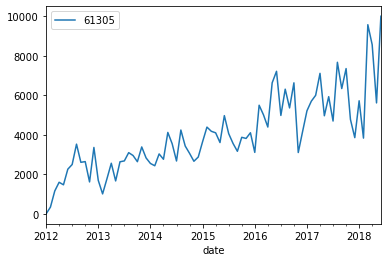

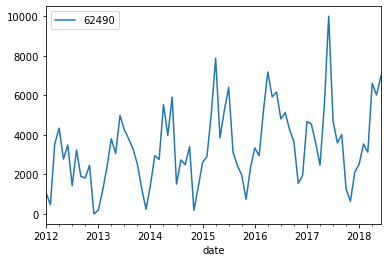

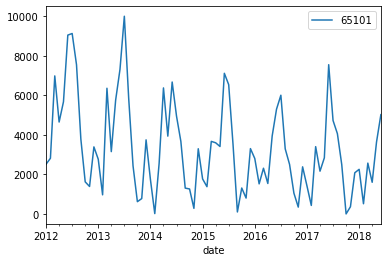

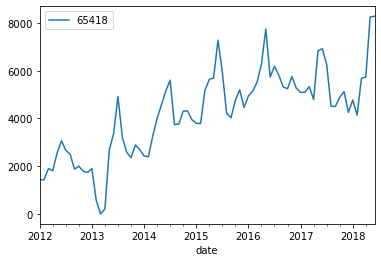

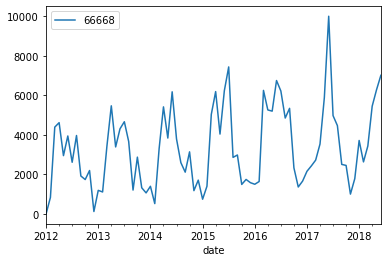

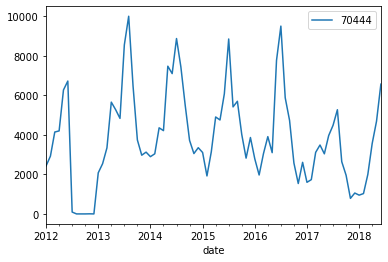

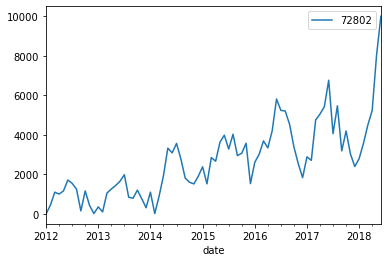

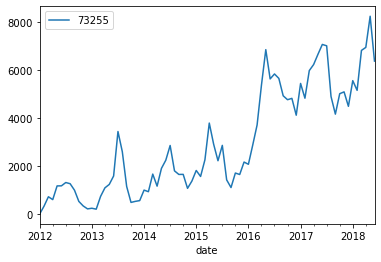

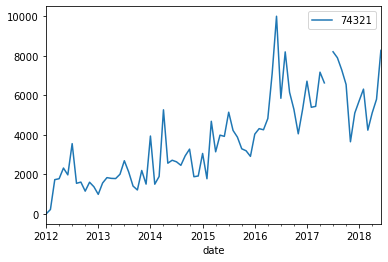

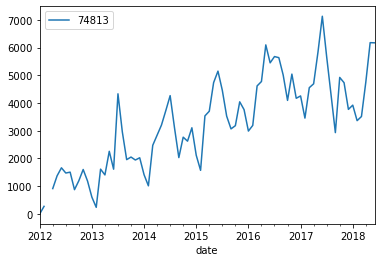

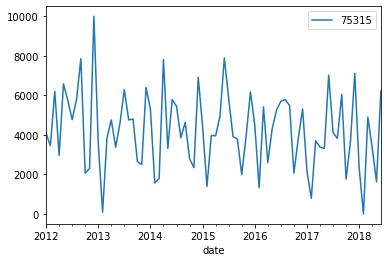

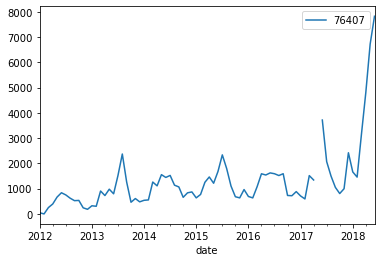

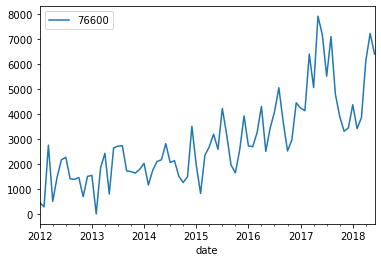

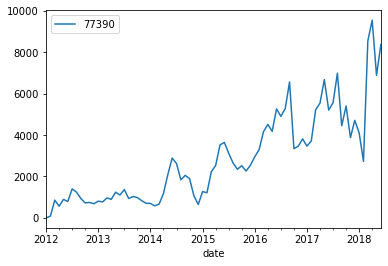

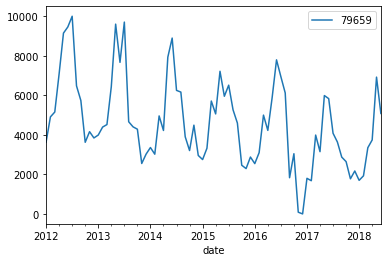

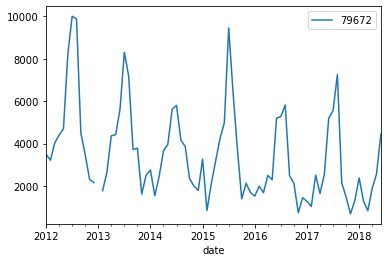

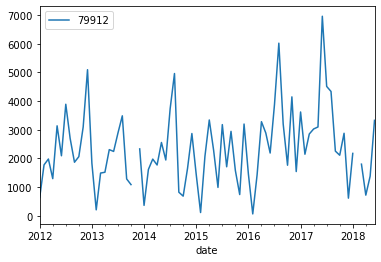

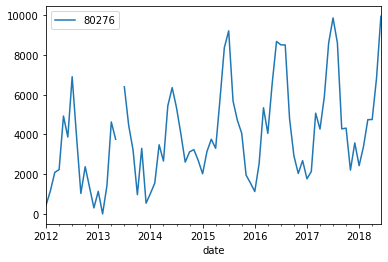

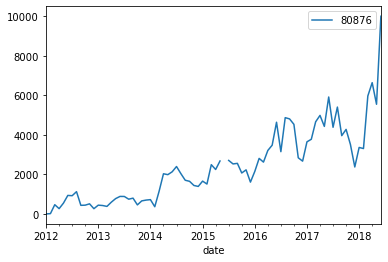

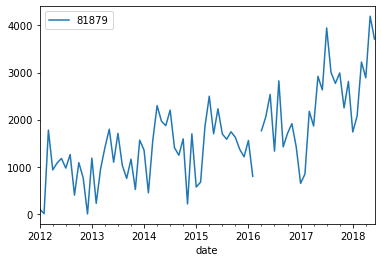

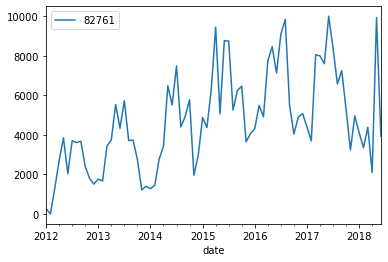

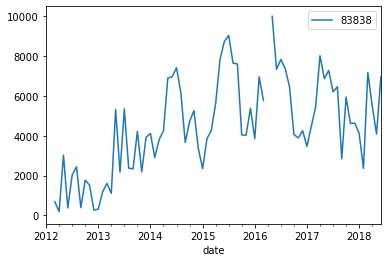

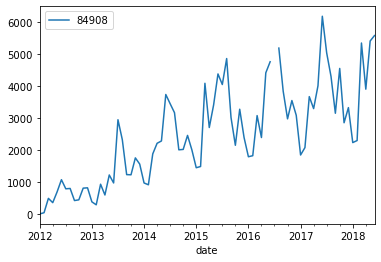

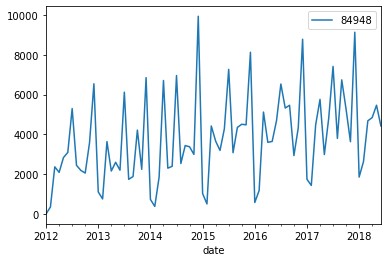

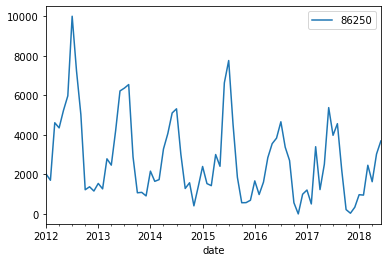

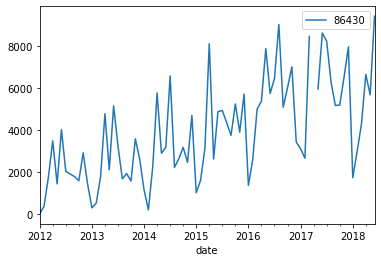

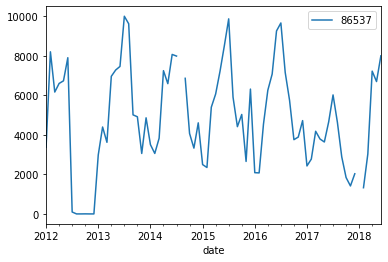

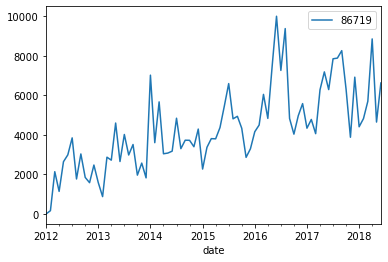

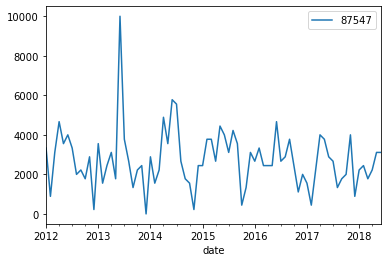

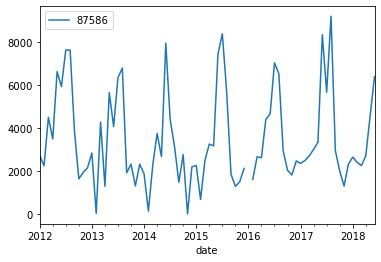

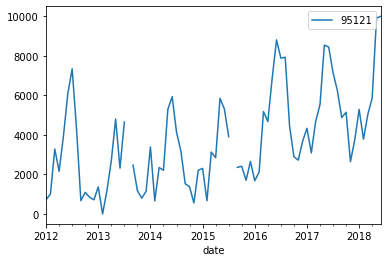

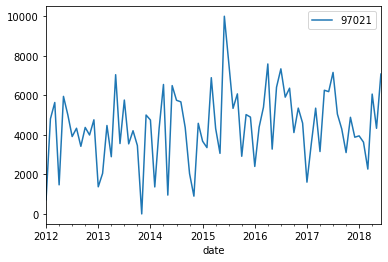

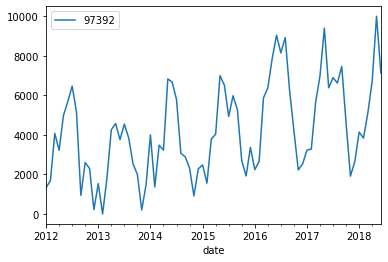

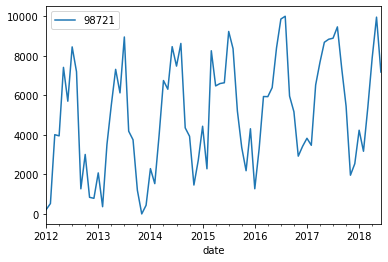

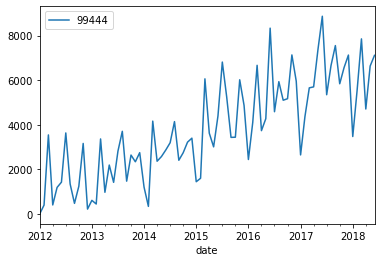

In [39]:
#Przeglad listy1
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in lista1:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

#większość danych charakteryzuje sezonowość 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


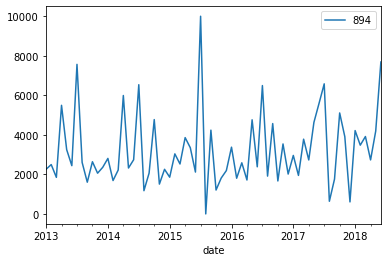

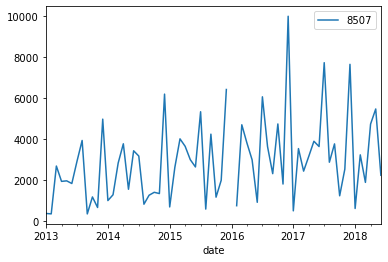

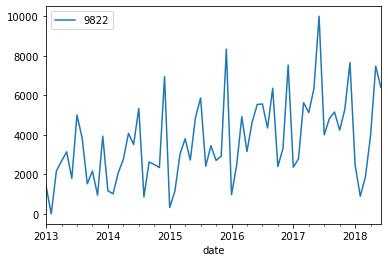

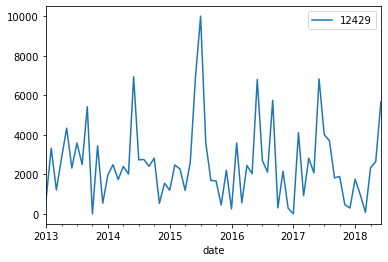

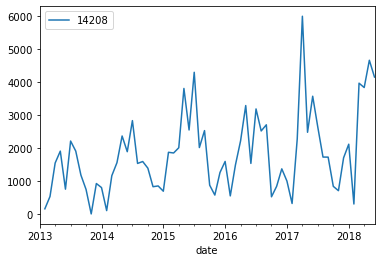

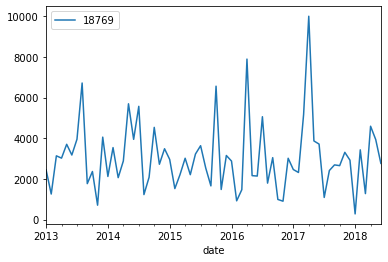

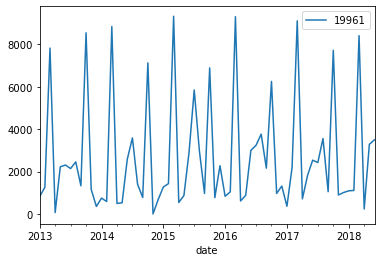

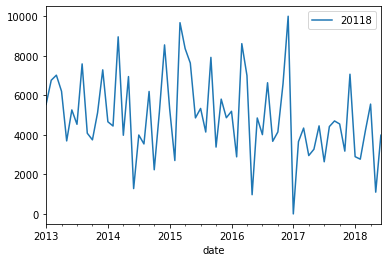

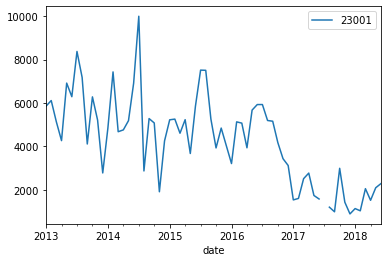

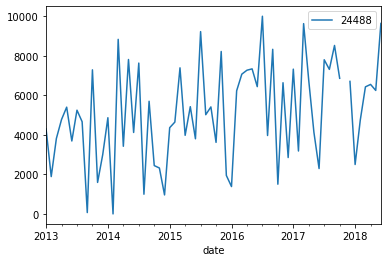

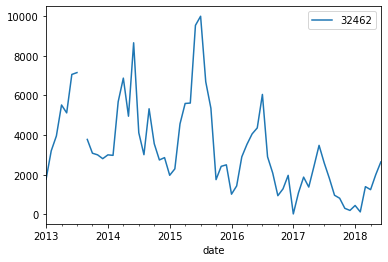

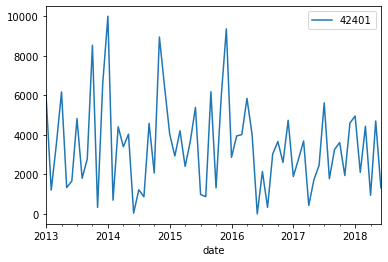

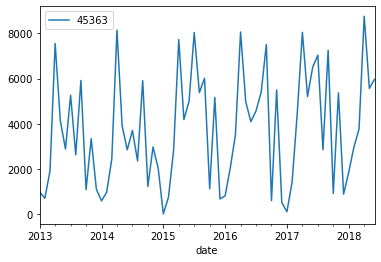

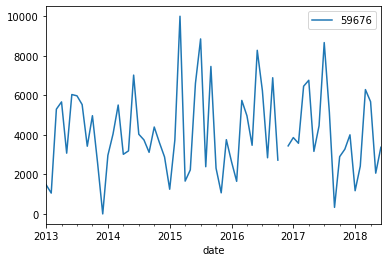

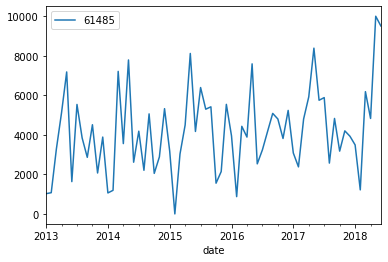

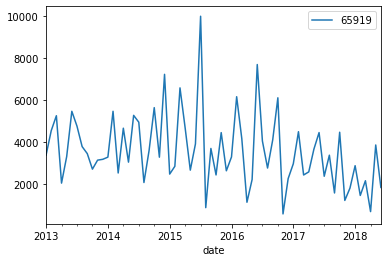

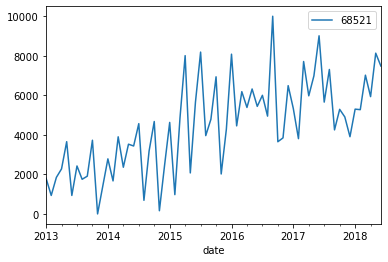

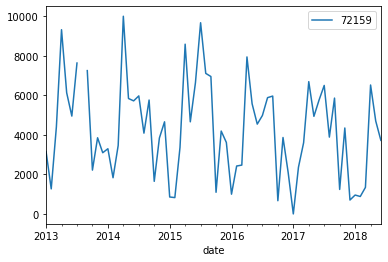

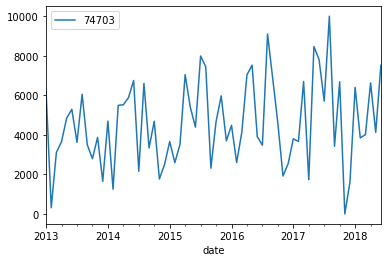

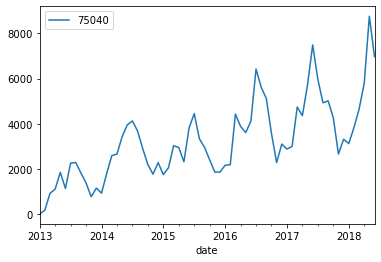

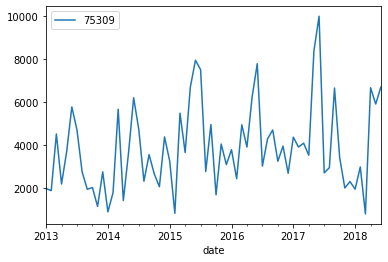

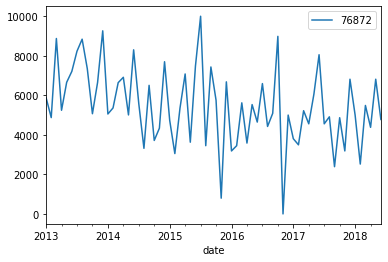

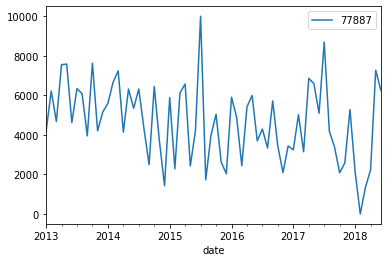

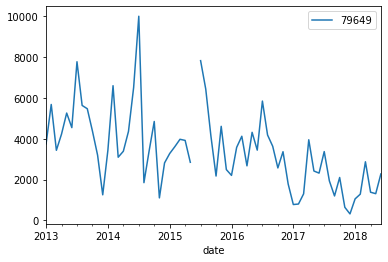

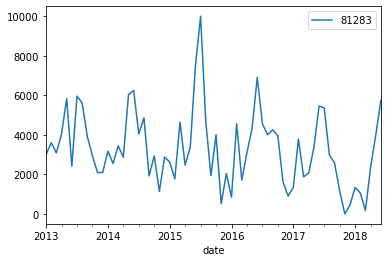

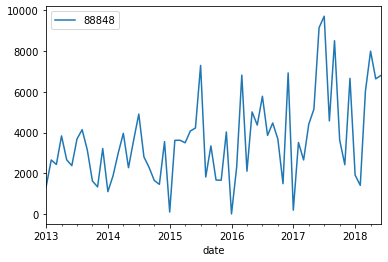

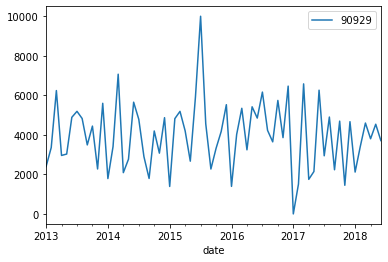

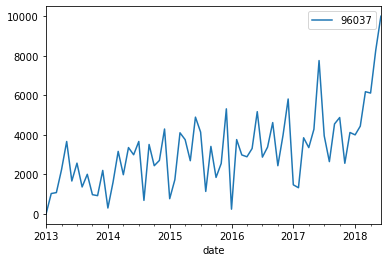

In [40]:
#Przeglad listy2
lista2 = Y_train_ni[Y_train_ni["grp_yr_strt2"]==1].index.get_level_values(0).unique()
for i in lista2:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

In [198]:
lista2

Int64Index([16288, 65256], dtype='int64', name='key')

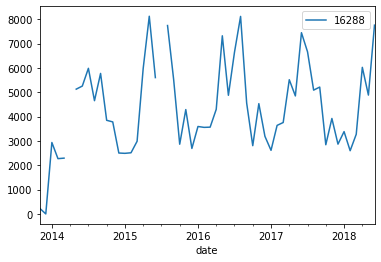

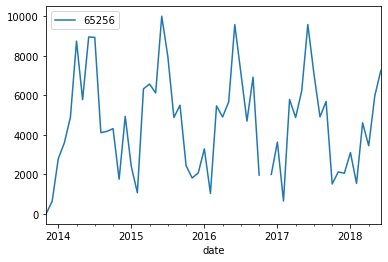

In [41]:
#Przeglad listy3
lista3 = Y_train_ni[Y_train_ni["grp_yr_strt3"]==1].index.get_level_values(0).unique()
for i in lista3:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

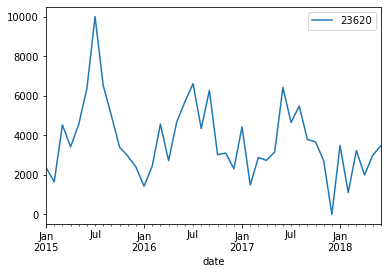

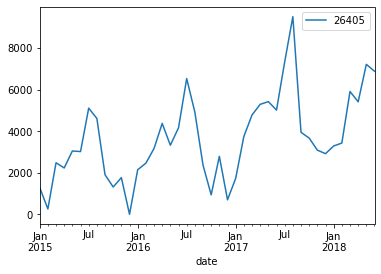

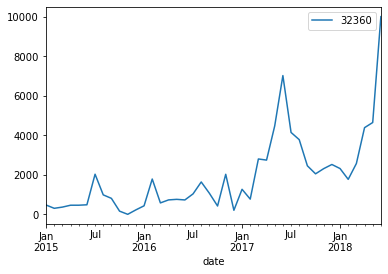

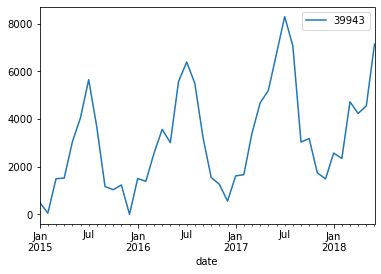

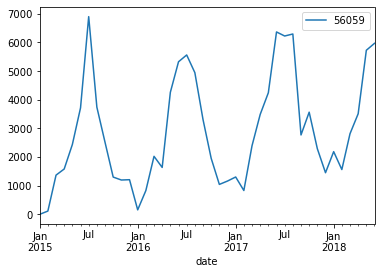

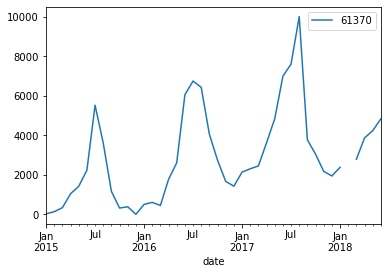

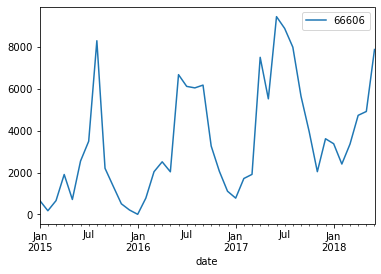

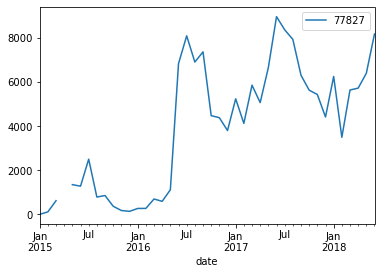

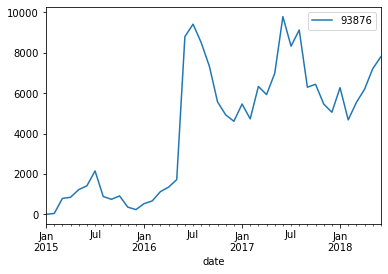

In [206]:
#Przeglad listy4
lista4 = Y_train_ni[Y_train_ni["grp_yr_strt4"]==1].index.get_level_values(0).unique()
for i in lista4:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

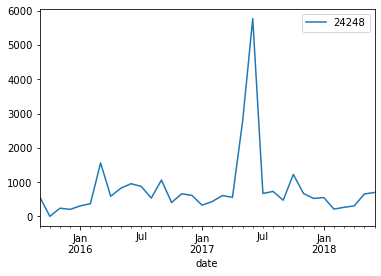

In [42]:
#Przeglad listy5
lista5 = Y_train_ni[Y_train_ni["grp_yr_strt5"]==1].index.get_level_values(0).unique()
for i in lista5:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

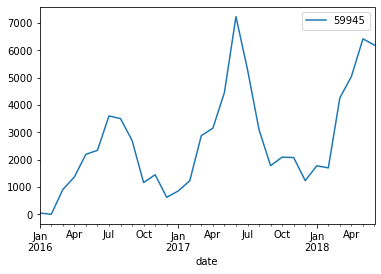

In [43]:
#Przeglad listy6
lista6 = Y_train_ni[Y_train_ni["grp_yr_strt6"]==1].index.get_level_values(0).unique()
for i in lista6:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

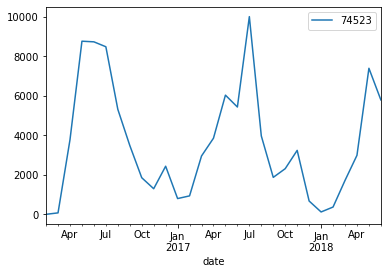

In [208]:
#Przeglad listy7
lista7 = Y_train_ni[Y_train_ni["grp_yr_strt7"]==1].index.get_level_values(0).unique()
for i in lista7:
    Y_train_ri = Y_train.reset_index()
    j=str(i)
    Y_train_ri[Y_train_ri["key"]==i].plot.line(x="date", y="y", label=j)

In [293]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [294]:
Y_train_ni2 = Y_train_ni.reset_index()
Y_train_ni2.set_index('date', inplace=True)
prd_683 = Y_train_ni2[Y_train_ni2["key"]==683].y
#prd_683[:'2014-01-01']
#plt.plot(prd_683)
#test_stationarity(prd_683)


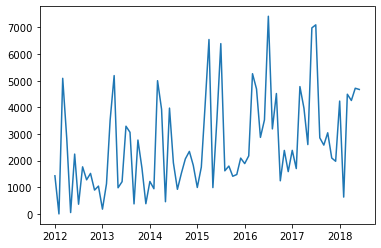

In [289]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(prd_683)

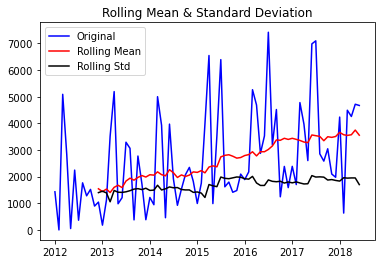

Results of Dickey-Fuller Test:
Test Statistic                 -0.902697
p-value                         0.787083
#Lags Used                     12.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [295]:
test_stationarity(prd_683)